In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/BIZZI/nlp_task/category_classification
# %cd /content/drive/MyDrive/category_classification

/content/drive/.shortcut-targets-by-id/1YcXPsu1fjrXWlQ7YXmbfnXBf-B7FeTOT/category_classification


In [20]:
!ls ./tokenizers/new_tokens_added

tokenizer


In [3]:
!pip install transformers
!pip install vncorenlp

import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from typing import List, Dict

     |████████████████████████████████| 4.0 MB 5.1 MB/s 
     |████████████████████████████████| 77 kB 8.2 MB/s 
     |████████████████████████████████| 6.6 MB 47.5 MB/s 
     |████████████████████████████████| 596 kB 70.3 MB/s 
     |████████████████████████████████| 895 kB 63.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 2.6 MB 5.2 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=7bed74e676cd6e74d8e9686e19b77d42f1f0136a16a4d5adde36454aeb0da1f4
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


In [ ]:

with open("./dataset/28-3-2022/dataset_for_category_classification.json", "r") as f:
    dataset = json.loads(f.read())
labels = [each["label"] for each in dataset]
Counter(labels)

In [4]:
def show_learning_curve(log: List[dict], title="Learning curve") -> None:
    train_loss = [each["train loss"] for each in log]
    val_loss = [each["val loss"] for each in log]
    train_acc = [each["train accuracy"] for each in log]
    val_acc = [each["val accuracy"] for each in log]
    epochs = len(train_loss)
    fig, ax = plt.subplots(figsize=(14, 8))
    plt.plot(np.arange(epochs), train_loss, marker='o', label='train_loss')
    plt.plot(np.arange(epochs), val_loss, marker='o', label='val_loss')
    plt.plot(np.arange(epochs), train_acc, marker='o', label='train_acc')
    plt.plot(np.arange(epochs), val_acc, marker='o', label='val_acc')
    plt.title(title, fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.grid(True)
    ax.legend()
    plt.show();

# Without pretraining

## Lần 1

In [ ]:
!python3 main.py -epochs 20 -lr 3e-5

Device: cuda
{'device': 'cuda', 'learning rate': 3e-05}
100% 112/112 [00:58<00:00,  1.92it/s]

Epoch 0: train loss: 3.3492571392229626, val loss: 3.180420, train accuracy: 0.067450,  val accuracy: 0.093808, train f1_score: 0.055373, val f1_score: 0.047932
100% 112/112 [00:55<00:00,  2.03it/s]

Epoch 1: train loss: 3.0155743764979497, val loss: 2.662819, train accuracy: 0.145678,  val accuracy: 0.244931, train f1_score: 0.112829, val f1_score: 0.189619
100% 112/112 [00:54<00:00,  2.05it/s]

Epoch 2: train loss: 2.5362010257584706, val loss: 2.232440, train accuracy: 0.299241,  val accuracy: 0.292224, train f1_score: 0.274012, val f1_score: 0.266436
100% 112/112 [00:54<00:00,  2.05it/s]

Epoch 3: train loss: 2.019166070435728, val loss: 1.750537, train accuracy: 0.436498,  val accuracy: 0.512010, train f1_score: 0.424244, val f1_score: 0.505706
100% 112/112 [00:54<00:00,  2.05it/s]

Epoch 4: train loss: 1.6087601855397224, val loss: 1.446137, train accuracy: 0.599723,  val accuracy: 0.65

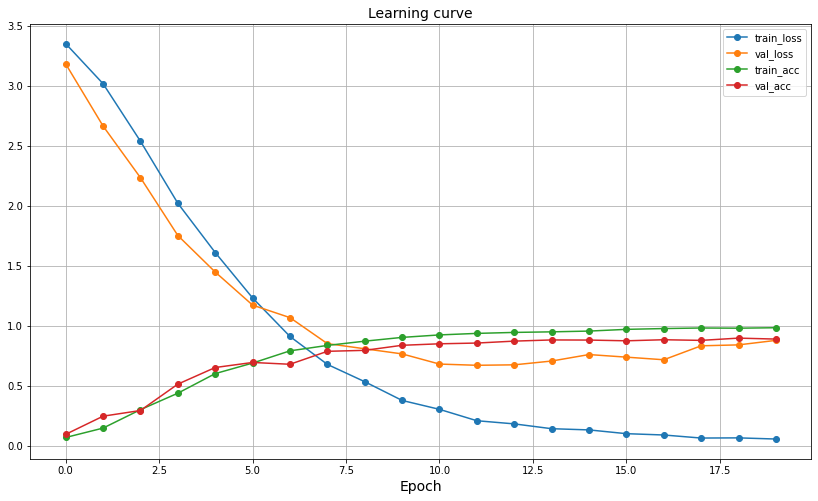

In [ ]:
log = [{'epoch': 0, 'train loss': 3.3492571392229626, 'val loss': 3.180420480455671, 'train accuracy': 0.06744998346560846, 'val accuracy': 0.09380760368663595, 'train f1_score': 0.05537300512708644, 'val f1_score': 0.04793243363610815}, {'epoch': 1, 'train loss': 3.0155743764979497, 'val loss': 2.6628193855285645, 'train accuracy': 0.1456783234126984, 'val accuracy': 0.24493087557603685, 'train f1_score': 0.11282868302029447, 'val f1_score': 0.18961862829752432}, {'epoch': 2, 'train loss': 2.5362010257584706, 'val loss': 2.232439831324986, 'train accuracy': 0.2992414847883598, 'val accuracy': 0.2922235023041475, 'train f1_score': 0.2740115934212302, 'val f1_score': 0.2664358025806759}, {'epoch': 3, 'train loss': 2.019166070435728, 'val loss': 1.7505374465669905, 'train accuracy': 0.4364976025132275, 'val accuracy': 0.5120103686635945, 'train f1_score': 0.42424393896787543, 'val f1_score': 0.5057061287087209}, {'epoch': 4, 'train loss': 1.6087601855397224, 'val loss': 1.4461372120039804, 'train accuracy': 0.599723048941799, 'val accuracy': 0.6505472350230415, 'train f1_score': 0.5976161867471765, 'val f1_score': 0.6527583015186319}, {'epoch': 5, 'train loss': 1.2301784567534924, 'val loss': 1.1706476245607649, 'train accuracy': 0.6875206679894179, 'val accuracy': 0.6925691244239631, 'train f1_score': 0.6902236413969202, 'val f1_score': 0.6992119844121572}, {'epoch': 6, 'train loss': 0.9092634895018169, 'val loss': 1.0662870602948324, 'train accuracy': 0.7894655257936508, 'val accuracy': 0.6775633640552995, 'train f1_score': 0.7939251544962025, 'val f1_score': 0.6833154735689297}, {'epoch': 7, 'train loss': 0.6764925976416895, 'val loss': 0.8496651683534895, 'train accuracy': 0.8346147486772486, 'val accuracy': 0.7855126728110599, 'train f1_score': 0.8420571001617699, 'val f1_score': 0.7965602634532647}, {'epoch': 8, 'train loss': 0.5322359664631742, 'val loss': 0.806639666216714, 'train accuracy': 0.8700500165343915, 'val accuracy': 0.7935771889400921, 'train f1_score': 0.8774854962039232, 'val f1_score': 0.8057154839528112}, {'epoch': 9, 'train loss': 0.3761335715119328, 'val loss': 0.7639801455395562, 'train accuracy': 0.9015273644179894, 'val accuracy': 0.8356566820276498, 'train f1_score': 0.9092539027863177, 'val f1_score': 0.8469432048412899}, {'epoch': 10, 'train loss': 0.30180737994877355, 'val loss': 0.6791815168091229, 'train accuracy': 0.9221540178571429, 'val accuracy': 0.8481566820276497, 'train f1_score': 0.927068219797753, 'val f1_score': 0.8571008639046641}, {'epoch': 11, 'train loss': 0.20701898434864624, 'val loss': 0.6690506130456925, 'train accuracy': 0.9348854993386243, 'val accuracy': 0.8543778801843318, 'train f1_score': 0.9376470604677477, 'val f1_score': 0.8657351262089165}, {'epoch': 12, 'train loss': 0.18069946716007376, 'val loss': 0.6728602470031806, 'train accuracy': 0.9429770171957672, 'val accuracy': 0.8704781105990783, 'train f1_score': 0.9470079145260176, 'val f1_score': 0.8755738839166767}, {'epoch': 13, 'train loss': 0.14057424385100603, 'val loss': 0.704463055729866, 'train accuracy': 0.9477719907407407, 'val accuracy': 0.8802995391705069, 'train f1_score': 0.9515618553139112, 'val f1_score': 0.8836271054214603}, {'epoch': 14, 'train loss': 0.13050855420130705, 'val loss': 0.7584222520036357, 'train accuracy': 0.9541377314814815, 'val accuracy': 0.8792914746543778, 'train f1_score': 0.9567321406596179, 'val f1_score': 0.8799194833292248}, {'epoch': 15, 'train loss': 0.09914392853222255, 'val loss': 0.7369562010679926, 'train accuracy': 0.9684709821428571, 'val accuracy': 0.8730990783410139, 'train f1_score': 0.9709529353699521, 'val f1_score': 0.8802895988487488}, {'epoch': 16, 'train loss': 0.08812501165084541, 'val loss': 0.7150895610451699, 'train accuracy': 0.9751674107142857, 'val accuracy': 0.8819700460829493, 'train f1_score': 0.9766935653194845, 'val f1_score': 0.8834461953732662}, {'epoch': 17, 'train loss': 0.06267143583058246, 'val loss': 0.8314330995082855, 'train accuracy': 0.9798073743386243, 'val accuracy': 0.8766417050691244, 'train f1_score': 0.9807718600294354, 'val f1_score': 0.8828810545949337}, {'epoch': 18, 'train loss': 0.0641530272051958, 'val loss': 0.839120797972594, 'train accuracy': 0.9781849371693122, 'val accuracy': 0.8954205069124423, 'train f1_score': 0.979443201680925, 'val f1_score': 0.8982532957633765}, {'epoch': 19, 'train loss': 0.054469681378187876, 'val loss': 0.8766305619318571, 'train accuracy': 0.9820911871693122, 'val accuracy': 0.887442396313364, 'train f1_score': 0.9813960848995371, 'val f1_score': 0.8848992607484024}]

show_learning_curve(log)

# Have mode pretrained

## Lần 1

In [ ]:
!python3 main.py -epochs 20 -lr 3e-5

Device: cuda
{'device': 'cuda', 'learning rate': 3e-05}
100% 112/112 [00:58<00:00,  1.90it/s]

Epoch 0: train loss: 3.366473436355591, val loss: 3.241933, train accuracy: 0.034960,  val accuracy: 0.102707, train f1_score: 0.027663, val f1_score: 0.074491
100% 112/112 [00:55<00:00,  2.01it/s]

Epoch 1: train loss: 3.098926550575665, val loss: 2.665616, train accuracy: 0.164249,  val accuracy: 0.354810, train f1_score: 0.138381, val f1_score: 0.312857
100% 112/112 [00:54<00:00,  2.05it/s]

Epoch 2: train loss: 2.3600422175867215, val loss: 1.981389, train accuracy: 0.427569,  val accuracy: 0.510282, train f1_score: 0.413092, val f1_score: 0.486170
100% 112/112 [00:54<00:00,  2.05it/s]

Epoch 3: train loss: 1.7516276219061442, val loss: 1.484029, train accuracy: 0.618903,  val accuracy: 0.698762, train f1_score: 0.618882, val f1_score: 0.689351
100% 112/112 [00:54<00:00,  2.06it/s]

Epoch 4: train loss: 1.2995124549737997, val loss: 1.176127, train accuracy: 0.741144,  val accuracy: 0.730

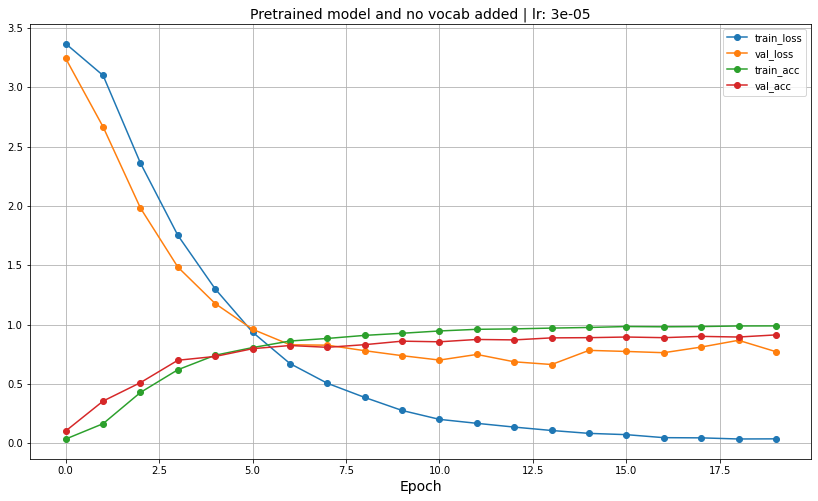

In [ ]:
log = [{'epoch': 0, 'train loss': 3.366473436355591, 'val loss': 3.241933059692383, 'train accuracy': 0.034959904100529106, 'val accuracy': 0.1027073732718894, 'train f1_score': 0.027662908012082016, 'val f1_score': 0.07449133565374418}, {'epoch': 1, 'train loss': 3.098926550575665, 'val loss': 2.6656159060341973, 'train accuracy': 0.16424851190476192, 'val accuracy': 0.3548099078341014, 'train f1_score': 0.1383810275401328, 'val f1_score': 0.3128566811161759}, {'epoch': 2, 'train loss': 2.3600422175867215, 'val loss': 1.9813886540276664, 'train accuracy': 0.4275690310846561, 'val accuracy': 0.5102822580645161, 'train f1_score': 0.4130924897619466, 'val f1_score': 0.4861695361090523}, {'epoch': 3, 'train loss': 1.7516276219061442, 'val loss': 1.4840289899281094, 'train accuracy': 0.6189029431216931, 'val accuracy': 0.6987615207373272, 'train f1_score': 0.618881820238728, 'val f1_score': 0.6893505054852981}, {'epoch': 4, 'train loss': 1.2995124549737997, 'val loss': 1.1761272600718906, 'train accuracy': 0.7411437665343915, 'val accuracy': 0.7309907834101382, 'train f1_score': 0.7507192216648458, 'val f1_score': 0.7428797935775181}, {'epoch': 5, 'train loss': 0.9351399431803397, 'val loss': 0.9598207533359527, 'train accuracy': 0.8055968915343915, 'val accuracy': 0.7962269585253456, 'train f1_score': 0.815485819368429, 'val f1_score': 0.8107646524518899}, {'epoch': 6, 'train loss': 0.6709295615021672, 'val loss': 0.8292636905397688, 'train accuracy': 0.8607907572751322, 'val accuracy': 0.8230126728110599, 'train f1_score': 0.8687458868102774, 'val f1_score': 0.8374308373378933}, {'epoch': 7, 'train loss': 0.5047735840614352, 'val loss': 0.825908458658627, 'train accuracy': 0.8825334821428571, 'val accuracy': 0.8078917050691244, 'train f1_score': 0.8898047757127326, 'val f1_score': 0.8163838892482326}, {'epoch': 8, 'train loss': 0.3854659628123045, 'val loss': 0.7793115126235145, 'train accuracy': 0.9084304728835979, 'val accuracy': 0.8301555299539171, 'train f1_score': 0.9161471501681805, 'val f1_score': 0.83894726265478}, {'epoch': 9, 'train loss': 0.27565319776268943, 'val loss': 0.737414156964847, 'train accuracy': 0.9262876157407407, 'val accuracy': 0.8597350230414746, 'train f1_score': 0.9324013244929462, 'val f1_score': 0.8637272098059525}, {'epoch': 10, 'train loss': 0.2006692716053554, 'val loss': 0.7003697978598731, 'train accuracy': 0.9455915178571429, 'val accuracy': 0.8543202764976959, 'train f1_score': 0.9503014148329326, 'val f1_score': 0.8597378337943192}, {'epoch': 11, 'train loss': 0.16732644915048564, 'val loss': 0.747716740838119, 'train accuracy': 0.9594907407407407, 'val accuracy': 0.873991935483871, 'train f1_score': 0.9619271816853173, 'val f1_score': 0.8743362959045562}, {'epoch': 12, 'train loss': 0.13555279330882644, 'val loss': 0.6857335597276688, 'train accuracy': 0.9630663029100529, 'val accuracy': 0.8703629032258065, 'train f1_score': 0.9652449548837246, 'val f1_score': 0.8709281650145959}, {'epoch': 13, 'train loss': 0.10693420135482613, 'val loss': 0.6629143028387001, 'train accuracy': 0.9698660714285714, 'val accuracy': 0.8873847926267281, 'train f1_score': 0.9726155140997249, 'val f1_score': 0.8915035101283915}, {'epoch': 14, 'train loss': 0.082673862277131, 'val loss': 0.7821032372968537, 'train accuracy': 0.9751157407407407, 'val accuracy': 0.8891705069124424, 'train f1_score': 0.9763714641169509, 'val f1_score': 0.8939795158231727}, {'epoch': 15, 'train loss': 0.07185897035690557, 'val loss': 0.7730195657483169, 'train accuracy': 0.9829282407407407, 'val accuracy': 0.8945852534562212, 'train f1_score': 0.9839662677465767, 'val f1_score': 0.8958243991351711}, {'epoch': 16, 'train loss': 0.0465411009582957, 'val loss': 0.7623825270682574, 'train accuracy': 0.9806444279100529, 'val accuracy': 0.8891705069124424, 'train f1_score': 0.9808082616949915, 'val f1_score': 0.8950728514872494}, {'epoch': 17, 'train loss': 0.0448644309487593, 'val loss': 0.8098441950976849, 'train accuracy': 0.9827008928571429, 'val accuracy': 0.899971198156682, 'train f1_score': 0.9830805720634698, 'val f1_score': 0.9000489416854793}, {'epoch': 18, 'train loss': 0.03537833722241755, 'val loss': 0.8670435474387237, 'train accuracy': 0.9877232142857143, 'val accuracy': 0.8945276497695852, 'train f1_score': 0.9882013735709901, 'val f1_score': 0.8973958932772297}, {'epoch': 19, 'train loss': 0.0365655596043715, 'val loss': 0.7712205917707511, 'train accuracy': 0.988229580026455, 'val accuracy': 0.912442396313364, 'train f1_score': 0.9885465869282833, 'val f1_score': 0.9084789290274348}]

show_learning_curve(
    log, f"Pretrained model and no vocab added | lr: {3e-5}"
)

## Lần 2

In [ ]:
!python3 main.py -epochs 13 -lr 3e-5

Device: cuda
{'device': 'cuda', 'learning rate': 3e-05}
100% 112/112 [00:59<00:00,  1.89it/s]

Epoch 0: train loss: 3.366473436355591, val loss: 3.241933, train accuracy: 0.034960,  val accuracy: 0.102707, train f1_score: 0.027663, val f1_score: 0.074491
100% 112/112 [00:55<00:00,  2.00it/s]

Epoch 1: train loss: 3.098926550575665, val loss: 2.665616, train accuracy: 0.164249,  val accuracy: 0.354810, train f1_score: 0.138381, val f1_score: 0.312857
100% 112/112 [00:55<00:00,  2.02it/s]

Epoch 2: train loss: 2.3600422175867215, val loss: 1.981389, train accuracy: 0.427569,  val accuracy: 0.510282, train f1_score: 0.413092, val f1_score: 0.486170
100% 112/112 [00:55<00:00,  2.03it/s]

Epoch 3: train loss: 1.7516276219061442, val loss: 1.484029, train accuracy: 0.618903,  val accuracy: 0.698762, train f1_score: 0.618882, val f1_score: 0.689351
100% 112/112 [00:55<00:00,  2.03it/s]

Epoch 4: train loss: 1.2995124549737997, val loss: 1.176127, train accuracy: 0.741144,  val accuracy: 0.730

# Evaluate

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from vncorenlp import VnCoreNLP
from sklearn.metrics import confusion_matrix
import seaborn as sns
import regex as re
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def prettify_text(text: str) -> str:
    text = text.lower().strip()
    # Remove words including both letter(s) and digit(s). Note: DON'T remove words like PO1234
    pattern = r'''(\b(?!PO)[A-Z\p{L}]+[*\d@.,/-]+[\w@]*|[*\d@.,/-]+[A-Z\p{L}]+[\w@]*)'''
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove punctuation
    punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    pattern = f"([{punctuation}])"
    text = re.sub(pattern, " ", text)

    # Remove words with less than 4 digits and redundant spaces
    text = re.sub(r"\b\d{1,4}\b|\s{2,}", " ", text)
    return text.lower().strip()

def preprocess_sent(sent):
    sent = prettify_text(sent)
    if not sent:
        sent = "hàng hóa không xác định"
    sent = " ".join(word_segmenter.tokenize(sent)[0])
    return sent



In [ ]:
word_segmenter = VnCoreNLP(
            "./vncorenlp/VnCoreNLP-1.1.1.jar",
            annotators="wseg",
            max_heap_size="-Xmx500m",
        )

tokenizer = AutoTokenizer.from_pretrained(
    "./tokenizers/new-tokens-added/tokenizer"
)
model = AutoModelForSequenceClassification.from_pretrained(
    "./checkpoints/2022-04-07", vocab_size=len(tokenizer)
)

category_classifier = pipeline(
    "text-classification", tokenizer=tokenizer, model=model
)

Test dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


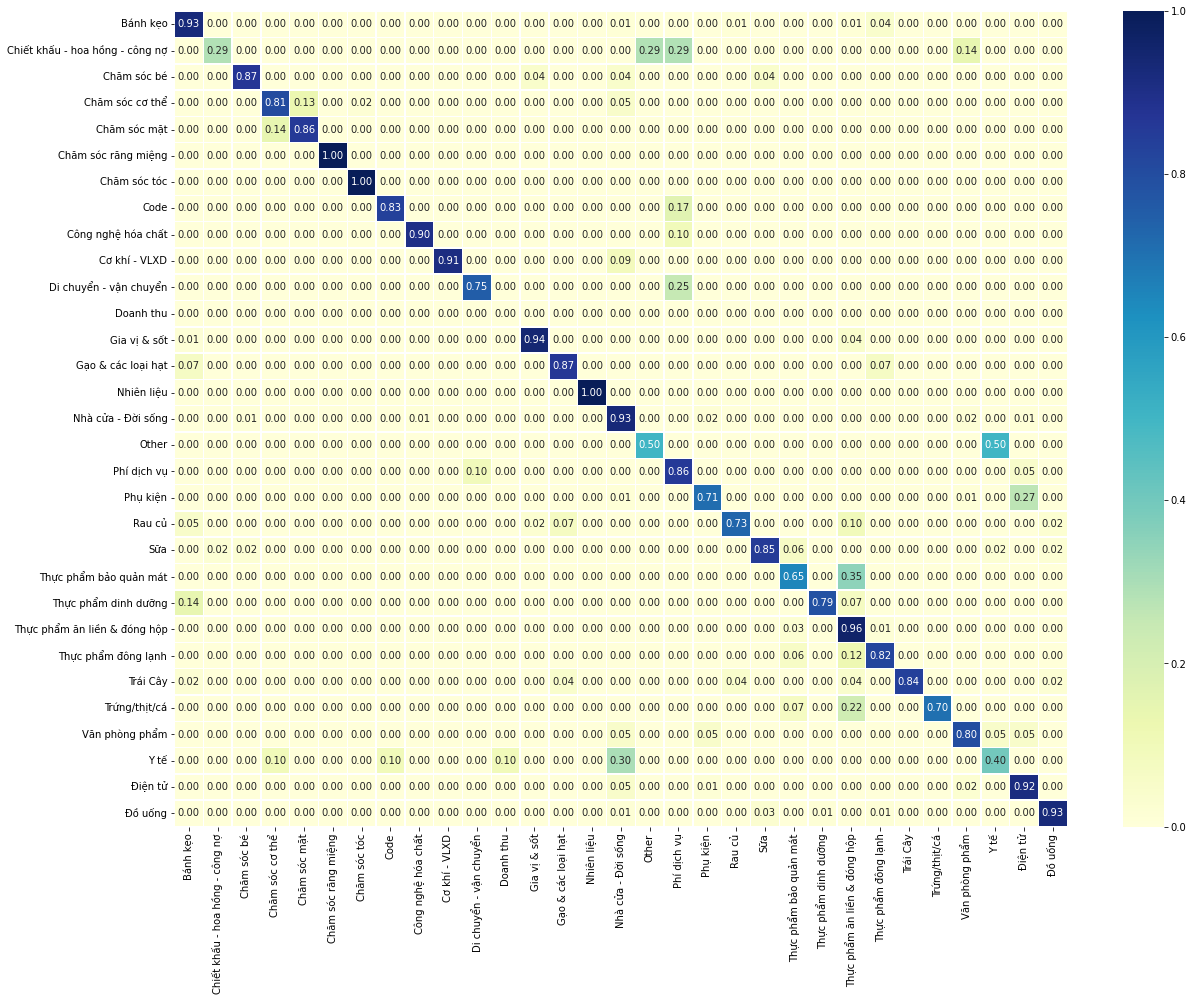

In [ ]:
with open("./dataset/28-3-2022/test_dataset_for_category_cls.json", "r") as f:
    test_dataset = json.loads(f.read())
test_sentences = [each["itemName"] for each in test_dataset]
test_labels = [each["label"] for each in test_dataset]
test_labels = list(
    map(lambda label: model.config.label2id[label], test_labels)
)

test_sentences = list(map(
    preprocess_sent, test_sentences
))
for index, sent in enumerate(test_sentences):
    if sent == "hàng_hóa không xác_định":
        test_labels[index] = model.config.label2id["Other"]

# INFERENCE
pred_labels = list(map(
    lambda sent: category_classifier(sent)[0]["label"],
    test_sentences
))

# CONVERT TO LABEL INDEX
pred_labels = list(map(
    lambda label: model.config.label2id[label],
    pred_labels
))

matrix = confusion_matrix(pred_labels, test_labels)
# Normalise
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.nan_to_num(matrix)

categories = [each for each in model.config.id2label.values()]
fig, ax = plt.subplots(figsize=(20, 15))
# sns.heatmap(matrix, linewidths=.5, cmap="YlGnBu")
sns.heatmap(matrix, annot=True, fmt='.2f', xticklabels=categories, yticklabels=categories, linewidths=.5, cmap="YlGnBu");


Val dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


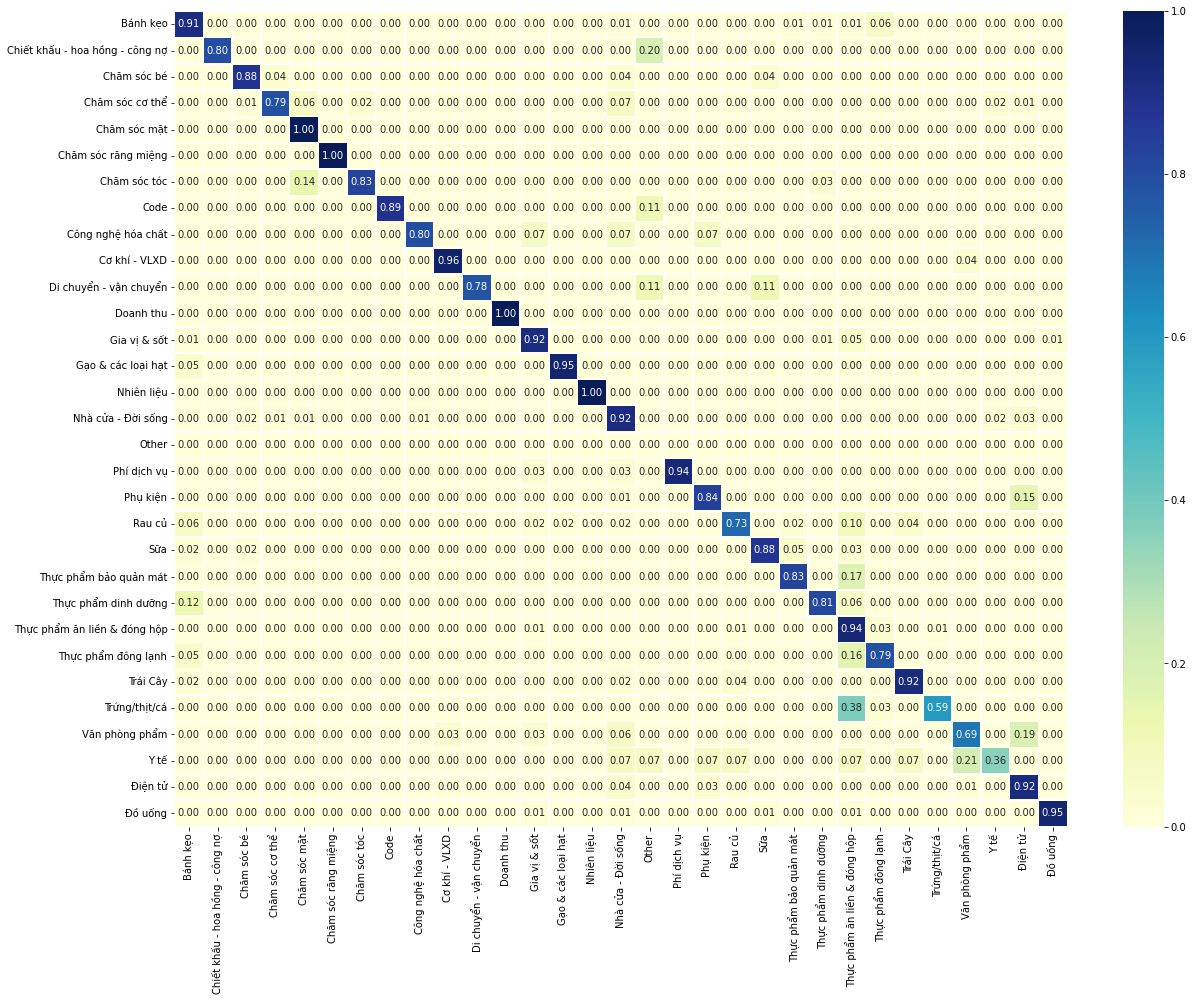

In [ ]:
with open("./dataset/28-3-2022/val_dataset_for_category_cls.json", "r") as f:
    val_dataset = json.loads(f.read())
val_sentences = [each["itemName"] for each in val_dataset]
val_labels = [each["label"] for each in val_dataset]
val_labels = list(
    map(lambda label: model.config.label2id[label], val_labels)
)

val_sentences = list(map(
    preprocess_sent, val_sentences
))
for index, sent in enumerate(val_sentences):
    if sent == "hàng_hóa không xác_định":
        val_labels[index] = model.config.label2id["Other"]

# INFERENCE
pred_labels = list(map(
    lambda sent: category_classifier(sent)[0]["label"],
    val_sentences
))

# CONVERT TO LABEL INDEX
pred_labels = list(map(
    lambda label: model.config.label2id[label],
    pred_labels
))

matrix = confusion_matrix(pred_labels, val_labels)
# Normalise
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.nan_to_num(matrix)

categories = [each for each in model.config.id2label.values()]
fig, ax = plt.subplots(figsize=(20, 15))
# sns.heatmap(matrix, linewidths=.5, cmap="YlGnBu")
sns.heatmap(matrix, annot=True, fmt='.2f', xticklabels=categories, yticklabels=categories, linewidths=.5, cmap="YlGnBu");


Actual data

In [ ]:
import pandas as pd

df = pd.read_csv("./dataset/test/0106214509.csv")

In [ ]:
from typing import Union, List
import time


def predict(item_name: Union[str, List[str]], min_confidence: float=0.4, ambiguous_pred="Unknown") -> List[Dict[str, Union[str, float]]]:
    if isinstance(item_name, str):
        # A single example
        item_name = [item_name]

    elif isinstance(item_name, List):
        # A batch of examples
        pass
    else:
        raise ValueError(
                "item_name must of type `str` (single example), `List[str]` (batch or single example) "
            )
        
    preds = category_classifier(
        list(map(preprocess_sent, item_name))
    )
    # Post process predictions with low confidence
    preds = [
        {
            "itemName": item_name[index],
            "predict": pred["label"] if pred["score"] > min_confidence else ambiguous_pred,
            **pred,
        }
        for index, pred in enumerate(preds)
    ]

    return preds


item_names = list(df["item_name"].values)

item_names = [
              "Bán hàng theo PO số PO000207077",
              "Bán hàng theo PO số PO000207078",
              "Hãng sản xuất: SURESCREEN DIAGNOSTICS LTD",
              "Khay thử xét nghiệm định tính kháng nguyên SARS-CoV-2 (SARS-COV-2 Antigen Rapid Test Cassette)",
              "Nước sản xuất: Anh",
]

start = time.perf_counter()
preds = predict(list(item_names))
# preds = predict('Bibigo cơm rau củ 160g')
finish = time.perf_counter()
print(finish - start)
print(preds)

0.9538191690000986
[{'itemName': 'Bán hàng theo PO số PO000207077', 'predict': 'Code', 'label': 'Code', 'score': 0.8835626840591431}, {'itemName': 'Bán hàng theo PO số PO000207078', 'predict': 'Code', 'label': 'Code', 'score': 0.8839396834373474}, {'itemName': 'Hãng sản xuất: SURESCREEN DIAGNOSTICS LTD', 'predict': 'Unknown', 'label': 'Nhà cửa - Đời sống', 'score': 0.34537407755851746}, {'itemName': 'Khay thử xét nghiệm định tính kháng nguyên SARS-CoV-2 (SARS-COV-2 Antigen Rapid Test Cassette)', 'predict': 'Unknown', 'label': 'Y tế', 'score': 0.2818230390548706}, {'itemName': 'Nước sản xuất: Anh', 'predict': 'Đồ uống', 'label': 'Đồ uống', 'score': 0.6753423810005188}]


In [ ]:
set(
    map(preprocess_sent, item_names)
)

{'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách hộp',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách hộp_số lô hsd ngày số lô hsd ngày',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách hộp_số lô hạn sử_dụng',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách hộp_số lô hạn sử_dụng số lô hạn sử_dụng',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách hộp_số lô hạn sử_dụng số lô hạn sử_dụng số lô hạn sử_dụng',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng quy_cách hộp_số lô hạn sử_dụng số lô hạn sử_dụng số lô hạn sử_dụng số lô hạn sử_dụng',
 'bộ kit xét_nghiệm nhanh covid humasis ag home test mã hàng số lô hạn sử_dụng số lô hạn sử_dụng',
 'bộ kit xét_nghiệm nhanh covid humasis ag mã hàng',
 'bộ kit xét_nghiệm nhanh covid humasis ag test mã hàng',
 'bộ kit xét_nghiệm nhanh covid humasis covid ag tes

In [ ]:
import time

start = time.perf_counter()
_ = category_classifier(item_names)
finish = time.perf_counter()
finish - start

ValueError: ignored

In [ ]:
start = time.perf_counter()
_ = [category_classifier(list(item_name)) for item_name in item_names]
finish = time.perf_counter()
finish - start

74.93130281200001

In [ ]:
def predict(input:)

NameError: ignored

In [ ]:
import plotly.express as px
fig = px.pie(df, values='sum', names='label')
fig.show()

In [ ]:
category_classifier(
    ["Chiết khấu 25% trên đơn hàng	", 
    "(HAECHANDLE) Tương ớt (P) 500G	"]
)

[{'label': 'Chiết khấu - hoa hồng - công nợ', 'score': 0.5228621959686279},
 {'label': 'Trái Cây', 'score': 0.2537236213684082}]

In [ ]:
preprocess_sent("(HAECHANDLE) Tương ớt (P) 500G	")

'haechandle tương_ớt p'

In [ ]:
df.loc[df["label"] == "Unknown"]

,item_name,sum,label
8,Chiết khấu 10% trên đơn hàng,3158026.0,Unknown
10,Chiết khấu 20% trên đơn hàng,39373384.0,Unknown
11,Chiết khấu 25% trên đơn hàng,48561941.0,Unknown
12,Chiết khấu 30% trên đơn hàng,5520690.0,Unknown
13,Chiết khấu 3% trên đơn hàng,63749.0,Unknown
14,Chiết khấu 50% trên đơn hàng,34149380.0,Unknown
19,(HAECHANDLE) Tương ớt (P) 500G,136468138.0,Unknown


## Gạo & các loại hạt

In [ ]:
CATEGORY = "Gạo & các loại hạt"

# GET PREDICTIONS AS "Gạo & các loại hạt"
pred_indices = np.where(
    np.array(pred_labels) == model.config.label2id[CATEGORY]
)[0]
pred_indices

array([ 50, 224, 230, 363, 461, 600, 636, 724, 820, 851])

In [ ]:
sentences = list(map(
    lambda index: test_sentences[index], pred_indices
))
for sent in sentences:
    label = category_classifier(preprocess_sent(sent))[0]
    print(f"{sent}\n{label}\n\n")

Ổi Giống Đài Loan Khay 1Kg
{'label': 'Gạo & các loại hạt', 'score': 0.5365883708000183}


Nho Khô 3 Màu Chile Size Jumbo Oh Smile Nuts 500G
{'label': 'Gạo & các loại hạt', 'score': 0.3104952573776245}


Táo Mini Hàn Quốc 500G
{'label': 'Gạo & các loại hạt', 'score': 0.8343687057495117}


Dưa lê Bạch Kim kg
{'label': 'Gạo & các loại hạt', 'score': 0.540531575679779}


Dưa lê Ngọc trai xanh kg
{'label': 'Gạo & các loại hạt', 'score': 0.5574672222137451}


Gạo Lức Huyết Rồng 1 Kg
{'label': 'Gạo & các loại hạt', 'score': 0.527951717376709}


Bưởi Hồng Da Xanh (Kg)
{'label': 'Gạo & các loại hạt', 'score': 0.566906750202179}


Nếp Ngỗng 1 Kg
{'label': 'Gạo & các loại hạt', 'score': 0.8769513368606567}


Nếp Cái Hoa Vàng 1Kg
{'label': 'Gạo & các loại hạt', 'score': 0.9483565092086792}


Gạo Hương Lài An Giang (Kg)
{'label': 'Gạo & các loại hạt', 'score': 0.9560685157775879}




In [ ]:
for sent in sentences:
    sent = preprocess_sent(sent)
    label = category_classifier(sent)[0]["label"]
    print(f"{sent}\n{label}\n\n")

nho khô 3 màu chile size jumbo oh smile nuts 500g
Gạo & các loại hạt


nếp sáp meizan 1kg
Thực phẩm ăn liền & đóng hộp


đậu_nành nhật
Rau củ


gạo_lức huyết rồng 1 kg
Gạo & các loại hạt


nếp ngỗng 1 kg
Gạo & các loại hạt


hạt hướng_dương trung nhân ( kg )
Thực phẩm dinh dưỡng


nếp_cái hoa vàng 1kg
Gạo & các loại hạt


gạo hương lài an_giang ( kg )
Gạo & các loại hạt




In [ ]:
np.array(pred_labels)[focus_index]

array([13, 22, 18, 13, 13, 21, 13, 13])

In [ ]:
Counter(test_labels)

Counter({0: 99,
         1: 3,
         2: 22,
         3: 39,
         4: 20,
         5: 15,
         6: 21,
         7: 7,
         8: 10,
         9: 20,
         10: 5,
         11: 1,
         12: 67,
         13: 8,
         14: 1,
         15: 137,
         16: 3,
         17: 21,
         18: 33,
         19: 44,
         20: 23,
         21: 13,
         22: 102,
         23: 21,
         24: 41,
         25: 21,
         26: 13,
         27: 7,
         28: 12,
         29: 66})

In [ ]:
'Gạo & các loại hạt': 52 -> 111


In [ ]:
'Điện tử': 0.75

In [ ]:
epoch = 0
epoch_train_loss = 0.9560685157775879
epoch_val_loss = 0.912434
epoch_train_acc = 0.1212
print(
    f"epoch: {epoch:<2d}    \
    train loss: {epoch_train_loss:<2.3f}    \
    val loss: {epoch_val_loss:<2.3f}    \
    train accuracy: {epoch_train_acc:<2.3f}"
)

epoch: 0         train loss: 0.956        val loss: 0.912        train accuracy: 0.121


# 28/3/2022

## Train PhoBERT-based model that has not been pretrained

In [ ]:
!python3 main.py -lr 3e-5 -epochs 10

100% 134/134 [01:41<00:00,  1.33it/s]
epoch: 0              train loss: 3.442             val loss: 3.437             train accuracy: 0.028             val accuracy: 0.022             train f1_score: 0.015             val f1_score: 0.002 

100% 134/134 [01:38<00:00,  1.35it/s]
epoch: 1              train loss: 3.442             val loss: 3.425             train accuracy: 0.030             val accuracy: 0.022             train f1_score: 0.021             val f1_score: 0.005 

100% 134/134 [01:38<00:00,  1.36it/s]
epoch: 2              train loss: 3.283             val loss: 3.099             train accuracy: 0.053             val accuracy: 0.024             train f1_score: 0.030             val f1_score: 0.004 

100% 134/134 [01:38<00:00,  1.36it/s]
epoch: 3              train loss: 3.101             val loss: 3.001             train accuracy: 0.068             val accuracy: 0.093             train f1_score: 0.054             val f1_score: 0.045 

100% 134/134 [01:38<00:00,  1.36it/s]
ep

In [ ]:
!python3 main.py -lr 5e-5 -epochs 10

100% 134/134 [01:39<00:00,  1.35it/s]
epoch: 0              train loss: 3.266             val loss: 2.905             train accuracy: 0.081             val accuracy: 0.173             train f1_score: 0.065             val f1_score: 0.135 

100% 134/134 [01:39<00:00,  1.35it/s]
epoch: 1              train loss: 2.509             val loss: 2.028             train accuracy: 0.290             val accuracy: 0.511             train f1_score: 0.265             val f1_score: 0.490 

100% 134/134 [01:38<00:00,  1.36it/s]
epoch: 2              train loss: 1.715             val loss: 1.427             train accuracy: 0.577             val accuracy: 0.656             train f1_score: 0.571             val f1_score: 0.664 

100% 134/134 [01:38<00:00,  1.36it/s]
epoch: 3              train loss: 1.147             val loss: 0.987             train accuracy: 0.742             val accuracy: 0.759             train f1_score: 0.742             val f1_score: 0.777 

100% 134/134 [01:38<00:00,  1.36it/s]
ep

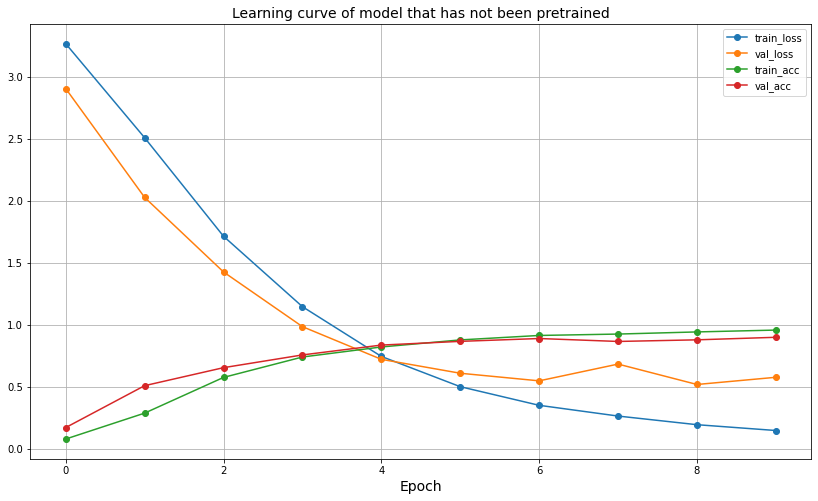

In [ ]:
log = [{'epoch': 0, 'train loss': 3.266424189752607, 'val loss': 2.9049477577209473, 'train accuracy': 0.0809794776119403, 'val accuracy': 0.1733058608058608, 'train f1_score': 0.06458435348636543, 'val f1_score': 0.1349148928948036}, {'epoch': 1, 'train loss': 2.5086855158877017, 'val loss': 2.027981687159765, 'train accuracy': 0.2897667910447761, 'val accuracy': 0.5109317765567766, 'train f1_score': 0.2654170943587921, 'val f1_score': 0.4903861325998931}, {'epoch': 2, 'train loss': 1.7147357348185868, 'val loss': 1.4270856848784856, 'train accuracy': 0.5774720149253731, 'val accuracy': 0.6560210622710623, 'train f1_score': 0.5711681995968376, 'val f1_score': 0.6639246789916433}, {'epoch': 3, 'train loss': 1.1474410402241038, 'val loss': 0.9865132435446694, 'train accuracy': 0.7418470149253731, 'val accuracy': 0.7586423992673993, 'train f1_score': 0.7420238092192657, 'val f1_score': 0.7765395628676879}, {'epoch': 4, 'train loss': 0.746544115356545, 'val loss': 0.7231595537492207, 'train accuracy': 0.8227985074626866, 'val accuracy': 0.8380265567765568, 'train f1_score': 0.8293705504176585, 'val f1_score': 0.8448556280029497}, {'epoch': 5, 'train loss': 0.5027736080671424, 'val loss': 0.6110461799516564, 'train accuracy': 0.879598880597015, 'val accuracy': 0.8679601648351648, 'train f1_score': 0.8857316005680842, 'val f1_score': 0.8727121836496836}, {'epoch': 6, 'train loss': 0.35260668558193675, 'val loss': 0.5498004859047276, 'train accuracy': 0.9155130597014924, 'val accuracy': 0.8908539377289377, 'train f1_score': 0.9197690615098977, 'val f1_score': 0.8932669471731971}, {'epoch': 7, 'train loss': 0.26610166968694376, 'val loss': 0.6848376435892922, 'train accuracy': 0.9267723880597015, 'val accuracy': 0.8672161172161171, 'train f1_score': 0.929681003738908, 'val f1_score': 0.8700515382435025}, {'epoch': 8, 'train loss': 0.1964831901019189, 'val loss': 0.5205118315560477, 'train accuracy': 0.9439645522388059, 'val accuracy': 0.8802655677655677, 'train f1_score': 0.9464735593490258, 'val f1_score': 0.8803973023018453}, {'epoch': 9, 'train loss': 0.14960941458259946, 'val loss': 0.5785058055605207, 'train accuracy': 0.9588899253731342, 'val accuracy': 0.9007554945054944, 'train f1_score': 0.9604135403878874, 'val f1_score': 0.9033072747358463}]

show_learning_curve(log, "Learning curve of model that has not been pretrained")

### Lần ... | Learing rate 3e-5

In [ ]:
!python3 main.py -lr 3e-5 -epochs 15

100% 134/134 [01:06<00:00,  2.02it/s]
epoch: 0              train loss: 3.414             val loss: 3.223             train accuracy: 0.035             val accuracy: 0.028             train f1_score: 0.019             val f1_score: 0.007 

100% 134/134 [01:03<00:00,  2.10it/s]
epoch: 1              train loss: 3.033             val loss: 2.753             train accuracy: 0.097             val accuracy: 0.213             train f1_score: 0.081             val f1_score: 0.175 

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 2              train loss: 2.579             val loss: 2.300             train accuracy: 0.233             val accuracy: 0.284             train f1_score: 0.206             val f1_score: 0.253 

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 3              train loss: 2.127             val loss: 1.947             train accuracy: 0.393             val accuracy: 0.423             train f1_score: 0.378             val f1_score: 0.410 

100% 134/134 [01:02<00:00,  2.14it/s]
ep

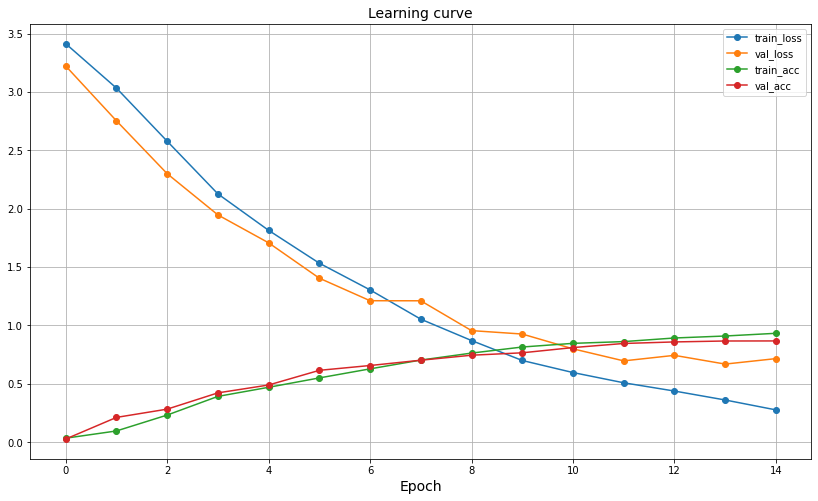

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4138462899336175, 'val loss': 3.2226542915616716, 'train accuracy': 0.03474813432835821, 'val accuracy': 0.027529761904761904, 'train f1_score': 0.019455615181377377, 'val f1_score': 0.006968406013454096}, {'epoch': 1, 'train loss': 3.0334318413663266, 'val loss': 2.753243259021214, 'train accuracy': 0.09674440298507463, 'val accuracy': 0.2127403846153846, 'train f1_score': 0.08074934101703281, 'val f1_score': 0.17498058528261032}, {'epoch': 2, 'train loss': 2.5786584064142026, 'val loss': 2.3004176928883506, 'train accuracy': 0.23290111940298505, 'val accuracy': 0.2835393772893773, 'train f1_score': 0.20611154169520018, 'val f1_score': 0.25284811598493323}, {'epoch': 3, 'train loss': 2.1272543295105892, 'val loss': 1.9472361519223167, 'train accuracy': 0.39270522388059703, 'val accuracy': 0.4229052197802198, 'train f1_score': 0.37795190188219985, 'val f1_score': 0.40978167004952715}, {'epoch': 4, 'train loss': 1.8150019343219586, 'val loss': 1.7080819862229484, 'train accuracy': 0.47063432835820895, 'val accuracy': 0.49032738095238093, 'train f1_score': 0.4577886754362967, 'val f1_score': 0.47187017265142267}, {'epoch': 5, 'train loss': 1.5335747870936323, 'val loss': 1.4051723437649863, 'train accuracy': 0.5510447761194031, 'val accuracy': 0.6160141941391941, 'train f1_score': 0.5403965569110432, 'val f1_score': 0.5967058115495615}, {'epoch': 6, 'train loss': 1.3048680798331302, 'val loss': 1.212252608367375, 'train accuracy': 0.6285820895522387, 'val accuracy': 0.6572802197802198, 'train f1_score': 0.6236685128140078, 'val f1_score': 0.6623608286554715}, {'epoch': 7, 'train loss': 1.0541516079831479, 'val loss': 1.211648011491412, 'train accuracy': 0.7038992537313432, 'val accuracy': 0.7026098901098901, 'train f1_score': 0.7058735263492727, 'val f1_score': 0.7001277657527657}, {'epoch': 8, 'train loss': 0.8712604922145161, 'val loss': 0.9561907861913953, 'train accuracy': 0.7636660447761194, 'val accuracy': 0.7454212454212454, 'train f1_score': 0.7663816975934513, 'val f1_score': 0.7512232665987918}, {'epoch': 9, 'train loss': 0.7003934928285542, 'val loss': 0.9268614259504137, 'train accuracy': 0.8156716417910448, 'val accuracy': 0.7661401098901098, 'train f1_score': 0.8224387633876221, 'val f1_score': 0.7737447902626474}, {'epoch': 10, 'train loss': 0.5969852929684654, 'val loss': 0.8001334418853124, 'train accuracy': 0.8470522388059701, 'val accuracy': 0.8108974358974359, 'train f1_score': 0.8488993077193391, 'val f1_score': 0.8058212207765778}, {'epoch': 11, 'train loss': 0.5093407987881062, 'val loss': 0.6969805225020363, 'train accuracy': 0.8621455223880597, 'val accuracy': 0.8460393772893773, 'train f1_score': 0.8647018768182481, 'val f1_score': 0.8499054723385083}, {'epoch': 12, 'train loss': 0.4385543317714734, 'val loss': 0.7443230953954515, 'train accuracy': 0.8929944029850746, 'val accuracy': 0.8592605311355311, 'train f1_score': 0.8959364337313744, 'val f1_score': 0.859910001539466}, {'epoch': 13, 'train loss': 0.361965969427308, 'val loss': 0.6695026485692888, 'train accuracy': 0.9100186567164179, 'val accuracy': 0.8672733516483516, 'train f1_score': 0.9136865405714177, 'val f1_score': 0.8688773053170374}, {'epoch': 14, 'train loss': 0.27713644988278846, 'val loss': 0.7163023446642217, 'train accuracy': 0.9331716417910448, 'val accuracy': 0.8677884615384616, 'train f1_score': 0.9361038729141706, 'val f1_score': 0.866457810542632}]

show_learning_curve(log, )

In [ ]:
!python3 main.py -lr 3e-5 -epochs 15

100% 134/134 [01:10<00:00,  1.89it/s]
epoch: 0              train loss: 3.414             val loss: 3.223             train accuracy: 0.035             val accuracy: 0.028             train f1_score: 0.019             val f1_score: 0.007 

100% 134/134 [01:07<00:00,  1.98it/s]
epoch: 1              train loss: 3.033             val loss: 2.753             train accuracy: 0.097             val accuracy: 0.213             train f1_score: 0.081             val f1_score: 0.175 

100% 134/134 [01:06<00:00,  2.01it/s]
epoch: 2              train loss: 2.579             val loss: 2.300             train accuracy: 0.233             val accuracy: 0.284             train f1_score: 0.206             val f1_score: 0.253 

100% 134/134 [01:06<00:00,  2.02it/s]
epoch: 3              train loss: 2.127             val loss: 1.947             train accuracy: 0.393             val accuracy: 0.423             train f1_score: 0.378             val f1_score: 0.410 

 91% 122/134 [01:00<00:05,  2.01it/s]
Tr

## Train PhoBERT-based model that has been pretrained

### Lần 1 | Learning rate 3e-5 | Epochs 15

In [ ]:
!python3 main.py -lr 3e-5 -epochs 15 -checkpoint './language_model_pretrained/2022-03-28-pretrained-vncorenlp-no-vocab-added'

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-03-28-pretrained-vncorenlp-no-vocab-added
100% 134/134 [01:06<00:00,  2.02it/s]
epoch: 0              train loss: 3.362             val loss: 3.088             train accuracy: 0.099             val accuracy: 0.227             train f1_score: 0.076             val f1_score: 0.191 

100% 134/134 [01:03<00:00,  2.11it/s]
epoch: 1              train loss: 2.735             val loss: 2.260             train accuracy: 0.309             val accuracy: 0.468             train f1_score: 0.285             val f1_score: 0.450 

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 2              train loss: 1.982             val loss: 1.604             train accuracy: 0.519             val accuracy: 0.633             train f1_score: 0.508             val f1_score: 0.625 

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 3              train loss: 1.447             val loss: 1.205             train accuracy: 0.682             val accuracy: 0.725           

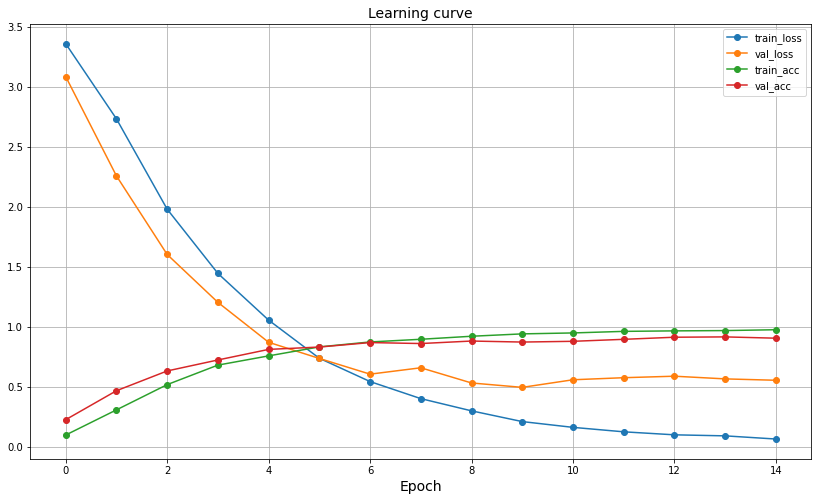

In [ ]:
log = [{'epoch': 0, 'train loss': 3.361960743790242, 'val loss': 3.0875885486602783, 'train accuracy': 0.09897388059701492, 'val accuracy': 0.22699175824175827, 'train f1_score': 0.07606090463224567, 'val f1_score': 0.19070063534349246}, {'epoch': 1, 'train loss': 2.735399356528894, 'val loss': 2.2597468268303644, 'train accuracy': 0.3087220149253731, 'val accuracy': 0.468349358974359, 'train f1_score': 0.2846700727918324, 'val f1_score': 0.45012261630565203}, {'epoch': 2, 'train loss': 1.9821313770849314, 'val loss': 1.6044862383887881, 'train accuracy': 0.5193003731343284, 'val accuracy': 0.6332989926739927, 'train f1_score': 0.5077929225107396, 'val f1_score': 0.6250513953638954}, {'epoch': 3, 'train loss': 1.4467002722754407, 'val loss': 1.2053079704443614, 'train accuracy': 0.6820149253731344, 'val accuracy': 0.7248168498168498, 'train f1_score': 0.6881340619890061, 'val f1_score': 0.7339949072091929}, {'epoch': 4, 'train loss': 1.0571065665181003, 'val loss': 0.8723721717085157, 'train accuracy': 0.758936567164179, 'val accuracy': 0.8129578754578753, 'train f1_score': 0.7667215540988862, 'val f1_score': 0.8181110101869029}, {'epoch': 5, 'train loss': 0.7390344696703242, 'val loss': 0.7374468459969475, 'train accuracy': 0.8338246268656716, 'val accuracy': 0.8326465201465202, 'train f1_score': 0.8424158573353634, 'val f1_score': 0.8395479499832179}, {'epoch': 6, 'train loss': 0.5447973759094281, 'val loss': 0.6065607049635479, 'train accuracy': 0.8750746268656716, 'val accuracy': 0.8699061355311356, 'train f1_score': 0.8811789485526476, 'val f1_score': 0.8761155280774643}, {'epoch': 7, 'train loss': 0.4025524928053813, 'val loss': 0.6597423305114111, 'train accuracy': 0.8974253731343284, 'val accuracy': 0.8618360805860806, 'train f1_score': 0.9009543305014661, 'val f1_score': 0.8629023134603491}, {'epoch': 8, 'train loss': 0.30061253460485543, 'val loss': 0.5330464662540526, 'train accuracy': 0.9226119402985075, 'val accuracy': 0.882669413919414, 'train f1_score': 0.9276289398050125, 'val f1_score': 0.8876806084953406}, {'epoch': 9, 'train loss': 0.21109207435997565, 'val loss': 0.49650689711173374, 'train accuracy': 0.9423973880597015, 'val accuracy': 0.874198717948718, 'train f1_score': 0.946201419848808, 'val f1_score': 0.8837983403831619}, {'epoch': 10, 'train loss': 0.16294001348650278, 'val loss': 0.5597948220868906, 'train accuracy': 0.9502611940298507, 'val accuracy': 0.8804372710622711, 'train f1_score': 0.952228440092246, 'val f1_score': 0.884449758195819}, {'epoch': 11, 'train loss': 0.12579365708489917, 'val loss': 0.5769942251167127, 'train accuracy': 0.9633208955223879, 'val accuracy': 0.8969780219780219, 'train f1_score': 0.9647607722365779, 'val f1_score': 0.8973761109921825}, {'epoch': 12, 'train loss': 0.10071819350679419, 'val loss': 0.5894945289141366, 'train accuracy': 0.9674533582089554, 'val accuracy': 0.9144917582417582, 'train f1_score': 0.9695350552743277, 'val f1_score': 0.9088451092849726}, {'epoch': 13, 'train loss': 0.0921205249962522, 'val loss': 0.5671006286782878, 'train accuracy': 0.9699160447761194, 'val accuracy': 0.917239010989011, 'train f1_score': 0.9710103764242536, 'val f1_score': 0.9141629575781361}, {'epoch': 14, 'train loss': 0.06564489161289895, 'val loss': 0.5556400935387328, 'train accuracy': 0.9770149253731345, 'val accuracy': 0.9064789377289377, 'train f1_score': 0.978528242642515, 'val f1_score': 0.9110753581735725}]
show_learning_curve(log)

### Lần 2 | Learning rate 3e-5 | Epochs  9

In [ ]:
!python3 main.py -lr 3e-5 -epochs 9 -checkpoint './language_model_pretrained/2022-03-28-pretrained-vncorenlp-no-vocab-added' -d './checkpoints/2020-3-29-pretrained-vncorenlp-no-vocab-added'

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-03-28-pretrained-vncorenlp-no-vocab-added
100% 134/134 [01:10<00:00,  1.90it/s]
epoch: 0              train loss: 3.362             val loss: 3.088             train accuracy: 0.099             val accuracy: 0.227             train f1_score: 0.076             val f1_score: 0.191 

100% 134/134 [01:06<00:00,  2.00it/s]
epoch: 1              train loss: 2.735             val loss: 2.260             train accuracy: 0.309             val accuracy: 0.468             train f1_score: 0.285             val f1_score: 0.450 

100% 134/134 [01:06<00:00,  2.03it/s]
epoch: 2              train loss: 1.982             val loss: 1.604             train accuracy: 0.519             val accuracy: 0.633             train f1_score: 0.508             val f1_score: 0.625 

100% 134/134 [01:05<00:00,  2.04it/s]
epoch: 3              train loss: 1.447             val loss: 1.205             train accuracy: 0.682             val accuracy: 0.725           

In [ ]:
log = [{'epoch': 0, 'train loss': 3.361960743790242, 'val loss': 3.0875885486602783, 'train accuracy': 0.09897388059701492, 'val accuracy': 0.22699175824175827, 'train f1_score': 0.07606090463224567, 'val f1_score': 0.19070063534349246}, {'epoch': 1, 'train loss': 2.735399356528894, 'val loss': 2.2597468268303644, 'train accuracy': 0.3087220149253731, 'val accuracy': 0.468349358974359, 'train f1_score': 0.2846700727918324, 'val f1_score': 0.45012261630565203}, {'epoch': 2, 'train loss': 1.9821313770849314, 'val loss': 1.6044862383887881, 'train accuracy': 0.5193003731343284, 'val accuracy': 0.6332989926739927, 'train f1_score': 0.5077929225107396, 'val f1_score': 0.6250513953638954}, {'epoch': 3, 'train loss': 1.4467002722754407, 'val loss': 1.2053079704443614, 'train accuracy': 0.6820149253731344, 'val accuracy': 0.7248168498168498, 'train f1_score': 0.6881340619890061, 'val f1_score': 0.7339949072091929}, {'epoch': 4, 'train loss': 1.0571065665181003, 'val loss': 0.8723721717085157, 'train accuracy': 0.758936567164179, 'val accuracy': 0.8129578754578753, 'train f1_score': 0.7667215540988862, 'val f1_score': 0.8181110101869029}, {'epoch': 5, 'train loss': 0.7390344696703242, 'val loss': 0.7374468459969475, 'train accuracy': 0.8338246268656716, 'val accuracy': 0.8326465201465202, 'train f1_score': 0.8424158573353634, 'val f1_score': 0.8395479499832179}, {'epoch': 6, 'train loss': 0.5447973759094281, 'val loss': 0.6065607049635479, 'train accuracy': 0.8750746268656716, 'val accuracy': 0.8699061355311356, 'train f1_score': 0.8811789485526476, 'val f1_score': 0.8761155280774643}, {'epoch': 7, 'train loss': 0.4025524928053813, 'val loss': 0.6597423305114111, 'train accuracy': 0.8974253731343284, 'val accuracy': 0.8618360805860806, 'train f1_score': 0.9009543305014661, 'val f1_score': 0.8629023134603491}, {'epoch': 8, 'train loss': 0.30061253460485543, 'val loss': 0.5330464662540526, 'train accuracy': 0.9226119402985075, 'val accuracy': 0.882669413919414, 'train f1_score': 0.9276289398050125, 'val f1_score': 0.8876806084953406}]

with open("./checkpoints/2020-3-29-pretrained-vncorenlp-no-vocab-added/log.json", "w") as f:
    f.write(
        json.dumps(log, indent=2)
    )


### Fine tune

In [ ]:
!python3 main.py -lr 1e-5 -epochs 8 -begin 9

100% 134/134 [01:10<00:00,  1.90it/s]
epoch: 9              train loss: 0.180             val loss: 0.513             train accuracy: 0.952             val accuracy: 0.906             train f1_score: 0.956             val f1_score: 0.910 

100% 134/134 [01:06<00:00,  2.02it/s]
epoch: 10             train loss: 0.151             val loss: 0.502             train accuracy: 0.961             val accuracy: 0.908             train f1_score: 0.964             val f1_score: 0.908 

100% 134/134 [01:06<00:00,  2.03it/s]
epoch: 11             train loss: 0.121             val loss: 0.524             train accuracy: 0.969             val accuracy: 0.910             train f1_score: 0.970             val f1_score: 0.909 

100% 134/134 [01:05<00:00,  2.04it/s]
epoch: 12             train loss: 0.092             val loss: 0.522             train accuracy: 0.972             val accuracy: 0.918             train f1_score: 0.974             val f1_score: 0.919 

100% 134/134 [01:05<00:00,  2.05it/s]
ep

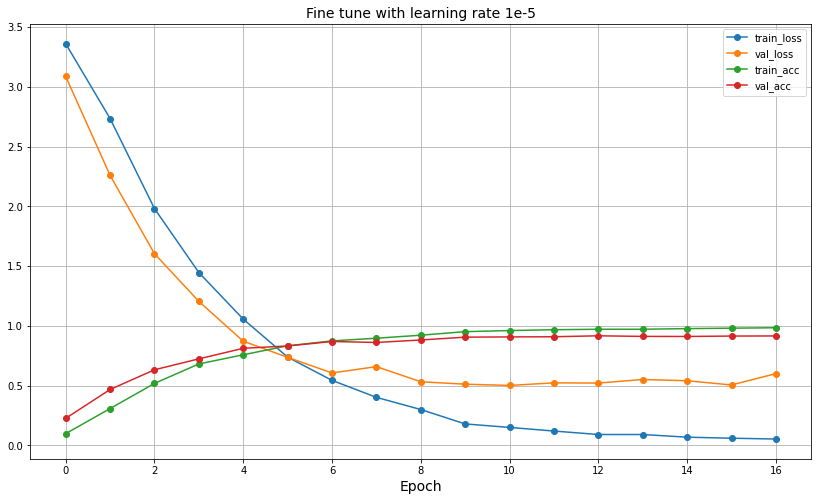

In [ ]:
log = [{'epoch': 0, 'train loss': 3.361960743790242, 'val loss': 3.0875885486602783, 'train accuracy': 0.09897388059701492, 'val accuracy': 0.22699175824175827, 'train f1_score': 0.07606090463224567, 'val f1_score': 0.19070063534349246}, {'epoch': 1, 'train loss': 2.735399356528894, 'val loss': 2.2597468268303644, 'train accuracy': 0.3087220149253731, 'val accuracy': 0.468349358974359, 'train f1_score': 0.2846700727918324, 'val f1_score': 0.45012261630565203}, {'epoch': 2, 'train loss': 1.9821313770849314, 'val loss': 1.6044862383887881, 'train accuracy': 0.5193003731343284, 'val accuracy': 0.6332989926739927, 'train f1_score': 0.5077929225107396, 'val f1_score': 0.6250513953638954}, {'epoch': 3, 'train loss': 1.4467002722754407, 'val loss': 1.2053079704443614, 'train accuracy': 0.6820149253731344, 'val accuracy': 0.7248168498168498, 'train f1_score': 0.6881340619890061, 'val f1_score': 0.7339949072091929}, {'epoch': 4, 'train loss': 1.0571065665181003, 'val loss': 0.8723721717085157, 'train accuracy': 0.758936567164179, 'val accuracy': 0.8129578754578753, 'train f1_score': 0.7667215540988862, 'val f1_score': 0.8181110101869029}, {'epoch': 5, 'train loss': 0.7390344696703242, 'val loss': 0.7374468459969475, 'train accuracy': 0.8338246268656716, 'val accuracy': 0.8326465201465202, 'train f1_score': 0.8424158573353634, 'val f1_score': 0.8395479499832179}, {'epoch': 6, 'train loss': 0.5447973759094281, 'val loss': 0.6065607049635479, 'train accuracy': 0.8750746268656716, 'val accuracy': 0.8699061355311356, 'train f1_score': 0.8811789485526476, 'val f1_score': 0.8761155280774643}, {'epoch': 7, 'train loss': 0.4025524928053813, 'val loss': 0.6597423305114111, 'train accuracy': 0.8974253731343284, 'val accuracy': 0.8618360805860806, 'train f1_score': 0.9009543305014661, 'val f1_score': 0.8629023134603491}, {'epoch': 8, 'train loss': 0.30061253460485543, 'val loss': 0.5330464662540526, 'train accuracy': 0.9226119402985075, 'val accuracy': 0.882669413919414, 'train f1_score': 0.9276289398050125, 'val f1_score': 0.8876806084953406}]
log += [{'epoch': 9, 'train loss': 0.1802126263727003, 'val loss': 0.5126145803147838, 'train accuracy': 0.9523600746268657, 'val accuracy': 0.9063072344322345, 'train f1_score': 0.9562674258266609, 'val f1_score': 0.9101711945461947}, {'epoch': 10, 'train loss': 0.15103619782003894, 'val loss': 0.5022401271299237, 'train accuracy': 0.9614272388059703, 'val accuracy': 0.9083104395604396, 'train f1_score': 0.9635741404363509, 'val f1_score': 0.9079419464464108}, {'epoch': 11, 'train loss': 0.1206193914942777, 'val loss': 0.5239964925817081, 'train accuracy': 0.9685167910447762, 'val accuracy': 0.9097985347985348, 'train f1_score': 0.9698318784849778, 'val f1_score': 0.909114769159412}, {'epoch': 12, 'train loss': 0.09170188177932999, 'val loss': 0.5219444719453653, 'train accuracy': 0.9724160447761192, 'val accuracy': 0.917639652014652, 'train f1_score': 0.9741507230849581, 'val f1_score': 0.9189974566944105}, {'epoch': 13, 'train loss': 0.09170016781218461, 'val loss': 0.5518783243993918, 'train accuracy': 0.9724160447761192, 'val accuracy': 0.9126030219780219, 'train f1_score': 0.9737186349464114, 'val f1_score': 0.9151575730816803}, {'epoch': 14, 'train loss': 0.06930269385729708, 'val loss': 0.5416420786863282, 'train accuracy': 0.9778451492537313, 'val accuracy': 0.9120306776556776, 'train f1_score': 0.9794833172631682, 'val f1_score': 0.9107959913763486}, {'epoch': 15, 'train loss': 0.06072443715338387, 'val loss': 0.5061676387364665, 'train accuracy': 0.9814458955223881, 'val accuracy': 0.9154075091575092, 'train f1_score': 0.9823032247968596, 'val f1_score': 0.9162710553335555}, {'epoch': 16, 'train loss': 0.05381438395342053, 'val loss': 0.6009428935302865, 'train accuracy': 0.9850746268656716, 'val accuracy': 0.9164949633699633, 'train f1_score': 0.9862128581928021, 'val f1_score': 0.9162237770496698}]

show_learning_curve(log, "Fine tune with learning rate 1e-5")

In [ ]:
!python3 main.py -lr 2e-5 -epochs 8 -begin 9

100% 134/134 [01:10<00:00,  1.90it/s]
epoch: 9              train loss: 0.189             val loss: 0.546             train accuracy: 0.946             val accuracy: 0.902             train f1_score: 0.951             val f1_score: 0.906 

100% 134/134 [01:06<00:00,  2.01it/s]
epoch: 10             train loss: 0.156             val loss: 0.527             train accuracy: 0.953             val accuracy: 0.906             train f1_score: 0.956             val f1_score: 0.905 

100% 134/134 [01:06<00:00,  2.03it/s]
epoch: 11             train loss: 0.107             val loss: 0.509             train accuracy: 0.964             val accuracy: 0.914             train f1_score: 0.966             val f1_score: 0.916 

100% 134/134 [01:05<00:00,  2.03it/s]
epoch: 12             train loss: 0.083             val loss: 0.562             train accuracy: 0.970             val accuracy: 0.914             train f1_score: 0.971             val f1_score: 0.913 

100% 134/134 [01:05<00:00,  2.04it/s]
ep

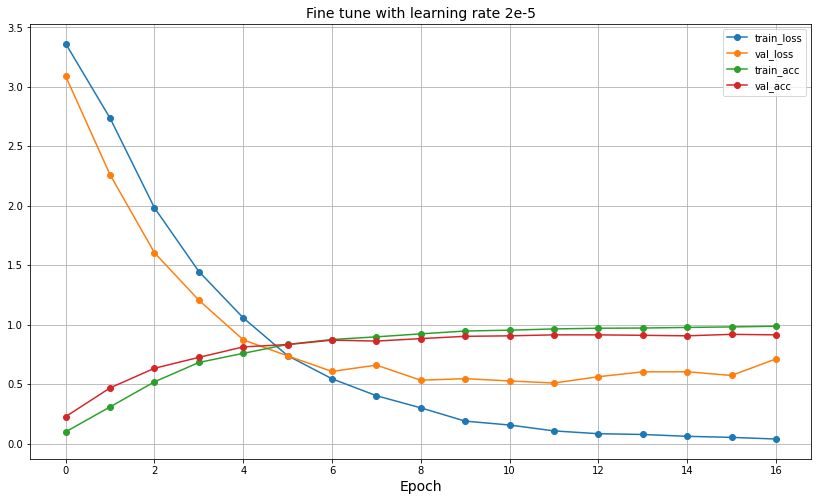

In [ ]:
log = [{'epoch': 0, 'train loss': 3.361960743790242, 'val loss': 3.0875885486602783, 'train accuracy': 0.09897388059701492, 'val accuracy': 0.22699175824175827, 'train f1_score': 0.07606090463224567, 'val f1_score': 0.19070063534349246}, {'epoch': 1, 'train loss': 2.735399356528894, 'val loss': 2.2597468268303644, 'train accuracy': 0.3087220149253731, 'val accuracy': 0.468349358974359, 'train f1_score': 0.2846700727918324, 'val f1_score': 0.45012261630565203}, {'epoch': 2, 'train loss': 1.9821313770849314, 'val loss': 1.6044862383887881, 'train accuracy': 0.5193003731343284, 'val accuracy': 0.6332989926739927, 'train f1_score': 0.5077929225107396, 'val f1_score': 0.6250513953638954}, {'epoch': 3, 'train loss': 1.4467002722754407, 'val loss': 1.2053079704443614, 'train accuracy': 0.6820149253731344, 'val accuracy': 0.7248168498168498, 'train f1_score': 0.6881340619890061, 'val f1_score': 0.7339949072091929}, {'epoch': 4, 'train loss': 1.0571065665181003, 'val loss': 0.8723721717085157, 'train accuracy': 0.758936567164179, 'val accuracy': 0.8129578754578753, 'train f1_score': 0.7667215540988862, 'val f1_score': 0.8181110101869029}, {'epoch': 5, 'train loss': 0.7390344696703242, 'val loss': 0.7374468459969475, 'train accuracy': 0.8338246268656716, 'val accuracy': 0.8326465201465202, 'train f1_score': 0.8424158573353634, 'val f1_score': 0.8395479499832179}, {'epoch': 6, 'train loss': 0.5447973759094281, 'val loss': 0.6065607049635479, 'train accuracy': 0.8750746268656716, 'val accuracy': 0.8699061355311356, 'train f1_score': 0.8811789485526476, 'val f1_score': 0.8761155280774643}, {'epoch': 7, 'train loss': 0.4025524928053813, 'val loss': 0.6597423305114111, 'train accuracy': 0.8974253731343284, 'val accuracy': 0.8618360805860806, 'train f1_score': 0.9009543305014661, 'val f1_score': 0.8629023134603491}, {'epoch': 8, 'train loss': 0.30061253460485543, 'val loss': 0.5330464662540526, 'train accuracy': 0.9226119402985075, 'val accuracy': 0.882669413919414, 'train f1_score': 0.9276289398050125, 'val f1_score': 0.8876806084953406}]
log += [{'epoch': 9, 'train loss': 0.1888515729901951, 'val loss': 0.5459482812633117, 'train accuracy': 0.9462966417910448, 'val accuracy': 0.9018429487179487, 'train f1_score': 0.9506656206562922, 'val f1_score': 0.9060647603058317}, {'epoch': 10, 'train loss': 0.15621368334030927, 'val loss': 0.5267673848374259, 'train accuracy': 0.9534981343283582, 'val accuracy': 0.9059065934065933, 'train f1_score': 0.9560145094333526, 'val f1_score': 0.9053626061438559}, {'epoch': 11, 'train loss': 0.10679962586111097, 'val loss': 0.5090623427892015, 'train accuracy': 0.9638526119402985, 'val accuracy': 0.9142628205128205, 'train f1_score': 0.9656179903282118, 'val f1_score': 0.9161893992251136}, {'epoch': 12, 'train loss': 0.08313565477450836, 'val loss': 0.562274227717093, 'train accuracy': 0.9699160447761194, 'val accuracy': 0.9140911172161171, 'train f1_score': 0.9708003840583133, 'val f1_score': 0.9133467309806594}, {'epoch': 13, 'train loss': 0.07673762349495247, 'val loss': 0.6031256262656479, 'train accuracy': 0.9714832089552238, 'val accuracy': 0.910370879120879, 'train f1_score': 0.972845623359849, 'val f1_score': 0.9113057659932661}, {'epoch': 14, 'train loss': 0.06114156393389871, 'val loss': 0.603998874801965, 'train accuracy': 0.976679104477612, 'val accuracy': 0.9060782967032966, 'train f1_score': 0.9781439078279782, 'val f1_score': 0.9035400900356259}, {'epoch': 15, 'train loss': 0.05247822839683339, 'val loss': 0.5726820959133052, 'train accuracy': 0.9808768656716418, 'val accuracy': 0.9183836996336997, 'train f1_score': 0.981502985494288, 'val f1_score': 0.9185605936722011}, {'epoch': 16, 'train loss': 0.03840585223246199, 'val loss': 0.711972709955825, 'train accuracy': 0.9867070895522388, 'val accuracy': 0.9142628205128205, 'train f1_score': 0.9878703075531434, 'val f1_score': 0.9133379352129352}]

show_learning_curve(log, "Fine tune with learning rate 2e-5")

In [ ]:
!python3 main.py -lr 5e-06 -epochs 11 -begin 9 -d "./checkpoints/2020-3-29-pretrained-vncorenlp-no-vocab-added-phase-2"


100% 134/134 [01:10<00:00,  1.90it/s]
epoch: 9              train loss: 0.177             val loss: 0.499             train accuracy: 0.953             val accuracy: 0.905             train f1_score: 0.958             val f1_score: 0.909             learning rate: 5e-06

100% 134/134 [01:07<00:00,  1.99it/s]
epoch: 10             train loss: 0.160             val loss: 0.487             train accuracy: 0.959             val accuracy: 0.909             train f1_score: 0.962             val f1_score: 0.909             learning rate: 5e-06

100% 134/134 [01:06<00:00,  2.02it/s]
epoch: 11             train loss: 0.142             val loss: 0.508             train accuracy: 0.965             val accuracy: 0.906             train f1_score: 0.966             val f1_score: 0.906             learning rate: 5e-06

100% 134/134 [01:05<00:00,  2.03it/s]
epoch: 12             train loss: 0.114             val loss: 0.495             train accuracy: 0.968             val accuracy: 0.912             

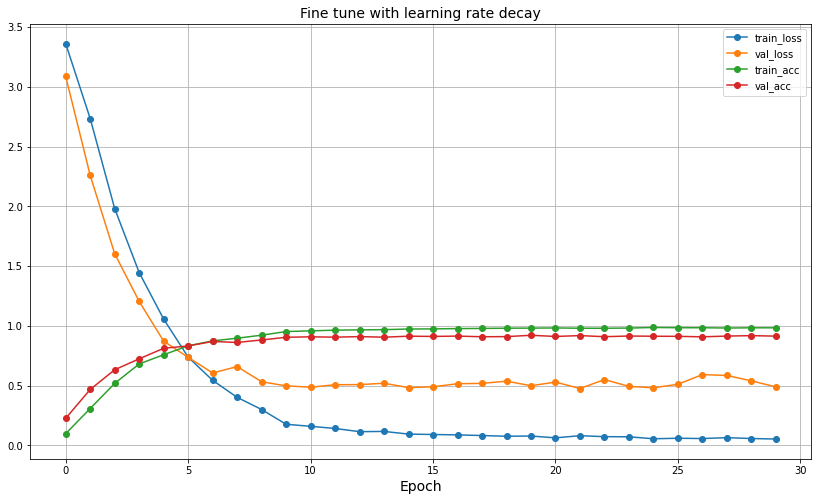

In [ ]:
log = [{'epoch': 0, 'train loss': 3.361960743790242, 'val loss': 3.0875885486602783, 'train accuracy': 0.09897388059701492, 'val accuracy': 0.22699175824175827, 'train f1_score': 0.07606090463224567, 'val f1_score': 0.19070063534349246}, {'epoch': 1, 'train loss': 2.735399356528894, 'val loss': 2.2597468268303644, 'train accuracy': 0.3087220149253731, 'val accuracy': 0.468349358974359, 'train f1_score': 0.2846700727918324, 'val f1_score': 0.45012261630565203}, {'epoch': 2, 'train loss': 1.9821313770849314, 'val loss': 1.6044862383887881, 'train accuracy': 0.5193003731343284, 'val accuracy': 0.6332989926739927, 'train f1_score': 0.5077929225107396, 'val f1_score': 0.6250513953638954}, {'epoch': 3, 'train loss': 1.4467002722754407, 'val loss': 1.2053079704443614, 'train accuracy': 0.6820149253731344, 'val accuracy': 0.7248168498168498, 'train f1_score': 0.6881340619890061, 'val f1_score': 0.7339949072091929}, {'epoch': 4, 'train loss': 1.0571065665181003, 'val loss': 0.8723721717085157, 'train accuracy': 0.758936567164179, 'val accuracy': 0.8129578754578753, 'train f1_score': 0.7667215540988862, 'val f1_score': 0.8181110101869029}, {'epoch': 5, 'train loss': 0.7390344696703242, 'val loss': 0.7374468459969475, 'train accuracy': 0.8338246268656716, 'val accuracy': 0.8326465201465202, 'train f1_score': 0.8424158573353634, 'val f1_score': 0.8395479499832179}, {'epoch': 6, 'train loss': 0.5447973759094281, 'val loss': 0.6065607049635479, 'train accuracy': 0.8750746268656716, 'val accuracy': 0.8699061355311356, 'train f1_score': 0.8811789485526476, 'val f1_score': 0.8761155280774643}, {'epoch': 7, 'train loss': 0.4025524928053813, 'val loss': 0.6597423305114111, 'train accuracy': 0.8974253731343284, 'val accuracy': 0.8618360805860806, 'train f1_score': 0.9009543305014661, 'val f1_score': 0.8629023134603491}, {'epoch': 8, 'train loss': 0.30061253460485543, 'val loss': 0.5330464662540526, 'train accuracy': 0.9226119402985075, 'val accuracy': 0.882669413919414, 'train f1_score': 0.9276289398050125, 'val f1_score': 0.8876806084953406}]
log += [{'epoch': 9, 'train loss': 0.17719828178967112, 'val loss': 0.498551432043314, 'train accuracy': 0.9530597014925373, 'val accuracy': 0.9049908424908425, 'train f1_score': 0.9578259548805256, 'val f1_score': 0.9094549258611758}, {'epoch': 10, 'train loss': 0.16003582559859575, 'val loss': 0.48737297313553946, 'train accuracy': 0.9589272388059702, 'val accuracy': 0.9090544871794871, 'train f1_score': 0.9620433559496059, 'val f1_score': 0.9090026706098134}, {'epoch': 11, 'train loss': 0.14194773045827203, 'val loss': 0.507801797595762, 'train accuracy': 0.964785447761194, 'val accuracy': 0.9060782967032966, 'train f1_score': 0.9663695318556536, 'val f1_score': 0.9063515023336454}, {'epoch': 12, 'train loss': 0.11527997091301341, 'val loss': 0.5091043228194827, 'train accuracy': 0.96705223880597, 'val accuracy': 0.9107715201465202, 'train f1_score': 0.9688262913496121, 'val f1_score': 0.9137166966145432}, {'epoch': 13, 'train loss': 0.11725542933416011, 'val loss': 0.5203435189489808, 'train accuracy': 0.968917910447761, 'val accuracy': 0.9059065934065933, 'train f1_score': 0.9707783020620486, 'val f1_score': 0.9100270265448837}, {'epoch': 14, 'train loss': 0.09495589291371072, 'val loss': 0.4838728629762218, 'train accuracy': 0.9741138059701493, 'val accuracy': 0.9142628205128205, 'train f1_score': 0.9755823985301597, 'val f1_score': 0.9136599965841037}, {'epoch': 15, 'train loss': 0.09146647993475199, 'val loss': 0.4907977415160054, 'train accuracy': 0.9753824626865673, 'val accuracy': 0.9122596153846154, 'train f1_score': 0.9777694018253721, 'val f1_score': 0.9142558417111989}, {'epoch': 16, 'train loss': 0.08836076065286327, 'val loss': 0.5162964491617112, 'train accuracy': 0.9778451492537313, 'val accuracy': 0.915006868131868, 'train f1_score': 0.9788266472851361, 'val f1_score': 0.9152860408440766}, {'epoch': 17, 'train loss': 0.08272645273593379, 'val loss': 0.5193124298627178, 'train accuracy': 0.9792444029850746, 'val accuracy': 0.9094551282051283, 'train f1_score': 0.9801246405957227, 'val f1_score': 0.9121411392354146}, {'epoch': 18, 'train loss': 0.07705613060284462, 'val loss': 0.5377232424826139, 'train accuracy': 0.9811100746268657, 'val accuracy': 0.9107715201465202, 'train f1_score': 0.9825542946636697, 'val f1_score': 0.9145519411144412}, {'epoch': 19, 'train loss': 0.07874398322692558, 'val loss': 0.499877353243175, 'train accuracy': 0.9818097014925373, 'val accuracy': 0.9217605311355311, 'train f1_score': 0.9827467412355472, 'val f1_score': 0.9204642455758526}, {'epoch': 20, 'train loss': 0.0635477474876749, 'val loss': 0.5299251044080371, 'train accuracy': 0.9832089552238806, 'val accuracy': 0.9120306776556776, 'train f1_score': 0.9843535946847514, 'val f1_score': 0.9135121946505874}, {'epoch': 21, 'train loss': 0.08155904603260222, 'val loss': 0.4763208878270927, 'train accuracy': 0.9808115671641789, 'val accuracy': 0.9191277472527473, 'train f1_score': 0.9815484026752683, 'val f1_score': 0.9173486153396867}, {'epoch': 22, 'train loss': 0.07348977016813274, 'val loss': 0.5512424548866138, 'train accuracy': 0.980643656716418, 'val accuracy': 0.9100274725274725, 'train f1_score': 0.9820187961395983, 'val f1_score': 0.9091351625391804}, {'epoch': 23, 'train loss': 0.07228709318077386, 'val loss': 0.49416901104684385, 'train accuracy': 0.9822761194029851, 'val accuracy': 0.9155792124542124, 'train f1_score': 0.9832691717486493, 'val f1_score': 0.9165087557944699}, {'epoch': 24, 'train loss': 0.05584556713644693, 'val loss': 0.4824664829121459, 'train accuracy': 0.9871735074626866, 'val accuracy': 0.913919413919414, 'train f1_score': 0.9874890845424208, 'val f1_score': 0.916596406209367}, {'epoch': 25, 'train loss': 0.06025761495163636, 'val loss': 0.5117365293027389, 'train accuracy': 0.9850746268656716, 'val accuracy': 0.9129464285714286, 'train f1_score': 0.9859861777422413, 'val f1_score': 0.9113648363385758}, {'epoch': 26, 'train loss': 0.0577437980656526, 'val loss': 0.5928603524696969, 'train accuracy': 0.9848414179104478, 'val accuracy': 0.9088827838827838, 'train f1_score': 0.9855459903384344, 'val f1_score': 0.9104124463499464}, {'epoch': 27, 'train loss': 0.06508071797051981, 'val loss': 0.5855199970482361, 'train accuracy': 0.98267723880597, 'val accuracy': 0.9152358058608059, 'train f1_score': 0.9837480381351649, 'val f1_score': 0.9140554031441637}, {'epoch': 28, 'train loss': 0.05792893490184154, 'val loss': 0.5402953262396512, 'train accuracy': 0.9843097014925372, 'val accuracy': 0.9187271062271062, 'train f1_score': 0.9851652573173095, 'val f1_score': 0.9148095136640719}, {'epoch': 29, 'train loss': 0.053626074622482506, 'val loss': 0.4898240404824416, 'train accuracy': 0.984375, 'val accuracy': 0.9146634615384616, 'train f1_score': 0.9843022798980603, 'val f1_score': 0.9151407867925725}]

show_learning_curve(log, "Fine tune with learning rate decay")

In [ ]:
with open("./checkpoints/2020-3-29-pretrained-vncorenlp-no-vocab-added-phase-2/log.json", "w") as f:
    f.write(
        json.dumps(log, indent=2)
    )


# Final

In [ ]:
import regex as re

re.sub(r"\s{2,}", " ", "xin   chào")


'xin chào'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# %cd /content/drive/MyDrive/BIZZI/nlp_task/category_classification
%cd /content/drive/MyDrive/category_classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/category_classification


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from vncorenlp import VnCoreNLP
import json
import concurrent.futures

In [ ]:
word_segmenter = VnCoreNLP(
            "./vncorenlp/VnCoreNLP-1.1.1.jar",
            annotators="wseg",
            max_heap_size="-Xmx500m",
        )
model = AutoModelForSequenceClassification.from_pretrained(
    "./checkpoints/2020-3-29-pretrained-vncorenlp-no-vocab-added-phase-2"
)
tokenizer = AutoTokenizer.from_pretrained(
    "./checkpoints/original/tokenizer"
)

category_classifier = pipeline(
    "text-classification", tokenizer=tokenizer, model=model
)

In [ ]:
with open("./dataset/28-3-2022/test_dataset_for_category_cls.json", "r") as f:
    test_dataset = json.loads(f.read())
item_names = [each["itemName"] for each in test_dataset]

In [ ]:
def preprocess_sent(sent):
    sent = sent.lower().strip()
    sent = " ".join(word_segmenter.tokenize(sent)[0])
    return sent


def inference(item_name):
    tokenized_sent = preprocess_sent(item_name)
    pred = category_classifier(tokenized_sent)[0]
    pred["itemName"] = item_name
    # print(pred)
    return pred

inference(item_names[0])


# Gather domain specific dictionary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# %cd /content/drive/MyDrive/BIZZI/nlp_task/category_classification
%cd /content/drive/MyDrive/category_classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/category_classification


In [ ]:
!pip install vncorenlp
!pip install transformers

In [ ]:
import json 
from collections import defaultdict
from nltk import ngrams
import regex as re
from typing import List
import random
from vncorenlp import VnCoreNLP
from transformers import AutoTokenizer
from collections import Counter
import itertools


In [ ]:

with open("./dataset/28-3-2022/dataset_for_category_classification.json", "r") as f:
    dataset = json.loads(f.read())
labels = [each["label"] for each in dataset]
sentences = [each["itemName"] for each in dataset]

In [ ]:
categories = sorted(set(labels))

In [ ]:
word_segmenter = VnCoreNLP(
            "./vncorenlp/VnCoreNLP-1.1.1.jar",
            annotators="wseg",
            max_heap_size="-Xmx500m",
        )

tokenizer = AutoTokenizer.from_pretrained(
    "./checkpoints/original/tokenizer"
)
vocab = tokenizer.get_vocab()

'kẹo cao su mentos pure fresh bạc hà không đường hũ 61 25g'

In [ ]:


def prettify_text(text: str) -> str:
    # Remove words including both letter(s) and digit(s). Note: DON'T remove words like PO1234
    pattern = r'''(\b(?!PO)[A-Z\p{L}]+[*\d@.,/-]+[\w@]*|[*\d@.,/-]+[A-Z\p{L}]+[\w@]*)'''
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)


    # Remove punctuation
    punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    pattern = f"([{punctuation}])"
    text = re.sub(pattern, " ", text)

    # Remove words with less than 4 digits and redundant spaces
    text = re.sub(r"\b\d{1,4}\b|\s{2,}", " ", text)
    return text.lower().strip()

def ngram_tokenizer(text: str, n=2) -> List[str]:
    text = prettify_text(text)
    ngram_words = ngrams(text.split(), n)
    tokens = [" ".join(token) for token in list(ngram_words)]
    return tokens

def word_tokenize(text: str) -> List[str]:
    text = prettify_text(text)
    if text: 
        return word_segmenter.tokenize(text)[0]
    # Empty string after being preprocessed
    return []

prettify_text(
    "CÁP CAT6 4UTP, 23AWG, CM-305M/THÙNG( XUẤT HÓA ĐƠN THEO PO SỐ: 1613352, 11/2/2022)"
)

'cáp xuất hóa đơn theo po số 1613352'

In [ ]:
"bít_tết" in vocab

False

In [ ]:
total = 0
new_tokens = defaultdict(int)
for category in categories:
    sample = filter(
    lambda item: item["label"] == category, dataset
    )
    tokens = list(itertools.chain(*map(
        lambda item: word_tokenize(item["itemName"]), sample
    )))

    token_counter = Counter(tokens)

    oov_tokens = dict(filter(
        lambda token: token[0] not in vocab, token_counter.items()
    ))
    oov_tokens = dict(sorted(oov_tokens.items(), key=lambda item: item[1], reverse=True))
    total += len(oov_tokens)

In [ ]:
tokens = list(itertools.chain(*map(
        lambda item: word_tokenize(item["itemName"]), dataset
    )))

token_counter = Counter(tokens)

oov_tokens = dict(filter(
    lambda token: token[0] not in vocab, token_counter.items()
))
oov_tokens = dict(sorted(oov_tokens.items(), key=lambda item: item[1], reverse=True))


In [ ]:
len(oov_tokens)

2603

In [ ]:
most_freq_tokens = dict(filter(
    lambda token: token[1] > 5, oov_tokens.items()
))

In [ ]:
for i in range(6):
    most_freq_tokens = dict(filter(
    lambda token: token[1] > i, oov_tokens.items()
    ))
    print(f"Min freq: {i:<2d}\t {len(most_freq_tokens)}")

Min freq: 0 	 2603
Min freq: 1 	 1336
Min freq: 2 	 879
Min freq: 3 	 638
Min freq: 4 	 476
Min freq: 5 	 376


In [ ]:
prettify_text(
    "- Đối với tàu thuyền (On ship)"
)

'đối với tàu thuyền on ship'

In [ ]:
!ls

checkpoints			    phobert-base-finetuned-domain-specific
config.py			    pretrain_masked_language_model
dataset				    __pycache__
dataset_builder.py		    requirements.txt
language_model_pretrained	    test_dataset.json
libs.py				    train_category_classifcation.ipynb
main_category_classification.ipynb  utils.py
main.py				    vncorenlp


In [ ]:
with open("./dataset/new_tokens.json", "w") as f:
    f.write(json.dumps(oov_tokens, indent=2, ensure_ascii=False))

# Train pretrained model with new tokens added

In [ ]:
import transformers
from transformers import AutoModelForSequenceClassification, AutoModelForMaskedLM, AutoTokenizer
import json

In [ ]:

with open("./dataset/28-3-2022/dataset_for_category_classification.json", "r") as f:
    dataset = json.loads(f.read())
labels = [each["label"] for each in dataset]
sentences = [each["itemName"] for each in dataset]

In [ ]:
categories = sorted(set(labels))

label2id = { label: index for index, label in enumerate(categories)}
id2label = { index: label for index, label in enumerate(categories)}

In [ ]:
model_checkpoint = "vinai/phobert-base"
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, label2id=label2id, id2label=id2label
)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

## Lần 1, có scheduler từ đầu

In [ ]:
!python3 main.py -lr 3e-5 -epochs 15 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2"

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [1:34:07<00:00, 42.15s/it]
epoch: 0              train loss: 3.444             val loss: 3.428             train accuracy: 0.031             val accuracy: 0.022             train f1_score: 0.015             val f1_score: 0.002             learning rate: 3e-05

 81% 109/134 [1:16:39<17:42, 42.50s/it]

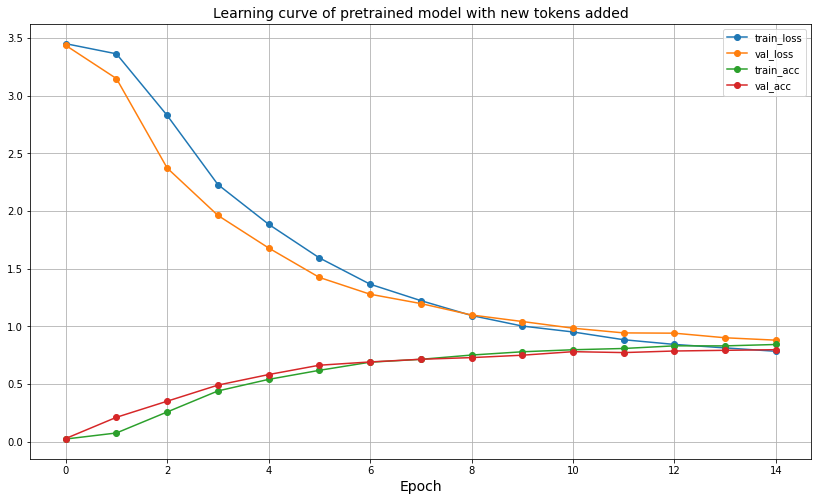

In [ ]:
log = [{'epoch': 0, 'train loss': 3.45023213037804, 'val loss': 3.435676313581921, 'train accuracy': 0.02455223880597015, 'val accuracy': 0.029017857142857144, 'train f1_score': 0.01508289802304563, 'val f1_score': 0.01965143471326764}, {'epoch': 1, 'train loss': 3.3623916640210507, 'val loss': 3.147839109102885, 'train accuracy': 0.07708955223880597, 'val accuracy': 0.2129120879120879, 'train f1_score': 0.060844764829952644, 'val f1_score': 0.15638200744555789}, {'epoch': 2, 'train loss': 2.8286708130765317, 'val loss': 2.372626772948674, 'train accuracy': 0.2590858208955224, 'val accuracy': 0.35233516483516486, 'train f1_score': 0.23774643049463845, 'val f1_score': 0.33447756773649634}, {'epoch': 3, 'train loss': 2.229634194231745, 'val loss': 1.9623357767150515, 'train accuracy': 0.44125, 'val accuracy': 0.49175824175824173, 'train f1_score': 0.42018452629460096, 'val f1_score': 0.46778465003911435}, {'epoch': 4, 'train loss': 1.8854802259758336, 'val loss': 1.6800664038885207, 'train accuracy': 0.5414272388059702, 'val accuracy': 0.58316163003663, 'train f1_score': 0.5277455702723893, 'val f1_score': 0.5754503804727019}, {'epoch': 5, 'train loss': 1.5942164570537967, 'val loss': 1.424997471627735, 'train accuracy': 0.6199160447761194, 'val accuracy': 0.6641483516483516, 'train f1_score': 0.6191001250511511, 'val f1_score': 0.6695888024013024}, {'epoch': 6, 'train loss': 1.3662331638051504, 'val loss': 1.2793496747811635, 'train accuracy': 0.6905410447761194, 'val accuracy': 0.6924793956043956, 'train f1_score': 0.6935574040204747, 'val f1_score': 0.6942488521729593}, {'epoch': 7, 'train loss': 1.2240106988309034, 'val loss': 1.1985296280611129, 'train accuracy': 0.7152238805970149, 'val accuracy': 0.7156593406593407, 'train f1_score': 0.7155454078984862, 'val f1_score': 0.7174667305247663}, {'epoch': 8, 'train loss': 1.0949579917672854, 'val loss': 1.0993781742595492, 'train accuracy': 0.7522761194029851, 'val accuracy': 0.7300824175824177, 'train f1_score': 0.7570761281628818, 'val f1_score': 0.7387972394668824}, {'epoch': 9, 'train loss': 1.003503541448223, 'val loss': 1.0429633940969194, 'train accuracy': 0.7805597014925373, 'val accuracy': 0.7508585164835165, 'train f1_score': 0.7848674282395611, 'val f1_score': 0.7558759899161684}, {'epoch': 10, 'train loss': 0.9522971346307156, 'val loss': 0.9850401069436755, 'train accuracy': 0.798143656716418, 'val accuracy': 0.7815361721611722, 'train f1_score': 0.8027467389814424, 'val f1_score': 0.7835541318800248}, {'epoch': 11, 'train loss': 0.8849311035070846, 'val loss': 0.9441807255858466, 'train accuracy': 0.809169776119403, 'val accuracy': 0.773695054945055, 'train f1_score': 0.8153738684615549, 'val f1_score': 0.7841464793473721}, {'epoch': 12, 'train loss': 0.844399484235849, 'val loss': 0.9417823396977925, 'train accuracy': 0.8320242537313434, 'val accuracy': 0.7873168498168498, 'train f1_score': 0.8389270019470579, 'val f1_score': 0.7871131679167392}, {'epoch': 13, 'train loss': 0.8141732460527278, 'val loss': 0.901958438612166, 'train accuracy': 0.8316977611940298, 'val accuracy': 0.7932692307692308, 'train f1_score': 0.8373655248151516, 'val f1_score': 0.7993762644432287}, {'epoch': 14, 'train loss': 0.7848197028263292, 'val loss': 0.8812954496769678, 'train accuracy': 0.8438246268656716, 'val accuracy': 0.7986492673992674, 'train f1_score': 0.8499773224135878, 'val f1_score': 0.8060208661213127}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

## Lần 2, ko có scheduler

In [ ]:
!python3 main.py -lr 5e-5 -epochs 15 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2"

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [01:05<00:00,  2.04it/s]
epoch: 0              train loss: 3.448             val loss: 3.429             train accuracy: 0.022             val accuracy: 0.019             train f1_score: 0.011             val f1_score: 0.002             learning rate: 3e-05

100% 134/134 [01:03<00:00,  2.11it/s]
epoch: 1              train loss: 3.444             val loss: 3.439             train accuracy: 0.021             val accuracy: 0.022             train f1_score: 0.015             val f1_score: 0.002             learning rate: 3e-05

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 2              train loss: 3.446             val loss: 3.429             train accuracy: 0.045             val accuracy: 0.098             train f1_score: 0.033             val f1_score: 0.022             learning rate: 3e-05

100% 134/134 [01:02<00:00,  2.14it/s]
epoch: 3              train loss: 3.425            

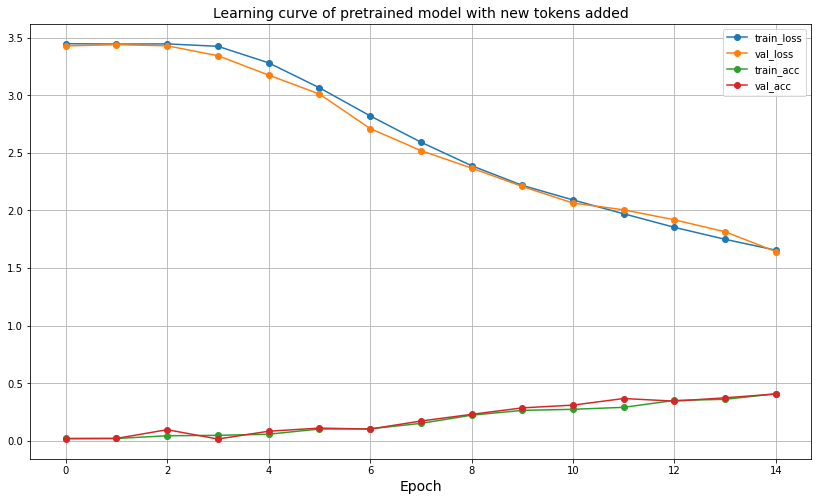

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4476845264434814, 'val loss': 3.4285386687233332, 'train accuracy': 0.021753731343283584, 'val accuracy': 0.019345238095238096, 'train f1_score': 0.0114452785881901, 'val f1_score': 0.0017593400996762344}, {'epoch': 1, 'train loss': 3.4442711196728606, 'val loss': 3.4389840080624534, 'train accuracy': 0.021455223880597014, 'val accuracy': 0.021577380952380952, 'train f1_score': 0.01522383805890069, 'val f1_score': 0.0021419931609007238}, {'epoch': 2, 'train loss': 3.44581727305455, 'val loss': 3.429488868940444, 'train accuracy': 0.04484141791044776, 'val accuracy': 0.09764194139194139, 'train f1_score': 0.03345278492928281, 'val f1_score': 0.022446107007723596}, {'epoch': 3, 'train loss': 3.425020415391495, 'val loss': 3.343367968286787, 'train accuracy': 0.04880597014925373, 'val accuracy': 0.016540750915750916, 'train f1_score': 0.03143726316785963, 'val f1_score': 0.0026127038776411924}, {'epoch': 4, 'train loss': 3.2814399270869012, 'val loss': 3.1751864069984075, 'train accuracy': 0.05836753731343284, 'val accuracy': 0.08424908424908424, 'train f1_score': 0.03350828259334774, 'val f1_score': 0.027271953568821356}, {'epoch': 5, 'train loss': 3.0653569360277544, 'val loss': 3.0110808667682467, 'train accuracy': 0.10357276119402985, 'val accuracy': 0.11137820512820512, 'train f1_score': 0.07043072511598268, 'val f1_score': 0.04801490507581382}, {'epoch': 6, 'train loss': 2.821464949579381, 'val loss': 2.711542941275097, 'train accuracy': 0.10513992537313434, 'val accuracy': 0.10302197802197802, 'train f1_score': 0.07301261350761214, 'val f1_score': 0.0667196318486193}, {'epoch': 7, 'train loss': 2.5934848838777684, 'val loss': 2.5202921004522416, 'train accuracy': 0.1524160447761194, 'val accuracy': 0.17273351648351648, 'train f1_score': 0.12537069771938625, 'val f1_score': 0.15173645385698958}, {'epoch': 8, 'train loss': 2.389056317841829, 'val loss': 2.368422752334958, 'train accuracy': 0.22350746268656715, 'val accuracy': 0.23059752747252746, 'train f1_score': 0.2038730550647528, 'val f1_score': 0.18346722515249297}, {'epoch': 9, 'train loss': 2.2181074085520276, 'val loss': 2.208537746043432, 'train accuracy': 0.26525186567164183, 'val accuracy': 0.2869162087912088, 'train f1_score': 0.24462240203308303, 'val f1_score': 0.2395339283732141}, {'epoch': 10, 'train loss': 2.091405396141223, 'val loss': 2.06470764534814, 'train accuracy': 0.2744776119402985, 'val accuracy': 0.31095467032967034, 'train f1_score': 0.24739798070491112, 'val f1_score': 0.2547539975586194}, {'epoch': 11, 'train loss': 1.9715420906223469, 'val loss': 2.0057623301233565, 'train accuracy': 0.2918003731343284, 'val accuracy': 0.3681891025641026, 'train f1_score': 0.2625519996873432, 'val f1_score': 0.3295569320385497}, {'epoch': 12, 'train loss': 1.8537786247125312, 'val loss': 1.919045314902351, 'train accuracy': 0.3515671641791045, 'val accuracy': 0.34529532967032966, 'train f1_score': 0.3241825085673033, 'val f1_score': 0.3057379541754542}, {'epoch': 13, 'train loss': 1.7499071332945753, 'val loss': 1.8152553268841334, 'train accuracy': 0.3611940298507463, 'val accuracy': 0.37437042124542125, 'train f1_score': 0.33686573992963914, 'val f1_score': 0.32355182846254277}, {'epoch': 14, 'train loss': 1.6552015809870477, 'val loss': 1.6433171885354179, 'train accuracy': 0.4094309701492537, 'val accuracy': 0.40739468864468864, 'train f1_score': 0.38704495281874013, 'val f1_score': 0.38259421217010503}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

In [ ]:
!python3 main.py -lr 2e-5 -epochs 25 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2"

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [01:05<00:00,  2.05it/s]
epoch: 0              train loss: 3.439             val loss: 3.410             train accuracy: 0.034             val accuracy: 0.032             train f1_score: 0.025             val f1_score: 0.016             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.12it/s]
epoch: 1              train loss: 3.351             val loss: 3.218             train accuracy: 0.045             val accuracy: 0.078             train f1_score: 0.028             val f1_score: 0.048             learning rate: 2e-05

100% 134/134 [01:02<00:00,  2.14it/s]
epoch: 2              train loss: 3.098             val loss: 2.955             train accuracy: 0.085             val accuracy: 0.076             train f1_score: 0.058             val f1_score: 0.047             learning rate: 2e-05

100% 134/134 [01:02<00:00,  2.14it/s]
epoch: 3              train loss: 2.839            

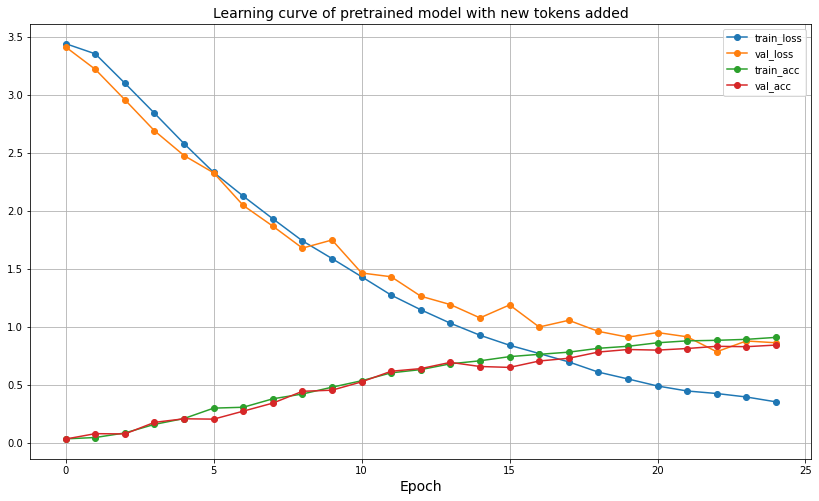

In [ ]:
log = [{'epoch': 0, 'train loss': 3.438868590255282, 'val loss': 3.4102623405910673, 'train accuracy': 0.033582089552238806, 'val accuracy': 0.03216575091575092, 'train f1_score': 0.024893325237922155, 'val f1_score': 0.015684219837180362}, {'epoch': 1, 'train loss': 3.3512717005032213, 'val loss': 3.217776298522949, 'train accuracy': 0.04537313432835821, 'val accuracy': 0.07846840659340659, 'train f1_score': 0.02821883729878701, 'val f1_score': 0.04792664759182616}, {'epoch': 2, 'train loss': 3.0980720733528706, 'val loss': 2.955449354080927, 'train accuracy': 0.08455223880597015, 'val accuracy': 0.07606456043956043, 'train f1_score': 0.057609036021633205, 'val f1_score': 0.04723481497862303}, {'epoch': 3, 'train loss': 2.8394632001421343, 'val loss': 2.6882535332725164, 'train accuracy': 0.15847947761194028, 'val accuracy': 0.17588141025641027, 'train f1_score': 0.12895456820548734, 'val f1_score': 0.1328649413900101}, {'epoch': 4, 'train loss': 2.5775712853047383, 'val loss': 2.4749517554328557, 'train accuracy': 0.20898320895522388, 'val accuracy': 0.20661630036630035, 'train f1_score': 0.18675004643987853, 'val f1_score': 0.16780577785698583}, {'epoch': 5, 'train loss': 2.3297400483444557, 'val loss': 2.325952995391119, 'train accuracy': 0.2984701492537314, 'val accuracy': 0.2036401098901099, 'train f1_score': 0.2723936270203555, 'val f1_score': 0.17222111552468697}, {'epoch': 6, 'train loss': 2.124924254951192, 'val loss': 2.0449206885837374, 'train accuracy': 0.3059981343283582, 'val accuracy': 0.2724358974358974, 'train f1_score': 0.2912863580942762, 'val f1_score': 0.27053866685563116}, {'epoch': 7, 'train loss': 1.9301204272170565, 'val loss': 1.8664486209551494, 'train accuracy': 0.37878731343283584, 'val accuracy': 0.3417467948717949, 'train f1_score': 0.3654689138597721, 'val f1_score': 0.3283641127391127}, {'epoch': 8, 'train loss': 1.7398287182423606, 'val loss': 1.6772229075431824, 'train accuracy': 0.4201585820895522, 'val accuracy': 0.44345238095238093, 'train f1_score': 0.4121012802496012, 'val f1_score': 0.4257704142748785}, {'epoch': 9, 'train loss': 1.587384416096246, 'val loss': 1.7474143320605868, 'train accuracy': 0.47886194029850737, 'val accuracy': 0.453125, 'train f1_score': 0.47789425776855815, 'val f1_score': 0.4277831832519332}, {'epoch': 10, 'train loss': 1.4306973036545425, 'val loss': 1.4629823153927213, 'train accuracy': 0.5344309701492538, 'val accuracy': 0.524896978021978, 'train f1_score': 0.536913488770765, 'val f1_score': 0.5081733701153344}, {'epoch': 11, 'train loss': 1.2722305215116758, 'val loss': 1.4304133362713314, 'train accuracy': 0.6025559701492538, 'val accuracy': 0.6163576007326007, 'train f1_score': 0.5995813631331355, 'val f1_score': 0.6099946618361797}, {'epoch': 12, 'train loss': 1.1460130672846267, 'val loss': 1.2629220599219912, 'train accuracy': 0.6305037313432835, 'val accuracy': 0.6390796703296703, 'train f1_score': 0.6335141308397728, 'val f1_score': 0.6294109205939562}, {'epoch': 13, 'train loss': 1.0301299184115964, 'val loss': 1.190670410792033, 'train accuracy': 0.6802798507462686, 'val accuracy': 0.6928800366300367, 'train f1_score': 0.6843740214232286, 'val f1_score': 0.6944498953427525}, {'epoch': 14, 'train loss': 0.926536733089988, 'val loss': 1.0760587425458998, 'train accuracy': 0.7063339552238806, 'val accuracy': 0.6571085164835165, 'train f1_score': 0.7102388293195196, 'val f1_score': 0.6589807761682762}, {'epoch': 15, 'train loss': 0.8402630168555388, 'val loss': 1.1878080062922978, 'train accuracy': 0.7421828358208955, 'val accuracy': 0.649496336996337, 'train f1_score': 0.7425692918817232, 'val f1_score': 0.6360570821180065}, {'epoch': 16, 'train loss': 0.769110720104246, 'val loss': 0.997478302036013, 'train accuracy': 0.7620708955223882, 'val accuracy': 0.7043269230769231, 'train f1_score': 0.7659593843839069, 'val f1_score': 0.6963347705535207}, {'epoch': 17, 'train loss': 0.6967612311466417, 'val loss': 1.0552040444953101, 'train accuracy': 0.7807276119402986, 'val accuracy': 0.7283653846153846, 'train f1_score': 0.7835538443211018, 'val f1_score': 0.7325366804161446}, {'epoch': 18, 'train loss': 0.6088005039674133, 'val loss': 0.9600090661219188, 'train accuracy': 0.8139365671641791, 'val accuracy': 0.7817078754578753, 'train f1_score': 0.8186600931717536, 'val f1_score': 0.7870169760794761}, {'epoch': 19, 'train loss': 0.5498922005740564, 'val loss': 0.9101118672461737, 'train accuracy': 0.8314272388059701, 'val accuracy': 0.803628663003663, 'train f1_score': 0.8347643304925735, 'val f1_score': 0.8072941484771841}, {'epoch': 20, 'train loss': 0.4892083007786701, 'val loss': 0.9495992869848296, 'train accuracy': 0.8615764925373135, 'val accuracy': 0.7984203296703297, 'train f1_score': 0.8645121521823949, 'val f1_score': 0.8040892762990977}, {'epoch': 21, 'train loss': 0.4462663504614759, 'val loss': 0.9131609726519812, 'train accuracy': 0.8781343283582089, 'val accuracy': 0.8122138278388278, 'train f1_score': 0.8824886468216692, 'val f1_score': 0.8187806819503246}, {'epoch': 22, 'train loss': 0.4243809441799548, 'val loss': 0.7844439833646729, 'train accuracy': 0.8827985074626866, 'val accuracy': 0.831158424908425, 'train f1_score': 0.8869281153712397, 'val f1_score': 0.8325538811282388}, {'epoch': 23, 'train loss': 0.39453268801765656, 'val loss': 0.8772475105665979, 'train accuracy': 0.8910634328358209, 'val accuracy': 0.8278388278388278, 'train f1_score': 0.8962116357160668, 'val f1_score': 0.8297001687232781}, {'epoch': 24, 'train loss': 0.3526703106489644, 'val loss': 0.8615953099159968, 'train accuracy': 0.9081156716417911, 'val accuracy': 0.8419184981684981, 'train f1_score': 0.9116006855395847, 'val f1_score': 0.847415425960594}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

In [ ]:
!python3 main.py -lr 2e-5 -epochs 40 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2"

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [01:06<00:00,  2.01it/s]
epoch: 0              train loss: 3.439             val loss: 3.410             train accuracy: 0.034             val accuracy: 0.032             train f1_score: 0.025             val f1_score: 0.016             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.10it/s]
epoch: 1              train loss: 3.351             val loss: 3.218             train accuracy: 0.045             val accuracy: 0.078             train f1_score: 0.028             val f1_score: 0.048             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.12it/s]
epoch: 2              train loss: 3.098             val loss: 2.955             train accuracy: 0.085             val accuracy: 0.076             train f1_score: 0.058             val f1_score: 0.047             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.12it/s]
epoch: 3              train loss: 2.839            

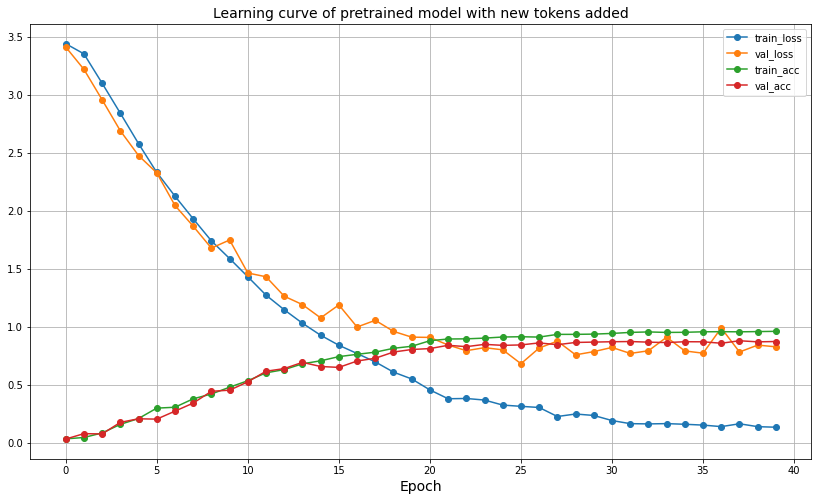

In [ ]:
log = [{'epoch': 0, 'train loss': 3.438868590255282, 'val loss': 3.4102623405910673, 'train accuracy': 0.033582089552238806, 'val accuracy': 0.03216575091575092, 'train f1_score': 0.024893325237922155, 'val f1_score': 0.015684219837180362}, {'epoch': 1, 'train loss': 3.3512717005032213, 'val loss': 3.217776298522949, 'train accuracy': 0.04537313432835821, 'val accuracy': 0.07846840659340659, 'train f1_score': 0.02821883729878701, 'val f1_score': 0.04792664759182616}, {'epoch': 2, 'train loss': 3.0980720733528706, 'val loss': 2.955449354080927, 'train accuracy': 0.08455223880597015, 'val accuracy': 0.07606456043956043, 'train f1_score': 0.057609036021633205, 'val f1_score': 0.04723481497862303}, {'epoch': 3, 'train loss': 2.8394632001421343, 'val loss': 2.6882535332725164, 'train accuracy': 0.15847947761194028, 'val accuracy': 0.17588141025641027, 'train f1_score': 0.12895456820548734, 'val f1_score': 0.1328649413900101}, {'epoch': 4, 'train loss': 2.5775712853047383, 'val loss': 2.4749517554328557, 'train accuracy': 0.20898320895522388, 'val accuracy': 0.20661630036630035, 'train f1_score': 0.18675004643987853, 'val f1_score': 0.16780577785698583}, {'epoch': 5, 'train loss': 2.3297400483444557, 'val loss': 2.325952995391119, 'train accuracy': 0.2984701492537314, 'val accuracy': 0.2036401098901099, 'train f1_score': 0.2723936270203555, 'val f1_score': 0.17222111552468697}, {'epoch': 6, 'train loss': 2.124924254951192, 'val loss': 2.0449206885837374, 'train accuracy': 0.3059981343283582, 'val accuracy': 0.2724358974358974, 'train f1_score': 0.2912863580942762, 'val f1_score': 0.27053866685563116}, {'epoch': 7, 'train loss': 1.9301204272170565, 'val loss': 1.8664486209551494, 'train accuracy': 0.37878731343283584, 'val accuracy': 0.3417467948717949, 'train f1_score': 0.3654689138597721, 'val f1_score': 0.3283641127391127}, {'epoch': 8, 'train loss': 1.7398287182423606, 'val loss': 1.6772229075431824, 'train accuracy': 0.4201585820895522, 'val accuracy': 0.44345238095238093, 'train f1_score': 0.4121012802496012, 'val f1_score': 0.4257704142748785}, {'epoch': 9, 'train loss': 1.587384416096246, 'val loss': 1.7474143320605868, 'train accuracy': 0.47886194029850737, 'val accuracy': 0.453125, 'train f1_score': 0.47789425776855815, 'val f1_score': 0.4277831832519332}, {'epoch': 10, 'train loss': 1.4306973036545425, 'val loss': 1.4629823153927213, 'train accuracy': 0.5344309701492538, 'val accuracy': 0.524896978021978, 'train f1_score': 0.536913488770765, 'val f1_score': 0.5081733701153344}, {'epoch': 11, 'train loss': 1.2722305215116758, 'val loss': 1.4304133362713314, 'train accuracy': 0.6025559701492538, 'val accuracy': 0.6163576007326007, 'train f1_score': 0.5995813631331355, 'val f1_score': 0.6099946618361797}, {'epoch': 12, 'train loss': 1.1460130672846267, 'val loss': 1.2629220599219912, 'train accuracy': 0.6305037313432835, 'val accuracy': 0.6390796703296703, 'train f1_score': 0.6335141308397728, 'val f1_score': 0.6294109205939562}, {'epoch': 13, 'train loss': 1.0301299184115964, 'val loss': 1.190670410792033, 'train accuracy': 0.6802798507462686, 'val accuracy': 0.6928800366300367, 'train f1_score': 0.6843740214232286, 'val f1_score': 0.6944498953427525}, {'epoch': 14, 'train loss': 0.926536733089988, 'val loss': 1.0760587425458998, 'train accuracy': 0.7063339552238806, 'val accuracy': 0.6571085164835165, 'train f1_score': 0.7102388293195196, 'val f1_score': 0.6589807761682762}, {'epoch': 15, 'train loss': 0.8402630168555388, 'val loss': 1.1878080062922978, 'train accuracy': 0.7421828358208955, 'val accuracy': 0.649496336996337, 'train f1_score': 0.7425692918817232, 'val f1_score': 0.6360570821180065}, {'epoch': 16, 'train loss': 0.769110720104246, 'val loss': 0.997478302036013, 'train accuracy': 0.7620708955223882, 'val accuracy': 0.7043269230769231, 'train f1_score': 0.7659593843839069, 'val f1_score': 0.6963347705535207}, {'epoch': 17, 'train loss': 0.6967612311466417, 'val loss': 1.0552040444953101, 'train accuracy': 0.7807276119402986, 'val accuracy': 0.7283653846153846, 'train f1_score': 0.7835538443211018, 'val f1_score': 0.7325366804161446}, {'epoch': 18, 'train loss': 0.6088005039674133, 'val loss': 0.9600090661219188, 'train accuracy': 0.8139365671641791, 'val accuracy': 0.7817078754578753, 'train f1_score': 0.8186600931717536, 'val f1_score': 0.7870169760794761}, {'epoch': 19, 'train loss': 0.5498922005740564, 'val loss': 0.9101118672461737, 'train accuracy': 0.8314272388059701, 'val accuracy': 0.803628663003663, 'train f1_score': 0.8347643304925735, 'val f1_score': 0.8072941484771841}, {'epoch': 20, 'train loss': 0.4555042039658596, 'val loss': 0.907938322141057, 'train accuracy': 0.8792350746268657, 'val accuracy': 0.8116414835164835, 'train f1_score': 0.8821749567803672, 'val f1_score': 0.8175802000578786}, {'epoch': 21, 'train loss': 0.37931052150566186, 'val loss': 0.8423318935646897, 'train accuracy': 0.8942257462686567, 'val accuracy': 0.839915293040293, 'train f1_score': 0.8986447714805924, 'val f1_score': 0.8417660505830149}, {'epoch': 22, 'train loss': 0.3815664618984977, 'val loss': 0.7934699530402819, 'train accuracy': 0.8954570895522389, 'val accuracy': 0.8281822344322345, 'train f1_score': 0.9003029235848046, 'val f1_score': 0.8258509450195849}, {'epoch': 23, 'train loss': 0.3680159252192547, 'val loss': 0.8194405282182353, 'train accuracy': 0.9017910447761194, 'val accuracy': 0.8479281135531135, 'train f1_score': 0.9051586498337898, 'val f1_score': 0.8473371438707572}, {'epoch': 24, 'train loss': 0.3247631044863765, 'val loss': 0.8007778692103568, 'train accuracy': 0.91125, 'val accuracy': 0.8393429487179487, 'train f1_score': 0.9149566247637977, 'val f1_score': 0.8437009815095424}, {'epoch': 25, 'train loss': 0.3139408929134483, 'val loss': 0.6812368322696004, 'train accuracy': 0.91375, 'val accuracy': 0.8430631868131868, 'train f1_score': 0.9180518463038766, 'val f1_score': 0.8499988871082622}, {'epoch': 26, 'train loss': 0.3040318089579023, 'val loss': 0.8162969196481364, 'train accuracy': 0.910615671641791, 'val accuracy': 0.8605196886446885, 'train f1_score': 0.9121547205751277, 'val f1_score': 0.8616515066892815}, {'epoch': 27, 'train loss': 0.22628565018635188, 'val loss': 0.8760191470029808, 'train accuracy': 0.9340018656716418, 'val accuracy': 0.8448946886446885, 'train f1_score': 0.9385079089239513, 'val f1_score': 0.8446042826916886}, {'epoch': 28, 'train loss': 0.24775338731706142, 'val loss': 0.7576552374022347, 'train accuracy': 0.9341697761194029, 'val accuracy': 0.8644688644688644, 'train f1_score': 0.937876698084254, 'val f1_score': 0.8628252371752897}, {'epoch': 29, 'train loss': 0.23529057390987873, 'val loss': 0.7853963949850628, 'train accuracy': 0.9362686567164179, 'val accuracy': 0.867445054945055, 'train f1_score': 0.9386628215654679, 'val f1_score': 0.8640094838197515}, {'epoch': 30, 'train loss': 0.19145451469430283, 'val loss': 0.821592688826578, 'train accuracy': 0.9420988805970149, 'val accuracy': 0.8705929487179487, 'train f1_score': 0.9435776697390502, 'val f1_score': 0.8711393764965194}, {'epoch': 31, 'train loss': 0.16469754303680428, 'val loss': 0.7698148911197981, 'train accuracy': 0.9509608208955224, 'val accuracy': 0.8722527472527473, 'train f1_score': 0.9538813651639776, 'val f1_score': 0.8687775972374189}, {'epoch': 32, 'train loss': 0.16255873936548162, 'val loss': 0.7924863919615746, 'train accuracy': 0.9550932835820896, 'val accuracy': 0.867044413919414, 'train f1_score': 0.9571419194617449, 'val f1_score': 0.8681617778715992}, {'epoch': 33, 'train loss': 0.16493389777727982, 'val loss': 0.9093945890310264, 'train accuracy': 0.9507929104477612, 'val accuracy': 0.8633241758241759, 'train f1_score': 0.9532225535140647, 'val f1_score': 0.8626199499730983}, {'epoch': 34, 'train loss': 0.1594105144656861, 'val loss': 0.7912605849671221, 'train accuracy': 0.9518936567164179, 'val accuracy': 0.8705929487179487, 'train f1_score': 0.9554332165036457, 'val f1_score': 0.8667307849227494}, {'epoch': 35, 'train loss': 0.1521811898408541, 'val loss': 0.771891793147439, 'train accuracy': 0.9561940298507462, 'val accuracy': 0.8700206043956045, 'train f1_score': 0.9591033766710072, 'val f1_score': 0.8693502884351099}, {'epoch': 36, 'train loss': 0.13912907541632208, 'val loss': 0.9892528550699353, 'train accuracy': 0.9571921641791046, 'val accuracy': 0.8576007326007326, 'train f1_score': 0.9593354293040146, 'val f1_score': 0.8552421247733748}, {'epoch': 37, 'train loss': 0.1636755182894308, 'val loss': 0.782037344007265, 'train accuracy': 0.9560261194029852, 'val accuracy': 0.8789491758241759, 'train f1_score': 0.9584260932219669, 'val f1_score': 0.8819728180219253}, {'epoch': 38, 'train loss': 0.13877139693654295, 'val loss': 0.841625264180558, 'train accuracy': 0.9579570895522387, 'val accuracy': 0.8696771978021978, 'train f1_score': 0.9596382257722522, 'val f1_score': 0.8667504411924056}, {'epoch': 39, 'train loss': 0.13392347211379613, 'val loss': 0.8267729117402008, 'train accuracy': 0.960223880597015, 'val accuracy': 0.8724244505494505, 'train f1_score': 0.961877212805851, 'val f1_score': 0.8741099292953688}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

In [ ]:
!python3 main.py -lr 2e-5 -epochs 40 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2"

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [01:05<00:00,  2.03it/s]
epoch: 0              train loss: 3.439             val loss: 3.410             train accuracy: 0.034             val accuracy: 0.032             train f1_score: 0.025             val f1_score: 0.016             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.11it/s]
epoch: 1              train loss: 3.351             val loss: 3.218             train accuracy: 0.045             val accuracy: 0.078             train f1_score: 0.028             val f1_score: 0.048             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.13it/s]
epoch: 2              train loss: 3.098             val loss: 2.955             train accuracy: 0.085             val accuracy: 0.076             train f1_score: 0.058             val f1_score: 0.047             learning rate: 2e-05

100% 134/134 [01:02<00:00,  2.14it/s]
epoch: 3              train loss: 2.839            

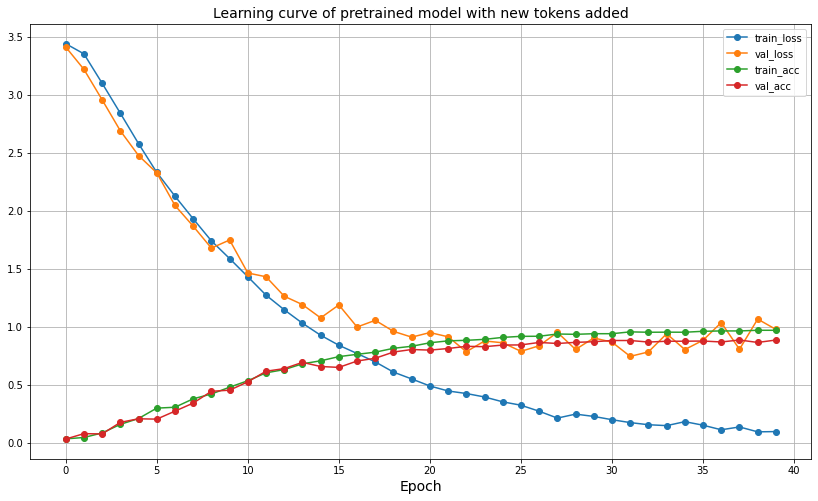

In [ ]:
log = [{'epoch': 0, 'train loss': 3.438868590255282, 'val loss': 3.4102623405910673, 'train accuracy': 0.033582089552238806, 'val accuracy': 0.03216575091575092, 'train f1_score': 0.024893325237922155, 'val f1_score': 0.015684219837180362}, {'epoch': 1, 'train loss': 3.3512717005032213, 'val loss': 3.217776298522949, 'train accuracy': 0.04537313432835821, 'val accuracy': 0.07846840659340659, 'train f1_score': 0.02821883729878701, 'val f1_score': 0.04792664759182616}, {'epoch': 2, 'train loss': 3.0980720733528706, 'val loss': 2.955449354080927, 'train accuracy': 0.08455223880597015, 'val accuracy': 0.07606456043956043, 'train f1_score': 0.057609036021633205, 'val f1_score': 0.04723481497862303}, {'epoch': 3, 'train loss': 2.8394632001421343, 'val loss': 2.6882535332725164, 'train accuracy': 0.15847947761194028, 'val accuracy': 0.17588141025641027, 'train f1_score': 0.12895456820548734, 'val f1_score': 0.1328649413900101}, {'epoch': 4, 'train loss': 2.5775712853047383, 'val loss': 2.4749517554328557, 'train accuracy': 0.20898320895522388, 'val accuracy': 0.20661630036630035, 'train f1_score': 0.18675004643987853, 'val f1_score': 0.16780577785698583}, {'epoch': 5, 'train loss': 2.3297400483444557, 'val loss': 2.325952995391119, 'train accuracy': 0.2984701492537314, 'val accuracy': 0.2036401098901099, 'train f1_score': 0.2723936270203555, 'val f1_score': 0.17222111552468697}, {'epoch': 6, 'train loss': 2.124924254951192, 'val loss': 2.0449206885837374, 'train accuracy': 0.3059981343283582, 'val accuracy': 0.2724358974358974, 'train f1_score': 0.2912863580942762, 'val f1_score': 0.27053866685563116}, {'epoch': 7, 'train loss': 1.9301204272170565, 'val loss': 1.8664486209551494, 'train accuracy': 0.37878731343283584, 'val accuracy': 0.3417467948717949, 'train f1_score': 0.3654689138597721, 'val f1_score': 0.3283641127391127}, {'epoch': 8, 'train loss': 1.7398287182423606, 'val loss': 1.6772229075431824, 'train accuracy': 0.4201585820895522, 'val accuracy': 0.44345238095238093, 'train f1_score': 0.4121012802496012, 'val f1_score': 0.4257704142748785}, {'epoch': 9, 'train loss': 1.587384416096246, 'val loss': 1.7474143320605868, 'train accuracy': 0.47886194029850737, 'val accuracy': 0.453125, 'train f1_score': 0.47789425776855815, 'val f1_score': 0.4277831832519332}, {'epoch': 10, 'train loss': 1.4306973036545425, 'val loss': 1.4629823153927213, 'train accuracy': 0.5344309701492538, 'val accuracy': 0.524896978021978, 'train f1_score': 0.536913488770765, 'val f1_score': 0.5081733701153344}, {'epoch': 11, 'train loss': 1.2722305215116758, 'val loss': 1.4304133362713314, 'train accuracy': 0.6025559701492538, 'val accuracy': 0.6163576007326007, 'train f1_score': 0.5995813631331355, 'val f1_score': 0.6099946618361797}, {'epoch': 12, 'train loss': 1.1460130672846267, 'val loss': 1.2629220599219912, 'train accuracy': 0.6305037313432835, 'val accuracy': 0.6390796703296703, 'train f1_score': 0.6335141308397728, 'val f1_score': 0.6294109205939562}, {'epoch': 13, 'train loss': 1.0301299184115964, 'val loss': 1.190670410792033, 'train accuracy': 0.6802798507462686, 'val accuracy': 0.6928800366300367, 'train f1_score': 0.6843740214232286, 'val f1_score': 0.6944498953427525}, {'epoch': 14, 'train loss': 0.926536733089988, 'val loss': 1.0760587425458998, 'train accuracy': 0.7063339552238806, 'val accuracy': 0.6571085164835165, 'train f1_score': 0.7102388293195196, 'val f1_score': 0.6589807761682762}, {'epoch': 15, 'train loss': 0.8402630168555388, 'val loss': 1.1878080062922978, 'train accuracy': 0.7421828358208955, 'val accuracy': 0.649496336996337, 'train f1_score': 0.7425692918817232, 'val f1_score': 0.6360570821180065}, {'epoch': 16, 'train loss': 0.769110720104246, 'val loss': 0.997478302036013, 'train accuracy': 0.7620708955223882, 'val accuracy': 0.7043269230769231, 'train f1_score': 0.7659593843839069, 'val f1_score': 0.6963347705535207}, {'epoch': 17, 'train loss': 0.6967612311466417, 'val loss': 1.0552040444953101, 'train accuracy': 0.7807276119402986, 'val accuracy': 0.7283653846153846, 'train f1_score': 0.7835538443211018, 'val f1_score': 0.7325366804161446}, {'epoch': 18, 'train loss': 0.6088005039674133, 'val loss': 0.9600090661219188, 'train accuracy': 0.8139365671641791, 'val accuracy': 0.7817078754578753, 'train f1_score': 0.8186600931717536, 'val f1_score': 0.7870169760794761}, {'epoch': 19, 'train loss': 0.5498922005740564, 'val loss': 0.9101118672461737, 'train accuracy': 0.8314272388059701, 'val accuracy': 0.803628663003663, 'train f1_score': 0.8347643304925735, 'val f1_score': 0.8072941484771841}, {'epoch': 20, 'train loss': 0.4892083007786701, 'val loss': 0.9495992869848296, 'train accuracy': 0.8615764925373135, 'val accuracy': 0.7984203296703297, 'train f1_score': 0.8645121521823949, 'val f1_score': 0.8040892762990977}, {'epoch': 21, 'train loss': 0.4462663504614759, 'val loss': 0.9131609726519812, 'train accuracy': 0.8781343283582089, 'val accuracy': 0.8122138278388278, 'train f1_score': 0.8824886468216692, 'val f1_score': 0.8187806819503246}, {'epoch': 22, 'train loss': 0.4243809441799548, 'val loss': 0.7844439833646729, 'train accuracy': 0.8827985074626866, 'val accuracy': 0.831158424908425, 'train f1_score': 0.8869281153712397, 'val f1_score': 0.8325538811282388}, {'epoch': 23, 'train loss': 0.39453268801765656, 'val loss': 0.8772475105665979, 'train accuracy': 0.8910634328358209, 'val accuracy': 0.8278388278388278, 'train f1_score': 0.8962116357160668, 'val f1_score': 0.8297001687232781}, {'epoch': 24, 'train loss': 0.3526703106489644, 'val loss': 0.8615953099159968, 'train accuracy': 0.9081156716417911, 'val accuracy': 0.8419184981684981, 'train f1_score': 0.9116006855395847, 'val f1_score': 0.847415425960594}, {'epoch': 25, 'train loss': 0.32347590559676515, 'val loss': 0.7876711870942797, 'train accuracy': 0.9170149253731343, 'val accuracy': 0.8431204212454213, 'train f1_score': 0.9197609824054347, 'val f1_score': 0.845876006895571}, {'epoch': 26, 'train loss': 0.271827106183367, 'val loss': 0.8358561879999581, 'train accuracy': 0.9178451492537313, 'val accuracy': 0.86441163003663, 'train f1_score': 0.9204846992446997, 'val f1_score': 0.8691784075712647}, {'epoch': 27, 'train loss': 0.21253797120011564, 'val loss': 0.9513981451413461, 'train accuracy': 0.9372667910447762, 'val accuracy': 0.8554830586080586, 'train f1_score': 0.9410124260540995, 'val f1_score': 0.8547701165742132}, {'epoch': 28, 'train loss': 0.2468686944235172, 'val loss': 0.8041282817721367, 'train accuracy': 0.9344682835820896, 'val accuracy': 0.8652129120879121, 'train f1_score': 0.9375263101067672, 'val f1_score': 0.8625582213751855}, {'epoch': 29, 'train loss': 0.22697260503226252, 'val loss': 0.9031392130113783, 'train accuracy': 0.9397667910447761, 'val accuracy': 0.8705929487179487, 'train f1_score': 0.9428032466096462, 'val f1_score': 0.8641684683537362}, {'epoch': 30, 'train loss': 0.19863834195951027, 'val loss': 0.8669394049349994, 'train accuracy': 0.9397667910447761, 'val accuracy': 0.8810096153846154, 'train f1_score': 0.9410634700602052, 'val f1_score': 0.8839654723583295}, {'epoch': 31, 'train loss': 0.17376774263137312, 'val loss': 0.7444452175072261, 'train accuracy': 0.9556249999999998, 'val accuracy': 0.8811813186813188, 'train f1_score': 0.9568702034401292, 'val f1_score': 0.8789742706037348}, {'epoch': 32, 'train loss': 0.15544410939536876, 'val loss': 0.7827714722426165, 'train accuracy': 0.952294776119403, 'val accuracy': 0.8677884615384616, 'train f1_score': 0.9552762612960155, 'val f1_score': 0.8697696813768242}, {'epoch': 33, 'train loss': 0.1476053254706646, 'val loss': 0.9394159966281482, 'train accuracy': 0.9530597014925373, 'val accuracy': 0.8748282967032966, 'train f1_score': 0.9555594494901865, 'val f1_score': 0.8791701202063045}, {'epoch': 34, 'train loss': 0.1817444964770728, 'val loss': 0.8030946185102775, 'train accuracy': 0.9524253731343284, 'val accuracy': 0.8750572344322345, 'train f1_score': 0.9546467206764068, 'val f1_score': 0.875040968456147}, {'epoch': 35, 'train loss': 0.1513046655567613, 'val loss': 0.8833921937538045, 'train accuracy': 0.9605876865671642, 'val accuracy': 0.8767170329670331, 'train f1_score': 0.9621476277143255, 'val f1_score': 0.8756019567403496}, {'epoch': 36, 'train loss': 0.11192491770819274, 'val loss': 1.0358384088169605, 'train accuracy': 0.9637220149253732, 'val accuracy': 0.8685325091575092, 'train f1_score': 0.965693653620426, 'val f1_score': 0.8647198329117972}, {'epoch': 37, 'train loss': 0.13627861395700655, 'val loss': 0.8055910559459811, 'train accuracy': 0.9636194029850746, 'val accuracy': 0.8854739010989011, 'train f1_score': 0.9644896291001702, 'val f1_score': 0.8863966432046791}, {'epoch': 38, 'train loss': 0.09415160450361558, 'val loss': 1.0656529870771227, 'train accuracy': 0.9693843283582088, 'val accuracy': 0.8644688644688644, 'train f1_score': 0.9705991354422819, 'val f1_score': 0.8579049711862213}, {'epoch': 39, 'train loss': 0.0963472148347924, 'val loss': 0.9768764742960533, 'train accuracy': 0.9690858208955225, 'val accuracy': 0.8852449633699633, 'train f1_score': 0.9707348387775159, 'val f1_score': 0.8842002821913536}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

In [ ]:
!python3 main.py -lr 2e-5 -epochs 40 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2"

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [01:05<00:00,  2.04it/s]
epoch: 0              train loss: 3.439             val loss: 3.410             train accuracy: 0.034             val accuracy: 0.032             train f1_score: 0.025             val f1_score: 0.016             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.11it/s]
epoch: 1              train loss: 3.351             val loss: 3.218             train accuracy: 0.045             val accuracy: 0.078             train f1_score: 0.028             val f1_score: 0.048             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.13it/s]
epoch: 2              train loss: 3.098             val loss: 2.955             train accuracy: 0.085             val accuracy: 0.076             train f1_score: 0.058             val f1_score: 0.047             learning rate: 2e-05

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 3              train loss: 2.839            

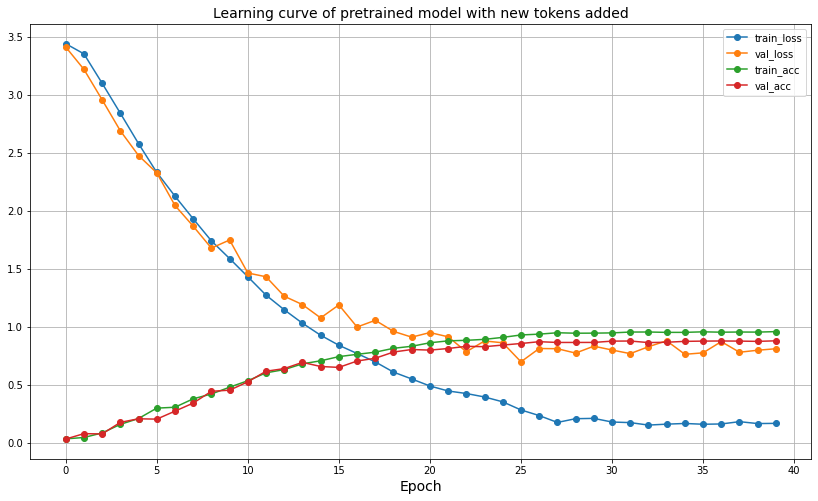

In [ ]:
log = [{'epoch': 0, 'train loss': 3.438868590255282, 'val loss': 3.4102623405910673, 'train accuracy': 0.033582089552238806, 'val accuracy': 0.03216575091575092, 'train f1_score': 0.024893325237922155, 'val f1_score': 0.015684219837180362}, {'epoch': 1, 'train loss': 3.3512717005032213, 'val loss': 3.217776298522949, 'train accuracy': 0.04537313432835821, 'val accuracy': 0.07846840659340659, 'train f1_score': 0.02821883729878701, 'val f1_score': 0.04792664759182616}, {'epoch': 2, 'train loss': 3.0980720733528706, 'val loss': 2.955449354080927, 'train accuracy': 0.08455223880597015, 'val accuracy': 0.07606456043956043, 'train f1_score': 0.057609036021633205, 'val f1_score': 0.04723481497862303}, {'epoch': 3, 'train loss': 2.8394632001421343, 'val loss': 2.6882535332725164, 'train accuracy': 0.15847947761194028, 'val accuracy': 0.17588141025641027, 'train f1_score': 0.12895456820548734, 'val f1_score': 0.1328649413900101}, {'epoch': 4, 'train loss': 2.5775712853047383, 'val loss': 2.4749517554328557, 'train accuracy': 0.20898320895522388, 'val accuracy': 0.20661630036630035, 'train f1_score': 0.18675004643987853, 'val f1_score': 0.16780577785698583}, {'epoch': 5, 'train loss': 2.3297400483444557, 'val loss': 2.325952995391119, 'train accuracy': 0.2984701492537314, 'val accuracy': 0.2036401098901099, 'train f1_score': 0.2723936270203555, 'val f1_score': 0.17222111552468697}, {'epoch': 6, 'train loss': 2.124924254951192, 'val loss': 2.0449206885837374, 'train accuracy': 0.3059981343283582, 'val accuracy': 0.2724358974358974, 'train f1_score': 0.2912863580942762, 'val f1_score': 0.27053866685563116}, {'epoch': 7, 'train loss': 1.9301204272170565, 'val loss': 1.8664486209551494, 'train accuracy': 0.37878731343283584, 'val accuracy': 0.3417467948717949, 'train f1_score': 0.3654689138597721, 'val f1_score': 0.3283641127391127}, {'epoch': 8, 'train loss': 1.7398287182423606, 'val loss': 1.6772229075431824, 'train accuracy': 0.4201585820895522, 'val accuracy': 0.44345238095238093, 'train f1_score': 0.4121012802496012, 'val f1_score': 0.4257704142748785}, {'epoch': 9, 'train loss': 1.587384416096246, 'val loss': 1.7474143320605868, 'train accuracy': 0.47886194029850737, 'val accuracy': 0.453125, 'train f1_score': 0.47789425776855815, 'val f1_score': 0.4277831832519332}, {'epoch': 10, 'train loss': 1.4306973036545425, 'val loss': 1.4629823153927213, 'train accuracy': 0.5344309701492538, 'val accuracy': 0.524896978021978, 'train f1_score': 0.536913488770765, 'val f1_score': 0.5081733701153344}, {'epoch': 11, 'train loss': 1.2722305215116758, 'val loss': 1.4304133362713314, 'train accuracy': 0.6025559701492538, 'val accuracy': 0.6163576007326007, 'train f1_score': 0.5995813631331355, 'val f1_score': 0.6099946618361797}, {'epoch': 12, 'train loss': 1.1460130672846267, 'val loss': 1.2629220599219912, 'train accuracy': 0.6305037313432835, 'val accuracy': 0.6390796703296703, 'train f1_score': 0.6335141308397728, 'val f1_score': 0.6294109205939562}, {'epoch': 13, 'train loss': 1.0301299184115964, 'val loss': 1.190670410792033, 'train accuracy': 0.6802798507462686, 'val accuracy': 0.6928800366300367, 'train f1_score': 0.6843740214232286, 'val f1_score': 0.6944498953427525}, {'epoch': 14, 'train loss': 0.926536733089988, 'val loss': 1.0760587425458998, 'train accuracy': 0.7063339552238806, 'val accuracy': 0.6571085164835165, 'train f1_score': 0.7102388293195196, 'val f1_score': 0.6589807761682762}, {'epoch': 15, 'train loss': 0.8402630168555388, 'val loss': 1.1878080062922978, 'train accuracy': 0.7421828358208955, 'val accuracy': 0.649496336996337, 'train f1_score': 0.7425692918817232, 'val f1_score': 0.6360570821180065}, {'epoch': 16, 'train loss': 0.769110720104246, 'val loss': 0.997478302036013, 'train accuracy': 0.7620708955223882, 'val accuracy': 0.7043269230769231, 'train f1_score': 0.7659593843839069, 'val f1_score': 0.6963347705535207}, {'epoch': 17, 'train loss': 0.6967612311466417, 'val loss': 1.0552040444953101, 'train accuracy': 0.7807276119402986, 'val accuracy': 0.7283653846153846, 'train f1_score': 0.7835538443211018, 'val f1_score': 0.7325366804161446}, {'epoch': 18, 'train loss': 0.6088005039674133, 'val loss': 0.9600090661219188, 'train accuracy': 0.8139365671641791, 'val accuracy': 0.7817078754578753, 'train f1_score': 0.8186600931717536, 'val f1_score': 0.7870169760794761}, {'epoch': 19, 'train loss': 0.5498922005740564, 'val loss': 0.9101118672461737, 'train accuracy': 0.8314272388059701, 'val accuracy': 0.803628663003663, 'train f1_score': 0.8347643304925735, 'val f1_score': 0.8072941484771841}, {'epoch': 20, 'train loss': 0.4892083007786701, 'val loss': 0.9495992869848296, 'train accuracy': 0.8615764925373135, 'val accuracy': 0.7984203296703297, 'train f1_score': 0.8645121521823949, 'val f1_score': 0.8040892762990977}, {'epoch': 21, 'train loss': 0.4462663504614759, 'val loss': 0.9131609726519812, 'train accuracy': 0.8781343283582089, 'val accuracy': 0.8122138278388278, 'train f1_score': 0.8824886468216692, 'val f1_score': 0.8187806819503246}, {'epoch': 22, 'train loss': 0.4243809441799548, 'val loss': 0.7844439833646729, 'train accuracy': 0.8827985074626866, 'val accuracy': 0.831158424908425, 'train f1_score': 0.8869281153712397, 'val f1_score': 0.8325538811282388}, {'epoch': 23, 'train loss': 0.39453268801765656, 'val loss': 0.8772475105665979, 'train accuracy': 0.8910634328358209, 'val accuracy': 0.8278388278388278, 'train f1_score': 0.8962116357160668, 'val f1_score': 0.8297001687232781}, {'epoch': 24, 'train loss': 0.3526703106489644, 'val loss': 0.8615953099159968, 'train accuracy': 0.9081156716417911, 'val accuracy': 0.8419184981684981, 'train f1_score': 0.9116006855395847, 'val f1_score': 0.847415425960594}, {'epoch': 25, 'train loss': 0.2828563516820545, 'val loss': 0.6975473224052361, 'train accuracy': 0.9289085820895522, 'val accuracy': 0.8553685897435896, 'train f1_score': 0.9320066930070222, 'val f1_score': 0.8593059446000622}, {'epoch': 26, 'train loss': 0.23445251820358767, 'val loss': 0.8121493370050475, 'train accuracy': 0.936035447761194, 'val accuracy': 0.8709363553113553, 'train f1_score': 0.9385937109483531, 'val f1_score': 0.8716663017487194}, {'epoch': 27, 'train loss': 0.17516316512404984, 'val loss': 0.8104633358972413, 'train accuracy': 0.9479944029850746, 'val accuracy': 0.86441163003663, 'train f1_score': 0.9508580018806917, 'val f1_score': 0.8645577041136251}, {'epoch': 28, 'train loss': 0.20734526931461114, 'val loss': 0.772751274030833, 'train accuracy': 0.9440298507462687, 'val accuracy': 0.8644688644688644, 'train f1_score': 0.9475086674830145, 'val f1_score': 0.8624998433231099}, {'epoch': 29, 'train loss': 0.2102349557594132, 'val loss': 0.8323645155344691, 'train accuracy': 0.9446641791044775, 'val accuracy': 0.8646405677655677, 'train f1_score': 0.9469294131051471, 'val f1_score': 0.8626947271478522}, {'epoch': 30, 'train loss': 0.17869155840086404, 'val loss': 0.7992507982999086, 'train accuracy': 0.9467630597014924, 'val accuracy': 0.875801282051282, 'train f1_score': 0.9484603699575714, 'val f1_score': 0.8758945151244257}, {'epoch': 31, 'train loss': 0.17370871776965127, 'val loss': 0.7680845760873386, 'train accuracy': 0.9540578358208955, 'val accuracy': 0.8767170329670331, 'train f1_score': 0.9553864124180234, 'val f1_score': 0.8748776066856423}, {'epoch': 32, 'train loss': 0.15234471893688636, 'val loss': 0.8274775608664467, 'train accuracy': 0.954393656716418, 'val accuracy': 0.8633241758241759, 'train f1_score': 0.9583530082948705, 'val f1_score': 0.8618490718937146}, {'epoch': 33, 'train loss': 0.16037355683076737, 'val loss': 0.8786745970802647, 'train accuracy': 0.9512593283582089, 'val accuracy': 0.8663003663003663, 'train f1_score': 0.9532084320361274, 'val f1_score': 0.8654839993009636}, {'epoch': 34, 'train loss': 0.16627609301636467, 'val loss': 0.7622854787678945, 'train accuracy': 0.9512593283582089, 'val accuracy': 0.8737408424908425, 'train f1_score': 0.9549823686367529, 'val f1_score': 0.8729093822843821}, {'epoch': 35, 'train loss': 0.15956150212172251, 'val loss': 0.7748639532143161, 'train accuracy': 0.9560261194029852, 'val accuracy': 0.8759729853479854, 'train f1_score': 0.9580481502846243, 'val f1_score': 0.8748308487147773}, {'epoch': 36, 'train loss': 0.16195784342377934, 'val loss': 0.8717071759913649, 'train accuracy': 0.9527611940298507, 'val accuracy': 0.8771176739926739, 'train f1_score': 0.9554777695356056, 'val f1_score': 0.8738458631315773}, {'epoch': 37, 'train loss': 0.18184272703061352, 'val loss': 0.7800458015075752, 'train accuracy': 0.9542910447761194, 'val accuracy': 0.8759729853479854, 'train f1_score': 0.9560468600011532, 'val f1_score': 0.8766963443302727}, {'epoch': 38, 'train loss': 0.16542880059178197, 'val loss': 0.7973546990681262, 'train accuracy': 0.953526119402985, 'val accuracy': 0.8737408424908425, 'train f1_score': 0.9567438403952891, 'val f1_score': 0.8717137525173237}, {'epoch': 39, 'train loss': 0.16725150843276015, 'val loss': 0.8102664562563101, 'train accuracy': 0.9577238805970147, 'val accuracy': 0.8785485347985348, 'train f1_score': 0.9603768562856029, 'val f1_score': 0.8795818837628592}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

In [ ]:
!python3 main.py -lr 2e-5 -epochs 32 -checkpoint "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2" -d './checkpoints/2020-04-04-pretrained-vncorenlp-have-vocab-added'

[INFO] USE PRETRAINED: ./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2
100% 134/134 [01:05<00:00,  2.03it/s]
epoch: 0              train loss: 3.439             val loss: 3.410             train accuracy: 0.034             val accuracy: 0.032             train f1_score: 0.025             val f1_score: 0.016             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.10it/s]
epoch: 1              train loss: 3.351             val loss: 3.218             train accuracy: 0.045             val accuracy: 0.078             train f1_score: 0.028             val f1_score: 0.048             learning rate: 2e-05

100% 134/134 [01:03<00:00,  2.12it/s]
epoch: 2              train loss: 3.098             val loss: 2.955             train accuracy: 0.085             val accuracy: 0.076             train f1_score: 0.058             val f1_score: 0.047             learning rate: 2e-05

100% 134/134 [01:02<00:00,  2.13it/s]
epoch: 3              train loss: 2.839            

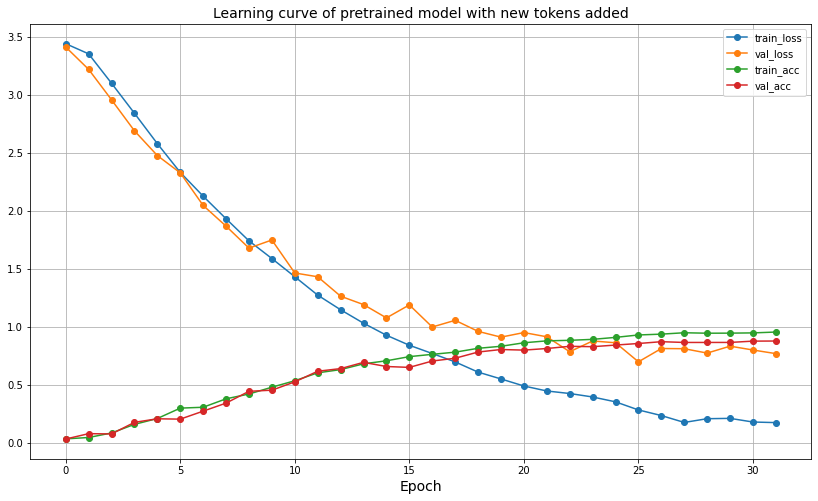

In [ ]:
log = [{'epoch': 0, 'train loss': 3.438868590255282, 'val loss': 3.4102623405910673, 'train accuracy': 0.033582089552238806, 'val accuracy': 0.03216575091575092, 'train f1_score': 0.024893325237922155, 'val f1_score': 0.015684219837180362}, {'epoch': 1, 'train loss': 3.3512717005032213, 'val loss': 3.217776298522949, 'train accuracy': 0.04537313432835821, 'val accuracy': 0.07846840659340659, 'train f1_score': 0.02821883729878701, 'val f1_score': 0.04792664759182616}, {'epoch': 2, 'train loss': 3.0980720733528706, 'val loss': 2.955449354080927, 'train accuracy': 0.08455223880597015, 'val accuracy': 0.07606456043956043, 'train f1_score': 0.057609036021633205, 'val f1_score': 0.04723481497862303}, {'epoch': 3, 'train loss': 2.8394632001421343, 'val loss': 2.6882535332725164, 'train accuracy': 0.15847947761194028, 'val accuracy': 0.17588141025641027, 'train f1_score': 0.12895456820548734, 'val f1_score': 0.1328649413900101}, {'epoch': 4, 'train loss': 2.5775712853047383, 'val loss': 2.4749517554328557, 'train accuracy': 0.20898320895522388, 'val accuracy': 0.20661630036630035, 'train f1_score': 0.18675004643987853, 'val f1_score': 0.16780577785698583}, {'epoch': 5, 'train loss': 2.3297400483444557, 'val loss': 2.325952995391119, 'train accuracy': 0.2984701492537314, 'val accuracy': 0.2036401098901099, 'train f1_score': 0.2723936270203555, 'val f1_score': 0.17222111552468697}, {'epoch': 6, 'train loss': 2.124924254951192, 'val loss': 2.0449206885837374, 'train accuracy': 0.3059981343283582, 'val accuracy': 0.2724358974358974, 'train f1_score': 0.2912863580942762, 'val f1_score': 0.27053866685563116}, {'epoch': 7, 'train loss': 1.9301204272170565, 'val loss': 1.8664486209551494, 'train accuracy': 0.37878731343283584, 'val accuracy': 0.3417467948717949, 'train f1_score': 0.3654689138597721, 'val f1_score': 0.3283641127391127}, {'epoch': 8, 'train loss': 1.7398287182423606, 'val loss': 1.6772229075431824, 'train accuracy': 0.4201585820895522, 'val accuracy': 0.44345238095238093, 'train f1_score': 0.4121012802496012, 'val f1_score': 0.4257704142748785}, {'epoch': 9, 'train loss': 1.587384416096246, 'val loss': 1.7474143320605868, 'train accuracy': 0.47886194029850737, 'val accuracy': 0.453125, 'train f1_score': 0.47789425776855815, 'val f1_score': 0.4277831832519332}, {'epoch': 10, 'train loss': 1.4306973036545425, 'val loss': 1.4629823153927213, 'train accuracy': 0.5344309701492538, 'val accuracy': 0.524896978021978, 'train f1_score': 0.536913488770765, 'val f1_score': 0.5081733701153344}, {'epoch': 11, 'train loss': 1.2722305215116758, 'val loss': 1.4304133362713314, 'train accuracy': 0.6025559701492538, 'val accuracy': 0.6163576007326007, 'train f1_score': 0.5995813631331355, 'val f1_score': 0.6099946618361797}, {'epoch': 12, 'train loss': 1.1460130672846267, 'val loss': 1.2629220599219912, 'train accuracy': 0.6305037313432835, 'val accuracy': 0.6390796703296703, 'train f1_score': 0.6335141308397728, 'val f1_score': 0.6294109205939562}, {'epoch': 13, 'train loss': 1.0301299184115964, 'val loss': 1.190670410792033, 'train accuracy': 0.6802798507462686, 'val accuracy': 0.6928800366300367, 'train f1_score': 0.6843740214232286, 'val f1_score': 0.6944498953427525}, {'epoch': 14, 'train loss': 0.926536733089988, 'val loss': 1.0760587425458998, 'train accuracy': 0.7063339552238806, 'val accuracy': 0.6571085164835165, 'train f1_score': 0.7102388293195196, 'val f1_score': 0.6589807761682762}, {'epoch': 15, 'train loss': 0.8402630168555388, 'val loss': 1.1878080062922978, 'train accuracy': 0.7421828358208955, 'val accuracy': 0.649496336996337, 'train f1_score': 0.7425692918817232, 'val f1_score': 0.6360570821180065}, {'epoch': 16, 'train loss': 0.769110720104246, 'val loss': 0.997478302036013, 'train accuracy': 0.7620708955223882, 'val accuracy': 0.7043269230769231, 'train f1_score': 0.7659593843839069, 'val f1_score': 0.6963347705535207}, {'epoch': 17, 'train loss': 0.6967612311466417, 'val loss': 1.0552040444953101, 'train accuracy': 0.7807276119402986, 'val accuracy': 0.7283653846153846, 'train f1_score': 0.7835538443211018, 'val f1_score': 0.7325366804161446}, {'epoch': 18, 'train loss': 0.6088005039674133, 'val loss': 0.9600090661219188, 'train accuracy': 0.8139365671641791, 'val accuracy': 0.7817078754578753, 'train f1_score': 0.8186600931717536, 'val f1_score': 0.7870169760794761}, {'epoch': 19, 'train loss': 0.5498922005740564, 'val loss': 0.9101118672461737, 'train accuracy': 0.8314272388059701, 'val accuracy': 0.803628663003663, 'train f1_score': 0.8347643304925735, 'val f1_score': 0.8072941484771841}, {'epoch': 20, 'train loss': 0.4892083007786701, 'val loss': 0.9495992869848296, 'train accuracy': 0.8615764925373135, 'val accuracy': 0.7984203296703297, 'train f1_score': 0.8645121521823949, 'val f1_score': 0.8040892762990977}, {'epoch': 21, 'train loss': 0.4462663504614759, 'val loss': 0.9131609726519812, 'train accuracy': 0.8781343283582089, 'val accuracy': 0.8122138278388278, 'train f1_score': 0.8824886468216692, 'val f1_score': 0.8187806819503246}, {'epoch': 22, 'train loss': 0.4243809441799548, 'val loss': 0.7844439833646729, 'train accuracy': 0.8827985074626866, 'val accuracy': 0.831158424908425, 'train f1_score': 0.8869281153712397, 'val f1_score': 0.8325538811282388}, {'epoch': 23, 'train loss': 0.39453268801765656, 'val loss': 0.8772475105665979, 'train accuracy': 0.8910634328358209, 'val accuracy': 0.8278388278388278, 'train f1_score': 0.8962116357160668, 'val f1_score': 0.8297001687232781}, {'epoch': 24, 'train loss': 0.3526703106489644, 'val loss': 0.8615953099159968, 'train accuracy': 0.9081156716417911, 'val accuracy': 0.8419184981684981, 'train f1_score': 0.9116006855395847, 'val f1_score': 0.847415425960594}, {'epoch': 25, 'train loss': 0.2828563516820545, 'val loss': 0.6975473224052361, 'train accuracy': 0.9289085820895522, 'val accuracy': 0.8553685897435896, 'train f1_score': 0.9320066930070222, 'val f1_score': 0.8593059446000622}, {'epoch': 26, 'train loss': 0.23445251820358767, 'val loss': 0.8121493370050475, 'train accuracy': 0.936035447761194, 'val accuracy': 0.8709363553113553, 'train f1_score': 0.9385937109483531, 'val f1_score': 0.8716663017487194}, {'epoch': 27, 'train loss': 0.17516316512404984, 'val loss': 0.8104633358972413, 'train accuracy': 0.9479944029850746, 'val accuracy': 0.86441163003663, 'train f1_score': 0.9508580018806917, 'val f1_score': 0.8645577041136251}, {'epoch': 28, 'train loss': 0.20734526931461114, 'val loss': 0.772751274030833, 'train accuracy': 0.9440298507462687, 'val accuracy': 0.8644688644688644, 'train f1_score': 0.9475086674830145, 'val f1_score': 0.8624998433231099}, {'epoch': 29, 'train loss': 0.2102349557594132, 'val loss': 0.8323645155344691, 'train accuracy': 0.9446641791044775, 'val accuracy': 0.8646405677655677, 'train f1_score': 0.9469294131051471, 'val f1_score': 0.8626947271478522}, {'epoch': 30, 'train loss': 0.17869155840086404, 'val loss': 0.7992507982999086, 'train accuracy': 0.9467630597014924, 'val accuracy': 0.875801282051282, 'train f1_score': 0.9484603699575714, 'val f1_score': 0.8758945151244257}, {'epoch': 31, 'train loss': 0.17370871776965127, 'val loss': 0.7680845760873386, 'train accuracy': 0.9540578358208955, 'val accuracy': 0.8767170329670331, 'train f1_score': 0.9553864124180234, 'val f1_score': 0.8748776066856423}]

show_learning_curve(
    log, title="Learning curve of pretrained model with new tokens added"
)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from vncorenlp import VnCoreNLP
import regex as re
from sklearn.metrics import confusion_matrix
import seaborn as sns

tokenizer = AutoTokenizer.from_pretrained(
    "./language_model_pretrained/2022-04-01-vncorenlp-special-tokens-phase-2/tokenizer"

)

model = AutoModelForSequenceClassification.from_pretrained(
    './checkpoints/2020-04-04-pretrained-vncorenlp-have-vocab-added',
    vocab_size=len(tokenizer)
)

category_classifier = pipeline(
    "text-classification", model=model, tokenizer=tokenizer
)

word_segmenter = VnCoreNLP(
            "./vncorenlp/VnCoreNLP-1.1.1.jar",
            annotators="wseg",
            max_heap_size="-Xmx500m",
        )

In [ ]:


def prettify_text(text: str) -> str:
    # Remove words including both letter(s) and digit(s). Note: DON'T remove words like PO1234
    pattern = r'''(\b(?!PO)[A-Z\p{L}]+[*\d@.,/-]+[\w@]*|[*\d@.,/-]+[A-Z\p{L}]+[\w@]*)'''
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove punctuation
    punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    pattern = f"([{punctuation}])"
    text = re.sub(pattern, " ", text)

    # Remove words with less than 4 digits and redundant spaces
    text = re.sub(r"\b\d{1,4}\b|\s{2,}", " ", text)
    return text.lower().strip()


def preprocess_sent(text):
    text = prettify_text(text)
    if not text:
        text = "unknown item"
    return " ".join(word_segmenter.tokenize(text)[0])


In [ ]:
with open("./dataset/28-3-2022/test_dataset_for_category_cls.json", "r") as f:
    test_dataset = json.loads(f.read())
test_sentences = [each["itemName"] for each in test_dataset]
test_labels = [each["label"] for each in test_dataset]
test_labels = list(
    map(lambda label: model.config.label2id[label], test_labels)
)

In [ ]:
# INFERENCE
pred_labels = list(map(
    lambda sent: category_classifier(preprocess_sent(sent))[0]["label"],
    test_sentences
))

# CONVERT TO LABEL INDEX
pred_labels = list(map(
    lambda label: model.config.label2id[label],
    pred_labels
))

In [ ]:
len(test_sentences), np.sum(
    np.array(pred_labels) == np.array(test_labels)
)

(1071, 388)

In [ ]:
np.sum(
    np.array(pred_labels) == np.array(test_labels)
) / len(test_sentences)

0.3622782446311858

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


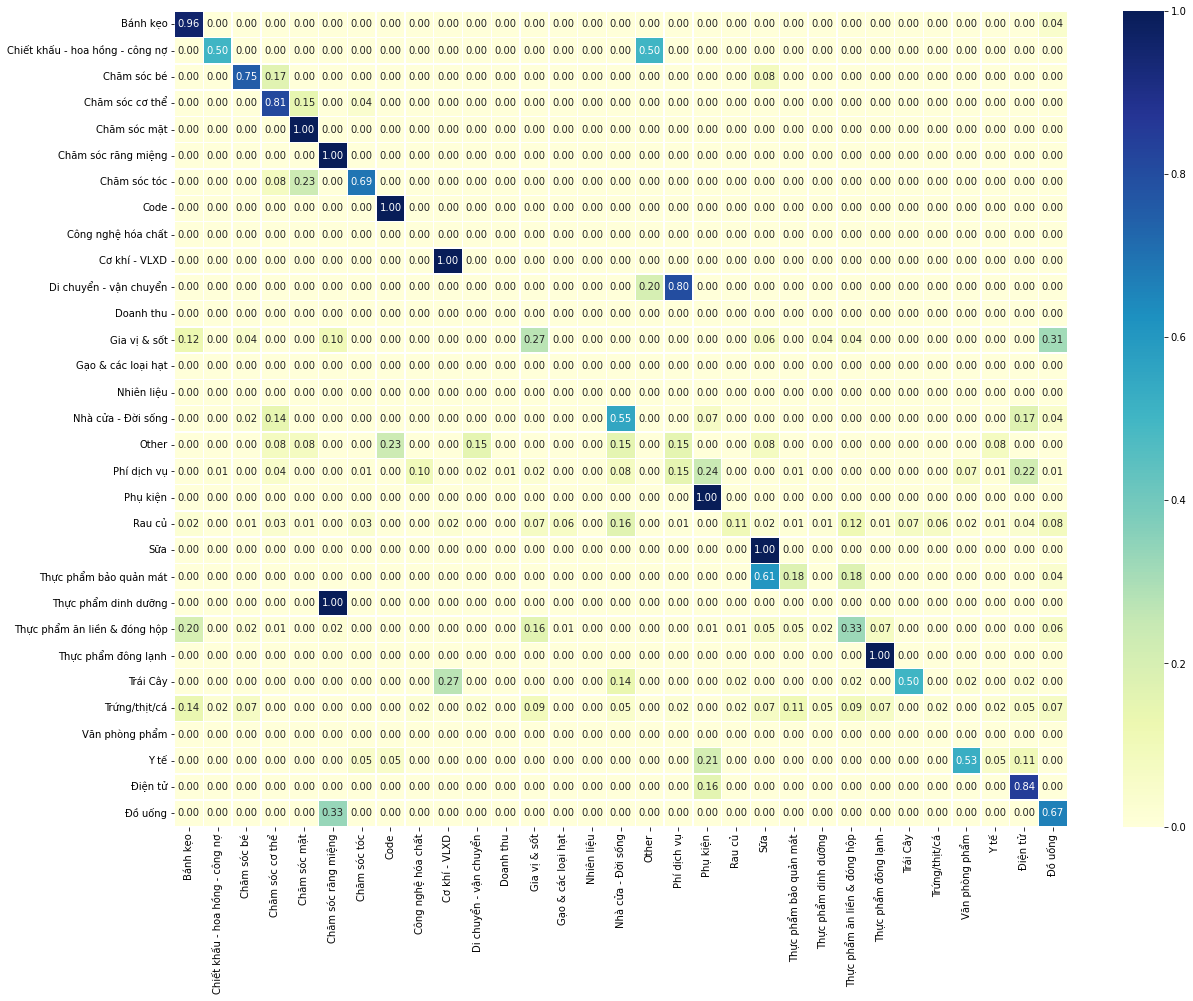

In [ ]:


matrix = confusion_matrix(pred_labels, test_labels)
# Normalise
matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.nan_to_num(matrix)

categories = [each for each in model.config.id2label.values()]
fig, ax = plt.subplots(figsize=(20, 15))
# sns.heatmap(matrix, linewidths=.5, cmap="YlGnBu")
sns.heatmap(matrix, annot=True, fmt='.2f', xticklabels=categories, yticklabels=categories, linewidths=.5, cmap="YlGnBu");



## Lần 3

HAVE PRETRAINED == NO NEW TOKENS ADDED == NO SCHEDULER

In [ ]:
!python3 main.py -lr 3e-5 -epochs 15 -use_pretrained 1 -use_new_tokens 0

     Tokenizer checkpoint: ./tokenizers/original/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: False     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-no-new-tokens
100% 134/134 [01:05<00:00,  2.04it/s]
{'epoch': 0, 'train loss': 3.3979, 'val loss': 3.2252, 'train accuracy': 0.042, 'val accuracy': 0.0991, 'train f1_score': 0.0335, 'val f1_score': 0.0557, 'lr': 3e-05}
100% 134/134 [01:03<00:00,  2.12it/s]
{'epoch': 1, 'train loss': 2.9056, 'val loss': 2.4552, 'train accuracy': 0.2337, 'val accuracy': 0.428, 'train f1_score': 0.2083, 'val f1_score': 0.3972, 'lr': 3e-05}
100% 134/134 [01:02<00:00,  2.14it/s]
{'epoch': 2, 'train loss': 2.2402, 'val loss': 1.8583, 'train accuracy': 0.4561, 'val accuracy': 0.622, 'train f1_score': 0.4399, 'val f1_score': 0.613, 'lr': 3e-05}
100% 134/134 [01:02<00:00,  2.15it/s]
{'epoch': 3, 'train loss': 1.7239, 'val loss': 1.4469, 'train accuracy': 0.6128, 'val ac

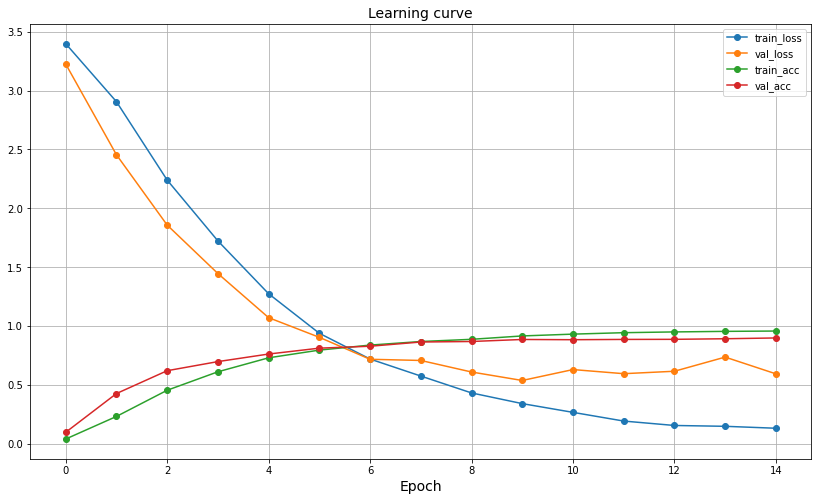

In [ ]:
log = [{'epoch': 0, 'train loss': 3.3979, 'val loss': 3.2252, 'train accuracy': 0.042, 'val accuracy': 0.0991, 'train f1_score': 0.0335, 'val f1_score': 0.0557, 'lr': 3e-05}, {'epoch': 1, 'train loss': 2.9056, 'val loss': 2.4552, 'train accuracy': 0.2337, 'val accuracy': 0.428, 'train f1_score': 0.2083, 'val f1_score': 0.3972, 'lr': 3e-05}, {'epoch': 2, 'train loss': 2.2402, 'val loss': 1.8583, 'train accuracy': 0.4561, 'val accuracy': 0.622, 'train f1_score': 0.4399, 'val f1_score': 0.613, 'lr': 3e-05}, {'epoch': 3, 'train loss': 1.7239, 'val loss': 1.4469, 'train accuracy': 0.6128, 'val accuracy': 0.6993, 'train f1_score': 0.6124, 'val f1_score': 0.7001, 'lr': 3e-05}, {'epoch': 4, 'train loss': 1.2753, 'val loss': 1.0722, 'train accuracy': 0.7315, 'val accuracy': 0.7635, 'train f1_score': 0.7366, 'val f1_score': 0.77, 'lr': 3e-05}, {'epoch': 5, 'train loss': 0.9395, 'val loss': 0.9054, 'train accuracy': 0.7968, 'val accuracy': 0.8134, 'train f1_score': 0.8047, 'val f1_score': 0.8178, 'lr': 3e-05}, {'epoch': 6, 'train loss': 0.721, 'val loss': 0.719, 'train accuracy': 0.8394, 'val accuracy': 0.8297, 'train f1_score': 0.8451, 'val f1_score': 0.8383, 'lr': 3e-05}, {'epoch': 7, 'train loss': 0.5766, 'val loss': 0.709, 'train accuracy': 0.8698, 'val accuracy': 0.8656, 'train f1_score': 0.8762, 'val f1_score': 0.8713, 'lr': 3e-05}, {'epoch': 8, 'train loss': 0.4333, 'val loss': 0.611, 'train accuracy': 0.8885, 'val accuracy': 0.87, 'train f1_score': 0.8953, 'val f1_score': 0.8735, 'lr': 3e-05}, {'epoch': 9, 'train loss': 0.3426, 'val loss': 0.539, 'train accuracy': 0.9171, 'val accuracy': 0.8871, 'train f1_score': 0.9222, 'val f1_score': 0.8897, 'lr': 3e-05}, {'epoch': 10, 'train loss': 0.2684, 'val loss': 0.6316, 'train accuracy': 0.9325, 'val accuracy': 0.8851, 'train f1_score': 0.9349, 'val f1_score': 0.8863, 'lr': 3e-05}, {'epoch': 11, 'train loss': 0.1946, 'val loss': 0.5967, 'train accuracy': 0.9447, 'val accuracy': 0.8875, 'train f1_score': 0.9472, 'val f1_score': 0.8887, 'lr': 3e-05}, {'epoch': 12, 'train loss': 0.1571, 'val loss': 0.6174, 'train accuracy': 0.9512, 'val accuracy': 0.8883, 'train f1_score': 0.9523, 'val f1_score': 0.8841, 'lr': 3e-05}, {'epoch': 13, 'train loss': 0.15, 'val loss': 0.7375, 'train accuracy': 0.9559, 'val accuracy': 0.8933, 'train f1_score': 0.9577, 'val f1_score': 0.8881, 'lr': 3e-05}, {'epoch': 14, 'train loss': 0.1336, 'val loss': 0.5954, 'train accuracy': 0.9587, 'val accuracy': 0.9, 'train f1_score': 0.9604, 'val f1_score': 0.9033, 'lr': 3e-05}]
show_learning_curve(log)

In [ ]:
{'epoch': 9, 'train loss': 0.3426, 'val loss': 0.539, 'train accuracy': 0.9171, 'val accuracy': 0.8871, 'train f1_score': 0.9222, 'val f1_score': 0.8897, 'lr': 3e-05}


HAVE PRETRAINED == HAVE NEW TOKENS ADDED == NO SCHEDULER Lần 1

In [ ]:
!python3 main.py -lr 3e-5 -epochs 15 -use_pretrained 1 -use_new_tokens 1

     Tokenizer checkpoint: ./tokenizers/new-tokens-added/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: True     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-new-tokens
100% 134/134 [01:06<00:00,  2.03it/s]
{'epoch': 0, 'train loss': 3.4433, 'val loss': 3.4224, 'train accuracy': 0.0245, 'val accuracy': 0.029, 'train f1_score': 0.0171, 'val f1_score': 0.0162, 'lr': 3e-05}
100% 134/134 [01:03<00:00,  2.10it/s]
{'epoch': 1, 'train loss': 3.4243, 'val loss': 3.3959, 'train accuracy': 0.0325, 'val accuracy': 0.0414, 'train f1_score': 0.0263, 'val f1_score': 0.0177, 'lr': 3e-05}
100% 134/134 [01:03<00:00,  2.11it/s]
{'epoch': 2, 'train loss': 3.3149, 'val loss': 3.1906, 'train accuracy': 0.0629, 'val accuracy': 0.0575, 'train f1_score': 0.0525, 'val f1_score': 0.0377, 'lr': 3e-05}
100% 134/134 [01:03<00:00,  2.12it/s]
{'epoch': 3, 'train loss': 3.0651, 'val loss': 2.837, 'train accuracy': 0.1121, '

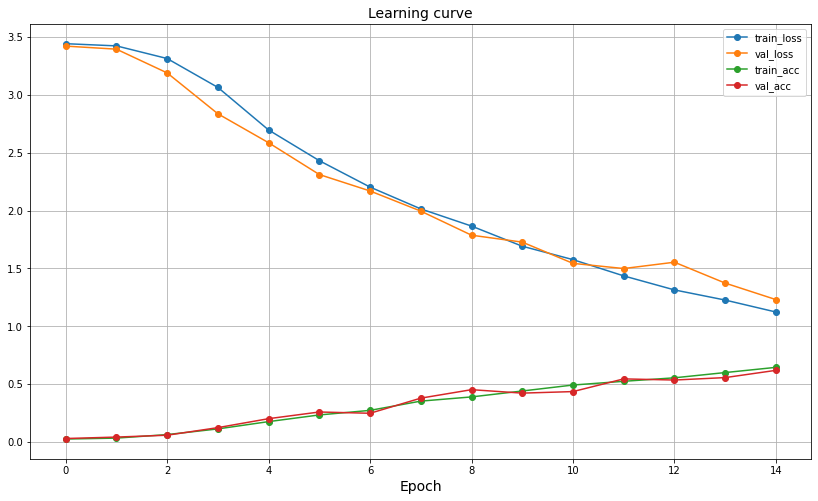

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4433, 'val loss': 3.4224, 'train accuracy': 0.0245, 'val accuracy': 0.029, 'train f1_score': 0.0171, 'val f1_score': 0.0162, 'lr': 3e-05}, {'epoch': 1, 'train loss': 3.4243, 'val loss': 3.3959, 'train accuracy': 0.0325, 'val accuracy': 0.0414, 'train f1_score': 0.0263, 'val f1_score': 0.0177, 'lr': 3e-05}, {'epoch': 2, 'train loss': 3.3149, 'val loss': 3.1906, 'train accuracy': 0.0629, 'val accuracy': 0.0575, 'train f1_score': 0.0525, 'val f1_score': 0.0377, 'lr': 3e-05}, {'epoch': 3, 'train loss': 3.0651, 'val loss': 2.837, 'train accuracy': 0.1121, 'val accuracy': 0.1231, 'train f1_score': 0.0829, 'val f1_score': 0.0814, 'lr': 3e-05}, {'epoch': 4, 'train loss': 2.6969, 'val loss': 2.5866, 'train accuracy': 0.1751, 'val accuracy': 0.2006, 'train f1_score': 0.1451, 'val f1_score': 0.1475, 'lr': 3e-05}, {'epoch': 5, 'train loss': 2.4315, 'val loss': 2.3117, 'train accuracy': 0.2329, 'val accuracy': 0.2583, 'train f1_score': 0.2144, 'val f1_score': 0.213, 'lr': 3e-05}, {'epoch': 6, 'train loss': 2.2032, 'val loss': 2.1696, 'train accuracy': 0.2724, 'val accuracy': 0.2473, 'train f1_score': 0.244, 'val f1_score': 0.2205, 'lr': 3e-05}, {'epoch': 7, 'train loss': 2.0145, 'val loss': 1.9954, 'train accuracy': 0.3524, 'val accuracy': 0.3781, 'train f1_score': 0.3386, 'val f1_score': 0.3541, 'lr': 3e-05}, {'epoch': 8, 'train loss': 1.8661, 'val loss': 1.7872, 'train accuracy': 0.3887, 'val accuracy': 0.4513, 'train f1_score': 0.373, 'val f1_score': 0.4321, 'lr': 3e-05}, {'epoch': 9, 'train loss': 1.6919, 'val loss': 1.7273, 'train accuracy': 0.4399, 'val accuracy': 0.4215, 'train f1_score': 0.4237, 'val f1_score': 0.4051, 'lr': 3e-05}, {'epoch': 10, 'train loss': 1.5759, 'val loss': 1.5436, 'train accuracy': 0.4915, 'val accuracy': 0.4348, 'train f1_score': 0.4834, 'val f1_score': 0.41, 'lr': 3e-05}, {'epoch': 11, 'train loss': 1.4353, 'val loss': 1.4989, 'train accuracy': 0.5237, 'val accuracy': 0.5446, 'train f1_score': 0.5145, 'val f1_score': 0.5361, 'lr': 3e-05}, {'epoch': 12, 'train loss': 1.314, 'val loss': 1.5536, 'train accuracy': 0.554, 'val accuracy': 0.5347, 'train f1_score': 0.5512, 'val f1_score': 0.5225, 'lr': 3e-05}, {'epoch': 13, 'train loss': 1.2263, 'val loss': 1.373, 'train accuracy': 0.5993, 'val accuracy': 0.5558, 'train f1_score': 0.5953, 'val f1_score': 0.5577, 'lr': 3e-05}, {'epoch': 14, 'train loss': 1.1229, 'val loss': 1.2304, 'train accuracy': 0.6443, 'val accuracy': 0.6185, 'train f1_score': 0.642, 'val f1_score': 0.6162, 'lr': 3e-05}]
show_learning_curve(log)

HAVE PRETRAINED == HAVE NEW TOKENS ADDED == NO SCHEDULER Lần 2

In [ ]:
!python3 main.py -lr 3e-5 -epochs 25 -use_pretrained 1 -use_new_tokens 1

     Tokenizer checkpoint: ./tokenizers/new-tokens-added/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: True     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-new-tokens
100% 134/134 [01:06<00:00,  2.02it/s]
{'epoch': 0, 'train loss': 3.4433, 'val loss': 3.4224, 'train accuracy': 0.0245, 'val accuracy': 0.029, 'train f1_score': 0.0171, 'val f1_score': 0.0162, 'lr': 3e-05}
100% 134/134 [01:04<00:00,  2.09it/s]
{'epoch': 1, 'train loss': 3.4243, 'val loss': 3.3959, 'train accuracy': 0.0325, 'val accuracy': 0.0414, 'train f1_score': 0.0263, 'val f1_score': 0.0177, 'lr': 3e-05}
100% 134/134 [01:03<00:00,  2.10it/s]
{'epoch': 2, 'train loss': 3.3149, 'val loss': 3.1906, 'train accuracy': 0.0629, 'val accuracy': 0.0575, 'train f1_score': 0.0525, 'val f1_score': 0.0377, 'lr': 3e-05}
100% 134/134 [01:03<00:00,  2.11it/s]
{'epoch': 3, 'train loss': 3.0651, 'val loss': 2.837, 'train accuracy': 0.1121, '

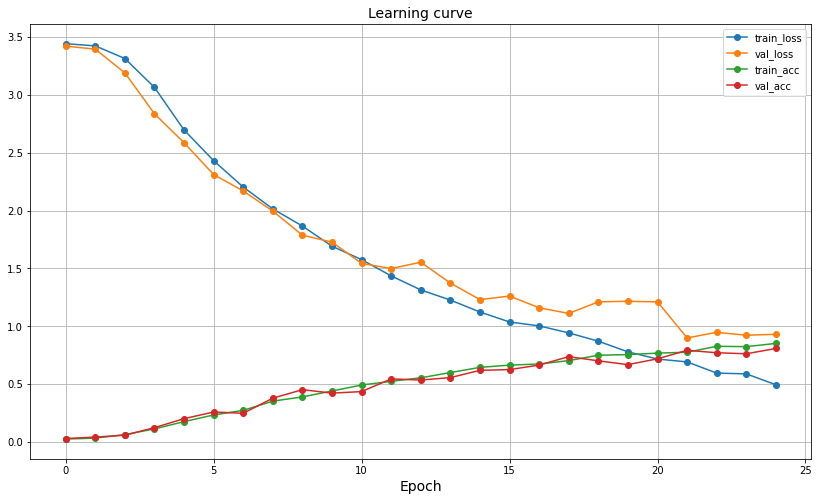

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4433, 'val loss': 3.4224, 'train accuracy': 0.0245, 'val accuracy': 0.029, 'train f1_score': 0.0171, 'val f1_score': 0.0162, 'lr': 3e-05}, {'epoch': 1, 'train loss': 3.4243, 'val loss': 3.3959, 'train accuracy': 0.0325, 'val accuracy': 0.0414, 'train f1_score': 0.0263, 'val f1_score': 0.0177, 'lr': 3e-05}, {'epoch': 2, 'train loss': 3.3149, 'val loss': 3.1906, 'train accuracy': 0.0629, 'val accuracy': 0.0575, 'train f1_score': 0.0525, 'val f1_score': 0.0377, 'lr': 3e-05}, {'epoch': 3, 'train loss': 3.0651, 'val loss': 2.837, 'train accuracy': 0.1121, 'val accuracy': 0.1231, 'train f1_score': 0.0829, 'val f1_score': 0.0814, 'lr': 3e-05}, {'epoch': 4, 'train loss': 2.6969, 'val loss': 2.5866, 'train accuracy': 0.1751, 'val accuracy': 0.2006, 'train f1_score': 0.1451, 'val f1_score': 0.1475, 'lr': 3e-05}, {'epoch': 5, 'train loss': 2.4315, 'val loss': 2.3117, 'train accuracy': 0.2329, 'val accuracy': 0.2583, 'train f1_score': 0.2144, 'val f1_score': 0.213, 'lr': 3e-05}, {'epoch': 6, 'train loss': 2.2032, 'val loss': 2.1696, 'train accuracy': 0.2724, 'val accuracy': 0.2473, 'train f1_score': 0.244, 'val f1_score': 0.2205, 'lr': 3e-05}, {'epoch': 7, 'train loss': 2.0145, 'val loss': 1.9954, 'train accuracy': 0.3524, 'val accuracy': 0.3781, 'train f1_score': 0.3386, 'val f1_score': 0.3541, 'lr': 3e-05}, {'epoch': 8, 'train loss': 1.8661, 'val loss': 1.7872, 'train accuracy': 0.3887, 'val accuracy': 0.4513, 'train f1_score': 0.373, 'val f1_score': 0.4321, 'lr': 3e-05}, {'epoch': 9, 'train loss': 1.6919, 'val loss': 1.7273, 'train accuracy': 0.4399, 'val accuracy': 0.4215, 'train f1_score': 0.4237, 'val f1_score': 0.4051, 'lr': 3e-05}, {'epoch': 10, 'train loss': 1.5759, 'val loss': 1.5436, 'train accuracy': 0.4915, 'val accuracy': 0.4348, 'train f1_score': 0.4834, 'val f1_score': 0.41, 'lr': 3e-05}, {'epoch': 11, 'train loss': 1.4353, 'val loss': 1.4989, 'train accuracy': 0.5237, 'val accuracy': 0.5446, 'train f1_score': 0.5145, 'val f1_score': 0.5361, 'lr': 3e-05}, {'epoch': 12, 'train loss': 1.314, 'val loss': 1.5536, 'train accuracy': 0.554, 'val accuracy': 0.5347, 'train f1_score': 0.5512, 'val f1_score': 0.5225, 'lr': 3e-05}, {'epoch': 13, 'train loss': 1.2263, 'val loss': 1.373, 'train accuracy': 0.5993, 'val accuracy': 0.5558, 'train f1_score': 0.5953, 'val f1_score': 0.5577, 'lr': 3e-05}, {'epoch': 14, 'train loss': 1.1229, 'val loss': 1.2304, 'train accuracy': 0.6443, 'val accuracy': 0.6185, 'train f1_score': 0.642, 'val f1_score': 0.6162, 'lr': 3e-05}, {'epoch': 15, 'train loss': 1.0367, 'val loss': 1.2608, 'train accuracy': 0.6636, 'val accuracy': 0.6251, 'train f1_score': 0.6629, 'val f1_score': 0.6144, 'lr': 3e-05}, {'epoch': 16, 'train loss': 1.0029, 'val loss': 1.1594, 'train accuracy': 0.6735, 'val accuracy': 0.6639, 'train f1_score': 0.6688, 'val f1_score': 0.6701, 'lr': 3e-05}, {'epoch': 17, 'train loss': 0.9423, 'val loss': 1.1109, 'train accuracy': 0.7025, 'val accuracy': 0.7369, 'train f1_score': 0.7005, 'val f1_score': 0.7293, 'lr': 3e-05}, {'epoch': 18, 'train loss': 0.8705, 'val loss': 1.2109, 'train accuracy': 0.7492, 'val accuracy': 0.7008, 'train f1_score': 0.745, 'val f1_score': 0.6926, 'lr': 3e-05}, {'epoch': 19, 'train loss': 0.7784, 'val loss': 1.2158, 'train accuracy': 0.7546, 'val accuracy': 0.6678, 'train f1_score': 0.7529, 'val f1_score': 0.6532, 'lr': 3e-05}, {'epoch': 20, 'train loss': 0.7162, 'val loss': 1.2106, 'train accuracy': 0.7675, 'val accuracy': 0.7183, 'train f1_score': 0.7643, 'val f1_score': 0.7035, 'lr': 3e-05}, {'epoch': 21, 'train loss': 0.6914, 'val loss': 0.8988, 'train accuracy': 0.775, 'val accuracy': 0.7917, 'train f1_score': 0.7722, 'val f1_score': 0.7968, 'lr': 3e-05}, {'epoch': 22, 'train loss': 0.5947, 'val loss': 0.9473, 'train accuracy': 0.8264, 'val accuracy': 0.7707, 'train f1_score': 0.8272, 'val f1_score': 0.7702, 'lr': 3e-05}, {'epoch': 23, 'train loss': 0.588, 'val loss': 0.9219, 'train accuracy': 0.8234, 'val accuracy': 0.7618, 'train f1_score': 0.8245, 'val f1_score': 0.7616, 'lr': 3e-05}, {'epoch': 24, 'train loss': 0.4941, 'val loss': 0.9302, 'train accuracy': 0.8514, 'val accuracy': 0.8076, 'train f1_score': 0.8519, 'val f1_score': 0.8074, 'lr': 3e-05}]

show_learning_curve(log)

In [ ]:
{'epoch': 24, 'train loss': 0.4941, 'val loss': 0.9302, 'train accuracy': 0.8514, 'val accuracy': 0.8076, 'train f1_score': 0.8519, 'val f1_score': 0.8074, 'lr': 3e-05}


HAVE PRETRAINED == HAVE NEW TOKENS ADDED == NO SCHEDULER Lần 3

In [ ]:
!python3 main.py -lr 1e-5 -epochs 15 -use_pretrained 1 -use_new_tokens 1

     Tokenizer checkpoint: ./tokenizers/new-tokens-added/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: True     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-new-tokens
100% 134/134 [01:06<00:00,  2.02it/s]
{'epoch': 0, 'train loss': 3.4206, 'val loss': 3.4194, 'train accuracy': 0.0362, 'val accuracy': 0.0253, 'train f1_score': 0.0305, 'val f1_score': 0.0235, 'lr': 1e-05}
100% 134/134 [01:04<00:00,  2.09it/s]
{'epoch': 1, 'train loss': 3.4164, 'val loss': 3.3718, 'train accuracy': 0.0377, 'val accuracy': 0.0777, 'train f1_score': 0.0332, 'val f1_score': 0.0678, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.10it/s]
{'epoch': 2, 'train loss': 3.3672, 'val loss': 3.3179, 'train accuracy': 0.083, 'val accuracy': 0.1462, 'train f1_score': 0.0783, 'val f1_score': 0.1294, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.11it/s]
{'epoch': 3, 'train loss': 3.2908, 'val loss': 3.1956, 'train accuracy': 0.1428, 

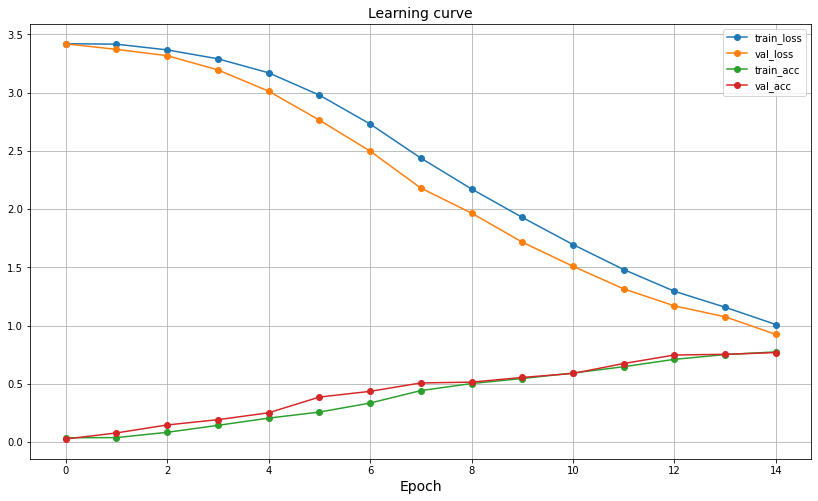

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4206, 'val loss': 3.4194, 'train accuracy': 0.0362, 'val accuracy': 0.0253, 'train f1_score': 0.0305, 'val f1_score': 0.0235, 'lr': 1e-05}, {'epoch': 1, 'train loss': 3.4164, 'val loss': 3.3718, 'train accuracy': 0.0377, 'val accuracy': 0.0777, 'train f1_score': 0.0332, 'val f1_score': 0.0678, 'lr': 1e-05}, {'epoch': 2, 'train loss': 3.3672, 'val loss': 3.3179, 'train accuracy': 0.083, 'val accuracy': 0.1462, 'train f1_score': 0.0783, 'val f1_score': 0.1294, 'lr': 1e-05}, {'epoch': 3, 'train loss': 3.2908, 'val loss': 3.1956, 'train accuracy': 0.1428, 'val accuracy': 0.1915, 'train f1_score': 0.1236, 'val f1_score': 0.1654, 'lr': 1e-05}, {'epoch': 4, 'train loss': 3.1704, 'val loss': 3.0128, 'train accuracy': 0.205, 'val accuracy': 0.2506, 'train f1_score': 0.1845, 'val f1_score': 0.2263, 'lr': 1e-05}, {'epoch': 5, 'train loss': 2.9791, 'val loss': 2.7643, 'train accuracy': 0.2567, 'val accuracy': 0.3858, 'train f1_score': 0.2378, 'val f1_score': 0.3686, 'lr': 1e-05}, {'epoch': 6, 'train loss': 2.7312, 'val loss': 2.4983, 'train accuracy': 0.3344, 'val accuracy': 0.4348, 'train f1_score': 0.3167, 'val f1_score': 0.417, 'lr': 1e-05}, {'epoch': 7, 'train loss': 2.4383, 'val loss': 2.1806, 'train accuracy': 0.4412, 'val accuracy': 0.507, 'train f1_score': 0.4314, 'val f1_score': 0.5002, 'lr': 1e-05}, {'epoch': 8, 'train loss': 2.1731, 'val loss': 1.9657, 'train accuracy': 0.5018, 'val accuracy': 0.5139, 'train f1_score': 0.497, 'val f1_score': 0.5035, 'lr': 1e-05}, {'epoch': 9, 'train loss': 1.9287, 'val loss': 1.7163, 'train accuracy': 0.545, 'val accuracy': 0.5541, 'train f1_score': 0.5387, 'val f1_score': 0.5456, 'lr': 1e-05}, {'epoch': 10, 'train loss': 1.6956, 'val loss': 1.5088, 'train accuracy': 0.5922, 'val accuracy': 0.5887, 'train f1_score': 0.5944, 'val f1_score': 0.5795, 'lr': 1e-05}, {'epoch': 11, 'train loss': 1.481, 'val loss': 1.3152, 'train accuracy': 0.6462, 'val accuracy': 0.6738, 'train f1_score': 0.6506, 'val f1_score': 0.6859, 'lr': 1e-05}, {'epoch': 12, 'train loss': 1.2941, 'val loss': 1.1688, 'train accuracy': 0.7099, 'val accuracy': 0.7469, 'train f1_score': 0.717, 'val f1_score': 0.753, 'lr': 1e-05}, {'epoch': 13, 'train loss': 1.157, 'val loss': 1.0751, 'train accuracy': 0.7505, 'val accuracy': 0.753, 'train f1_score': 0.7606, 'val f1_score': 0.7611, 'lr': 1e-05}, {'epoch': 14, 'train loss': 1.0087, 'val loss': 0.9235, 'train accuracy': 0.7739, 'val accuracy': 0.7678, 'train f1_score': 0.7823, 'val f1_score': 0.7769, 'lr': 1e-05}]

show_learning_curve(log)

In [ ]:
!python3 main.py -lr 1e-5 -epochs 30 -use_pretrained 1 -use_new_tokens 1

     Tokenizer checkpoint: ./tokenizers/new-tokens-added/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: True     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-new-tokens
100% 134/134 [01:06<00:00,  2.02it/s]
{'epoch': 0, 'train loss': 3.4206, 'val loss': 3.4194, 'train accuracy': 0.0362, 'val accuracy': 0.0253, 'train f1_score': 0.0305, 'val f1_score': 0.0235, 'lr': 1e-05}
100% 134/134 [01:04<00:00,  2.08it/s]
{'epoch': 1, 'train loss': 3.4164, 'val loss': 3.3718, 'train accuracy': 0.0377, 'val accuracy': 0.0777, 'train f1_score': 0.0332, 'val f1_score': 0.0678, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.10it/s]
{'epoch': 2, 'train loss': 3.3672, 'val loss': 3.3179, 'train accuracy': 0.083, 'val accuracy': 0.1462, 'train f1_score': 0.0783, 'val f1_score': 0.1294, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.11it/s]
{'epoch': 3, 'train loss': 3.2908, 'val loss': 3.1956, 'train accuracy': 0.1428, 

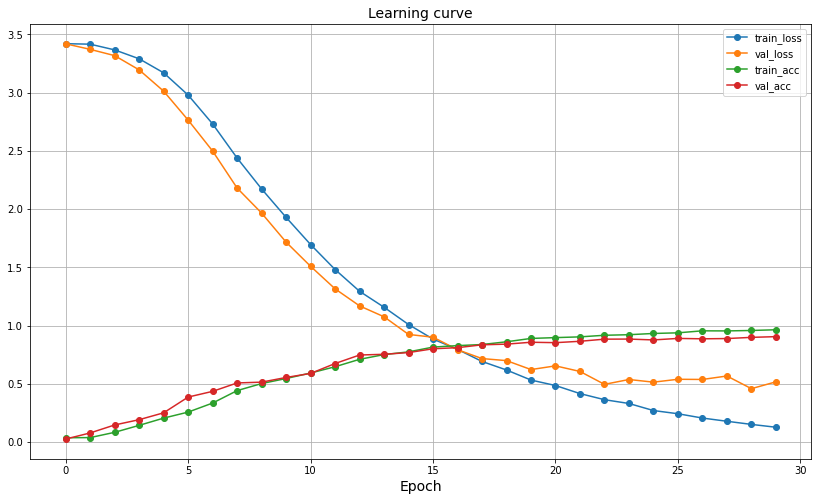

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4206, 'val loss': 3.4194, 'train accuracy': 0.0362, 'val accuracy': 0.0253, 'train f1_score': 0.0305, 'val f1_score': 0.0235, 'lr': 1e-05}, {'epoch': 1, 'train loss': 3.4164, 'val loss': 3.3718, 'train accuracy': 0.0377, 'val accuracy': 0.0777, 'train f1_score': 0.0332, 'val f1_score': 0.0678, 'lr': 1e-05}, {'epoch': 2, 'train loss': 3.3672, 'val loss': 3.3179, 'train accuracy': 0.083, 'val accuracy': 0.1462, 'train f1_score': 0.0783, 'val f1_score': 0.1294, 'lr': 1e-05}, {'epoch': 3, 'train loss': 3.2908, 'val loss': 3.1956, 'train accuracy': 0.1428, 'val accuracy': 0.1915, 'train f1_score': 0.1236, 'val f1_score': 0.1654, 'lr': 1e-05}, {'epoch': 4, 'train loss': 3.1704, 'val loss': 3.0128, 'train accuracy': 0.205, 'val accuracy': 0.2506, 'train f1_score': 0.1845, 'val f1_score': 0.2263, 'lr': 1e-05}, {'epoch': 5, 'train loss': 2.9791, 'val loss': 2.7643, 'train accuracy': 0.2567, 'val accuracy': 0.3858, 'train f1_score': 0.2378, 'val f1_score': 0.3686, 'lr': 1e-05}, {'epoch': 6, 'train loss': 2.7312, 'val loss': 2.4983, 'train accuracy': 0.3344, 'val accuracy': 0.4348, 'train f1_score': 0.3167, 'val f1_score': 0.417, 'lr': 1e-05}, {'epoch': 7, 'train loss': 2.4383, 'val loss': 2.1806, 'train accuracy': 0.4412, 'val accuracy': 0.507, 'train f1_score': 0.4314, 'val f1_score': 0.5002, 'lr': 1e-05}, {'epoch': 8, 'train loss': 2.1731, 'val loss': 1.9657, 'train accuracy': 0.5018, 'val accuracy': 0.5139, 'train f1_score': 0.497, 'val f1_score': 0.5035, 'lr': 1e-05}, {'epoch': 9, 'train loss': 1.9287, 'val loss': 1.7163, 'train accuracy': 0.545, 'val accuracy': 0.5541, 'train f1_score': 0.5387, 'val f1_score': 0.5456, 'lr': 1e-05}, {'epoch': 10, 'train loss': 1.6956, 'val loss': 1.5088, 'train accuracy': 0.5922, 'val accuracy': 0.5887, 'train f1_score': 0.5944, 'val f1_score': 0.5795, 'lr': 1e-05}, {'epoch': 11, 'train loss': 1.481, 'val loss': 1.3152, 'train accuracy': 0.6462, 'val accuracy': 0.6738, 'train f1_score': 0.6506, 'val f1_score': 0.6859, 'lr': 1e-05}, {'epoch': 12, 'train loss': 1.2941, 'val loss': 1.1688, 'train accuracy': 0.7099, 'val accuracy': 0.7469, 'train f1_score': 0.717, 'val f1_score': 0.753, 'lr': 1e-05}, {'epoch': 13, 'train loss': 1.157, 'val loss': 1.0751, 'train accuracy': 0.7505, 'val accuracy': 0.753, 'train f1_score': 0.7606, 'val f1_score': 0.7611, 'lr': 1e-05}, {'epoch': 14, 'train loss': 1.0087, 'val loss': 0.9235, 'train accuracy': 0.7739, 'val accuracy': 0.7678, 'train f1_score': 0.7823, 'val f1_score': 0.7769, 'lr': 1e-05}, {'epoch': 15, 'train loss': 0.8837, 'val loss': 0.8999, 'train accuracy': 0.8149, 'val accuracy': 0.8005, 'train f1_score': 0.8237, 'val f1_score': 0.8038, 'lr': 1e-05}, {'epoch': 16, 'train loss': 0.7954, 'val loss': 0.7922, 'train accuracy': 0.8275, 'val accuracy': 0.8099, 'train f1_score': 0.8344, 'val f1_score': 0.8164, 'lr': 1e-05}, {'epoch': 17, 'train loss': 0.6915, 'val loss': 0.7163, 'train accuracy': 0.8369, 'val accuracy': 0.8345, 'train f1_score': 0.8448, 'val f1_score': 0.843, 'lr': 1e-05}, {'epoch': 18, 'train loss': 0.6182, 'val loss': 0.6987, 'train accuracy': 0.8605, 'val accuracy': 0.8403, 'train f1_score': 0.8671, 'val f1_score': 0.8472, 'lr': 1e-05}, {'epoch': 19, 'train loss': 0.5318, 'val loss': 0.6219, 'train accuracy': 0.8893, 'val accuracy': 0.8565, 'train f1_score': 0.8948, 'val f1_score': 0.8608, 'lr': 1e-05}, {'epoch': 20, 'train loss': 0.4849, 'val loss': 0.6537, 'train accuracy': 0.8963, 'val accuracy': 0.8529, 'train f1_score': 0.9025, 'val f1_score': 0.8654, 'lr': 1e-05}, {'epoch': 21, 'train loss': 0.4156, 'val loss': 0.6057, 'train accuracy': 0.9027, 'val accuracy': 0.8648, 'train f1_score': 0.9076, 'val f1_score': 0.8716, 'lr': 1e-05}, {'epoch': 22, 'train loss': 0.3632, 'val loss': 0.4949, 'train accuracy': 0.9164, 'val accuracy': 0.883, 'train f1_score': 0.9219, 'val f1_score': 0.8887, 'lr': 1e-05}, {'epoch': 23, 'train loss': 0.3306, 'val loss': 0.5365, 'train accuracy': 0.9213, 'val accuracy': 0.8838, 'train f1_score': 0.9249, 'val f1_score': 0.8943, 'lr': 1e-05}, {'epoch': 24, 'train loss': 0.27, 'val loss': 0.5138, 'train accuracy': 0.9319, 'val accuracy': 0.8764, 'train f1_score': 0.936, 'val f1_score': 0.8783, 'lr': 1e-05}, {'epoch': 25, 'train loss': 0.2425, 'val loss': 0.5385, 'train accuracy': 0.9374, 'val accuracy': 0.8894, 'train f1_score': 0.9418, 'val f1_score': 0.8917, 'lr': 1e-05}, {'epoch': 26, 'train loss': 0.2055, 'val loss': 0.5369, 'train accuracy': 0.9546, 'val accuracy': 0.886, 'train f1_score': 0.9573, 'val f1_score': 0.8914, 'lr': 1e-05}, {'epoch': 27, 'train loss': 0.1779, 'val loss': 0.5666, 'train accuracy': 0.9538, 'val accuracy': 0.8882, 'train f1_score': 0.9559, 'val f1_score': 0.8878, 'lr': 1e-05}, {'epoch': 28, 'train loss': 0.151, 'val loss': 0.458, 'train accuracy': 0.9576, 'val accuracy': 0.8985, 'train f1_score': 0.9603, 'val f1_score': 0.8982, 'lr': 1e-05}, {'epoch': 29, 'train loss': 0.1266, 'val loss': 0.5163, 'train accuracy': 0.9638, 'val accuracy': 0.9046, 'train f1_score': 0.9665, 'val f1_score': 0.9092, 'lr': 1e-05}]

show_learning_curve(log)

In [ ]:
!python3 main.py -lr 1e-5 -epochs 23 -use_pretrained 1 -use_new_tokens 1

     Tokenizer checkpoint: ./tokenizers/new-tokens-added/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: True     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-new-tokens
100% 134/134 [01:06<00:00,  2.03it/s]
{'epoch': 0, 'train loss': 3.4206, 'val loss': 3.4194, 'train accuracy': 0.0362, 'val accuracy': 0.0253, 'train f1_score': 0.0305, 'val f1_score': 0.0235, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.10it/s]
{'epoch': 1, 'train loss': 3.4164, 'val loss': 3.3718, 'train accuracy': 0.0377, 'val accuracy': 0.0777, 'train f1_score': 0.0332, 'val f1_score': 0.0678, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.12it/s]
{'epoch': 2, 'train loss': 3.3672, 'val loss': 3.3179, 'train accuracy': 0.083, 'val accuracy': 0.1462, 'train f1_score': 0.0783, 'val f1_score': 0.1294, 'lr': 1e-05}
100% 134/134 [01:03<00:00,  2.13it/s]
{'epoch': 3, 'train loss': 3.2908, 'val loss': 3.1956, 'train accuracy': 0.1428, 

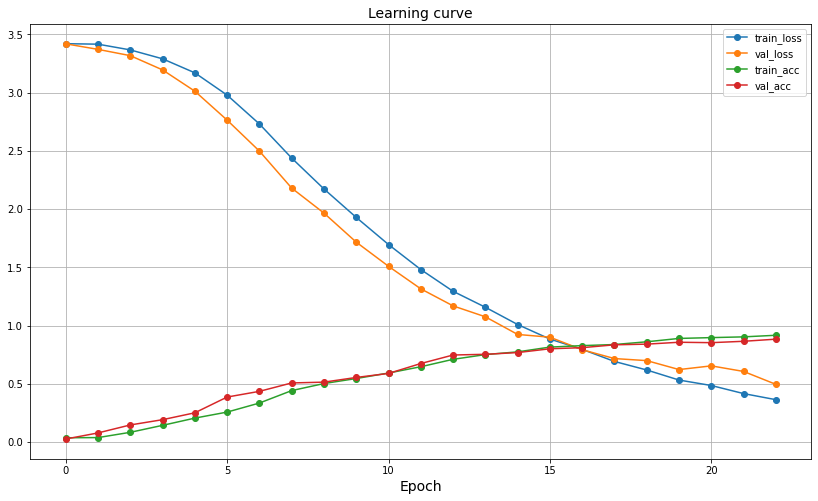

In [ ]:
log = [{'epoch': 0, 'train loss': 3.4206, 'val loss': 3.4194, 'train accuracy': 0.0362, 'val accuracy': 0.0253, 'train f1_score': 0.0305, 'val f1_score': 0.0235, 'lr': 1e-05}, {'epoch': 1, 'train loss': 3.4164, 'val loss': 3.3718, 'train accuracy': 0.0377, 'val accuracy': 0.0777, 'train f1_score': 0.0332, 'val f1_score': 0.0678, 'lr': 1e-05}, {'epoch': 2, 'train loss': 3.3672, 'val loss': 3.3179, 'train accuracy': 0.083, 'val accuracy': 0.1462, 'train f1_score': 0.0783, 'val f1_score': 0.1294, 'lr': 1e-05}, {'epoch': 3, 'train loss': 3.2908, 'val loss': 3.1956, 'train accuracy': 0.1428, 'val accuracy': 0.1915, 'train f1_score': 0.1236, 'val f1_score': 0.1654, 'lr': 1e-05}, {'epoch': 4, 'train loss': 3.1704, 'val loss': 3.0128, 'train accuracy': 0.205, 'val accuracy': 0.2506, 'train f1_score': 0.1845, 'val f1_score': 0.2263, 'lr': 1e-05}, {'epoch': 5, 'train loss': 2.9791, 'val loss': 2.7643, 'train accuracy': 0.2567, 'val accuracy': 0.3858, 'train f1_score': 0.2378, 'val f1_score': 0.3686, 'lr': 1e-05}, {'epoch': 6, 'train loss': 2.7312, 'val loss': 2.4983, 'train accuracy': 0.3344, 'val accuracy': 0.4348, 'train f1_score': 0.3167, 'val f1_score': 0.417, 'lr': 1e-05}, {'epoch': 7, 'train loss': 2.4383, 'val loss': 2.1806, 'train accuracy': 0.4412, 'val accuracy': 0.507, 'train f1_score': 0.4314, 'val f1_score': 0.5002, 'lr': 1e-05}, {'epoch': 8, 'train loss': 2.1731, 'val loss': 1.9657, 'train accuracy': 0.5018, 'val accuracy': 0.5139, 'train f1_score': 0.497, 'val f1_score': 0.5035, 'lr': 1e-05}, {'epoch': 9, 'train loss': 1.9287, 'val loss': 1.7163, 'train accuracy': 0.545, 'val accuracy': 0.5541, 'train f1_score': 0.5387, 'val f1_score': 0.5456, 'lr': 1e-05}, {'epoch': 10, 'train loss': 1.6956, 'val loss': 1.5088, 'train accuracy': 0.5922, 'val accuracy': 0.5887, 'train f1_score': 0.5944, 'val f1_score': 0.5795, 'lr': 1e-05}, {'epoch': 11, 'train loss': 1.481, 'val loss': 1.3152, 'train accuracy': 0.6462, 'val accuracy': 0.6738, 'train f1_score': 0.6506, 'val f1_score': 0.6859, 'lr': 1e-05}, {'epoch': 12, 'train loss': 1.2941, 'val loss': 1.1688, 'train accuracy': 0.7099, 'val accuracy': 0.7469, 'train f1_score': 0.717, 'val f1_score': 0.753, 'lr': 1e-05}, {'epoch': 13, 'train loss': 1.157, 'val loss': 1.0751, 'train accuracy': 0.7505, 'val accuracy': 0.753, 'train f1_score': 0.7606, 'val f1_score': 0.7611, 'lr': 1e-05}, {'epoch': 14, 'train loss': 1.0087, 'val loss': 0.9235, 'train accuracy': 0.7739, 'val accuracy': 0.7678, 'train f1_score': 0.7823, 'val f1_score': 0.7769, 'lr': 1e-05}, {'epoch': 15, 'train loss': 0.8837, 'val loss': 0.8999, 'train accuracy': 0.8149, 'val accuracy': 0.8005, 'train f1_score': 0.8237, 'val f1_score': 0.8038, 'lr': 1e-05}, {'epoch': 16, 'train loss': 0.7954, 'val loss': 0.7922, 'train accuracy': 0.8275, 'val accuracy': 0.8099, 'train f1_score': 0.8344, 'val f1_score': 0.8164, 'lr': 1e-05}, {'epoch': 17, 'train loss': 0.6915, 'val loss': 0.7163, 'train accuracy': 0.8369, 'val accuracy': 0.8345, 'train f1_score': 0.8448, 'val f1_score': 0.843, 'lr': 1e-05}, {'epoch': 18, 'train loss': 0.6182, 'val loss': 0.6987, 'train accuracy': 0.8605, 'val accuracy': 0.8403, 'train f1_score': 0.8671, 'val f1_score': 0.8472, 'lr': 1e-05}, {'epoch': 19, 'train loss': 0.5318, 'val loss': 0.6219, 'train accuracy': 0.8893, 'val accuracy': 0.8565, 'train f1_score': 0.8948, 'val f1_score': 0.8608, 'lr': 1e-05}, {'epoch': 20, 'train loss': 0.4849, 'val loss': 0.6537, 'train accuracy': 0.8963, 'val accuracy': 0.8529, 'train f1_score': 0.9025, 'val f1_score': 0.8654, 'lr': 1e-05}, {'epoch': 21, 'train loss': 0.4156, 'val loss': 0.6057, 'train accuracy': 0.9027, 'val accuracy': 0.8648, 'train f1_score': 0.9076, 'val f1_score': 0.8716, 'lr': 1e-05}, {'epoch': 22, 'train loss': 0.3632, 'val loss': 0.4949, 'train accuracy': 0.9164, 'val accuracy': 0.883, 'train f1_score': 0.9219, 'val f1_score': 0.8887, 'lr': 1e-05}]

show_learning_curve(log)

In [ ]:
import regex as re


'bàn phím chuột logitech'

In [ ]:
with open("./dataset/28-3-2022/val_dataset_for_category_cls.json", "r") as f:
    val_dataset = json.loads(f.read())
    val_sentences = [each["itemName"] for each in val_dataset]

# 18/4

In [ ]:
!python3 main.py -lr 1e-5 -epochs 25 -use_pretrained 1 -use_new_tokens 1

./tokenizers/new-tokens-added/tokenizer
     Tokenizer checkpoint: ./tokenizers/new-tokens-added/tokenizer     Model checkpoint: ./checkpoints/original/phoBERT_base     Use pretrained: True     Use new tokens: True     
MaskedLM checkpoint: ./phobert-base-finetuned-domain-specific/checkpoint-new-tokens


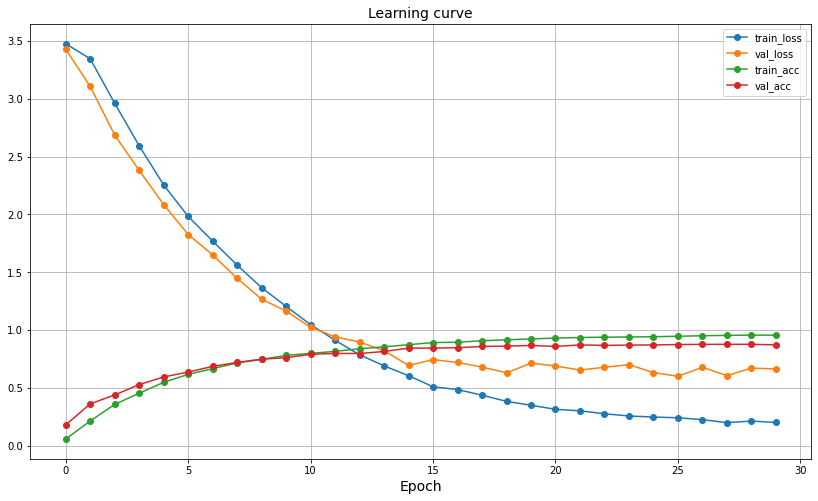

In [43]:
log = [{'epoch': 0, 'train loss': 3.4761, 'val loss': 3.428, 'train accuracy': 0.0578, 'val accuracy': 0.1796, 'train f1_score': 0.0491, 'val f1_score': 0.1265, 'lr': 1e-05}, {'epoch': 1, 'train loss': 3.3451, 'val loss': 3.1062, 'train accuracy': 0.2135, 'val accuracy': 0.3619, 'train f1_score': 0.1939, 'val f1_score': 0.3292, 'lr': 1e-05}, {'epoch': 2, 'train loss': 2.9612, 'val loss': 2.6857, 'train accuracy': 0.3574, 'val accuracy': 0.4388, 'train f1_score': 0.3314, 'val f1_score': 0.4137, 'lr': 1e-05}, {'epoch': 3, 'train loss': 2.5932, 'val loss': 2.3808, 'train accuracy': 0.4535, 'val accuracy': 0.5286, 'train f1_score': 0.4368, 'val f1_score': 0.4983, 'lr': 1e-05}, {'epoch': 4, 'train loss': 2.2549, 'val loss': 2.0848, 'train accuracy': 0.5484, 'val accuracy': 0.5947, 'train f1_score': 0.5356, 'val f1_score': 0.5782, 'lr': 1e-05}, {'epoch': 5, 'train loss': 1.983, 'val loss': 1.8261, 'train accuracy': 0.6167, 'val accuracy': 0.6365, 'train f1_score': 0.6116, 'val f1_score': 0.6265, 'lr': 1e-05}, {'epoch': 6, 'train loss': 1.7698, 'val loss': 1.6503, 'train accuracy': 0.6662, 'val accuracy': 0.6861, 'train f1_score': 0.6669, 'val f1_score': 0.6834, 'lr': 1e-05}, {'epoch': 7, 'train loss': 1.5613, 'val loss': 1.4466, 'train accuracy': 0.7156, 'val accuracy': 0.7203, 'train f1_score': 0.721, 'val f1_score': 0.7271, 'lr': 1e-05}, {'epoch': 8, 'train loss': 1.3668, 'val loss': 1.2666, 'train accuracy': 0.7465, 'val accuracy': 0.7483, 'train f1_score': 0.754, 'val f1_score': 0.753, 'lr': 1e-05}, {'epoch': 9, 'train loss': 1.2047, 'val loss': 1.1644, 'train accuracy': 0.7809, 'val accuracy': 0.7612, 'train f1_score': 0.7869, 'val f1_score': 0.7719, 'lr': 1e-05}, {'epoch': 10, 'train loss': 1.0471, 'val loss': 1.0239, 'train accuracy': 0.7985, 'val accuracy': 0.7903, 'train f1_score': 0.8064, 'val f1_score': 0.7992, 'lr': 1e-05}, {'epoch': 11, 'train loss': 0.9119, 'val loss': 0.9414, 'train accuracy': 0.8157, 'val accuracy': 0.7981, 'train f1_score': 0.8246, 'val f1_score': 0.8053, 'lr': 1e-05}, {'epoch': 12, 'train loss': 0.786, 'val loss': 0.896, 'train accuracy': 0.8383, 'val accuracy': 0.7972, 'train f1_score': 0.8462, 'val f1_score': 0.8064, 'lr': 1e-05}, {'epoch': 13, 'train loss': 0.6906, 'val loss': 0.8219, 'train accuracy': 0.8549, 'val accuracy': 0.8148, 'train f1_score': 0.8638, 'val f1_score': 0.8206, 'lr': 1e-05}, {'epoch': 14, 'train loss': 0.6057, 'val loss': 0.6936, 'train accuracy': 0.8733, 'val accuracy': 0.8438, 'train f1_score': 0.8809, 'val f1_score': 0.8536, 'lr': 1e-05}, {'epoch': 15, 'train loss': 0.5096, 'val loss': 0.7447, 'train accuracy': 0.8922, 'val accuracy': 0.8444, 'train f1_score': 0.8991, 'val f1_score': 0.8474, 'lr': 8.000000000000001e-06}, {'epoch': 16, 'train loss': 0.4857, 'val loss': 0.7197, 'train accuracy': 0.8943, 'val accuracy': 0.8471, 'train f1_score': 0.9005, 'val f1_score': 0.8543, 'lr': 8.000000000000001e-06}, {'epoch': 17, 'train loss': 0.4369, 'val loss': 0.6804, 'train accuracy': 0.9078, 'val accuracy': 0.8582, 'train f1_score': 0.9137, 'val f1_score': 0.8611, 'lr': 6.400000000000001e-06}, {'epoch': 18, 'train loss': 0.3835, 'val loss': 0.6299, 'train accuracy': 0.9152, 'val accuracy': 0.8615, 'train f1_score': 0.9206, 'val f1_score': 0.8693, 'lr': 6.400000000000001e-06}, {'epoch': 19, 'train loss': 0.3499, 'val loss': 0.7139, 'train accuracy': 0.9238, 'val accuracy': 0.8666, 'train f1_score': 0.9297, 'val f1_score': 0.8688, 'lr': 5.120000000000002e-06}, {'epoch': 20, 'train loss': 0.3148, 'val loss': 0.6894, 'train accuracy': 0.9303, 'val accuracy': 0.8585, 'train f1_score': 0.9343, 'val f1_score': 0.8603, 'lr': 5.120000000000002e-06}, {'epoch': 21, 'train loss': 0.3018, 'val loss': 0.6542, 'train accuracy': 0.9356, 'val accuracy': 0.8714, 'train f1_score': 0.9405, 'val f1_score': 0.8786, 'lr': 4.096000000000002e-06}, {'epoch': 22, 'train loss': 0.2761, 'val loss': 0.6784, 'train accuracy': 0.9383, 'val accuracy': 0.8675, 'train f1_score': 0.9424, 'val f1_score': 0.8694, 'lr': 4.096000000000002e-06}, {'epoch': 23, 'train loss': 0.2573, 'val loss': 0.7008, 'train accuracy': 0.9402, 'val accuracy': 0.8702, 'train f1_score': 0.9438, 'val f1_score': 0.8702, 'lr': 3.276800000000002e-06}, {'epoch': 24, 'train loss': 0.2479, 'val loss': 0.6321, 'train accuracy': 0.9423, 'val accuracy': 0.8712, 'train f1_score': 0.9472, 'val f1_score': 0.8699, 'lr': 3.276800000000002e-06}, {'epoch': 25, 'train loss': 0.2418, 'val loss': 0.6005, 'train accuracy': 0.9465, 'val accuracy': 0.875, 'train f1_score': 0.9494, 'val f1_score': 0.8788, 'lr': 2.6214400000000015e-06}, {'epoch': 26, 'train loss': 0.2255, 'val loss': 0.6786, 'train accuracy': 0.9507, 'val accuracy': 0.876, 'train f1_score': 0.9537, 'val f1_score': 0.882, 'lr': 2.6214400000000015e-06}, {'epoch': 27, 'train loss': 0.1994, 'val loss': 0.606, 'train accuracy': 0.9542, 'val accuracy': 0.8768, 'train f1_score': 0.9583, 'val f1_score': 0.8787, 'lr': 2.0971520000000012e-06}, {'epoch': 28, 'train loss': 0.2133, 'val loss': 0.6711, 'train accuracy': 0.9561, 'val accuracy': 0.8766, 'train f1_score': 0.9589, 'val f1_score': 0.8789, 'lr': 2.0971520000000012e-06}, {'epoch': 29, 'train loss': 0.2008, 'val loss': 0.6634, 'train accuracy': 0.956, 'val accuracy': 0.872, 'train f1_score': 0.959, 'val f1_score': 0.8732, 'lr': 1.6777216000000011e-06}]

show_learning_curve(log)

In [23]:
!ls ./tokenizers

new-tokens-added  new-tokens-added_old	original


In [30]:
import json

with open("./dataset/2022-04-13/dataset_for_category_classification.json", "r") as f:
    dataset = json.loads(f.read())

categories = sorted(
    set(each["label"] for each in dataset)
)
label2id = {
    label: id for id, label in enumerate(categories)
}
id2label = {
    id: label for id, label in enumerate(categories)

}

In [31]:
from transformers import AutoModelForSequenceClassification



model = AutoModelForSequenceClassification.from_pretrained(
    "vinai/phobert-base", label2id=label2id, id2label=id2label
)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

In [33]:
model.save_pretrained("./checkpoints/original/phoBERT_base")